# Library

In [2]:
import pandas as pd
import random
import os
import numpy as np

# 시각화 라이브러리
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# pandas_profiling # EDA에 좋은 라이브러리

# Data Load

In [3]:
# Import train and test CSV files
train_df = pd.read_csv('open/train.csv')
test_df = pd.read_csv("open/test.csv")

In [4]:
train_df.head()

,ID,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,...,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
0,TRAIN_00001,70.544,103.320,67.47,1,101.892,74.983,29.45,62.38,245.71,...,29.632,16.083,4.276,-25.381,-25.529,-22.769,23.792,-25.470,-25.409,-25.304
1,TRAIN_00002,69.524,103.321,65.17,1,101.944,72.943,28.73,61.23,233.61,...,33.179,16.736,3.229,-26.619,-26.523,-22.574,24.691,-26.253,-26.497,-26.438
2,TRAIN_00003,72.583,103.320,64.07,1,103.153,72.943,28.81,105.77,272.20,...,31.801,17.080,2.839,-26.238,-26.216,-22.169,24.649,-26.285,-26.215,-26.370
3,TRAIN_00004,71.563,103.320,67.57,1,101.971,77.022,28.92,115.21,255.36,...,34.503,17.143,3.144,-25.426,-25.079,-21.765,24.913,-25.254,-25.021,-25.345
4,TRAIN_00005,69.524,103.320,63.57,1,101.981,70.904,29.68,103.38,241.46,...,32.602,17.569,3.138,-25.376,-25.242,-21.072,25.299,-25.072,-25.195,-24.974


In [5]:
# Train
train_x = train_df.filter(regex='X') # Input : X Featrue
train_y = train_df.filter(regex='Y') # Output : Y Feature
# Test
test_x = test_df.filter(regex='X') 
test_y = test_df.filter(regex='Y') 

In [6]:
# Missing values check
print("Nan Data count")
print(train_df.isnull().sum().sum())
print(test_df.isnull().sum().sum())

Nan Data count
0
0


In [7]:
## Meta data
data_x_info = pd.read_csv('open/meta/x_feature_info.csv')
data_y_info = pd.read_csv('open/meta/y_feature_info.csv')
data_y_spec_info = pd.read_csv('open/meta/y_feature_spec_info.csv')

# 전처리

In [8]:
data_x_info = data_x_info.set_index('설명')
data_x_info

,Feature
설명,
PCB 체결 시 단계별 누름량(Step 1),X_01
PCB 체결 시 단계별 누름량(Step 2),X_02
방열 재료 1 무게,X_03
1차 검사 통과 여부,X_04
PCB 체결 시 단계별 누름량(Step 3),X_05
PCB 체결 시 단계별 누름량(Step 4),X_06
방열 재료 1 면적,X_07
방열 재료 2 면적,X_08
방열 재료 3 면적,X_09


In [9]:
data_y_info = data_y_info.set_index('설명')
data_y_info

,Feature
설명,
안테나 Gain 평균 (각도1),Y_01
안테나 1 Gain 편차,Y_02
안테나 2 Gain 편차,Y_03
평균 신호대 잡음비,Y_04
안테나 Gain 평균 (각도2),Y_05
신호대 잡음비 (각도1),Y_06
안테나 Gain 평균 (각도3),Y_07
신호대 잡음비 (각도2),Y_08
신호대 잡음비 (각도3),Y_09


## 변수들 그룹화
Meta data를 활용하여 우선적으로 변수들을 그룹화한 후에 기술 통계량 확인

In [10]:
## Keys of meta data : Meta 데이터를 그룹화하기 위한 key 값 -> yaml
x_keys = {
    0 : '누름량',
    1 : '무게',
    2 : '면적',
    3 : '여부',
    4 : '좌표',
    5 : '차이',
    6 : '번 안테나 패드 위치',
    7 : '번 스크류 삽입 깊이',
    8 : '핀 치수',
    9 : '스크류 삽입 깊이', # [4:]
    10 : '회전수',
    11 : '안착부',
    12 : '레이돔 치수',
    13 : '레이돔 기울기',
    14 : '실란트',
    15 : '대기 시간',
    16 : '납 량',
}

y_keys = {
    0 : 'Gain 평균',
    1 : 'Gain 편차',
    2 : '평균 신호대 잡음비',
    3 : '신호대 잡음비', # [1:]
}

In [11]:
# x feature groups
x_g0 = data_x_info.filter(like=x_keys[0], axis=0)
x_g1 = data_x_info.filter(like=x_keys[1], axis=0)
x_g2 = data_x_info.filter(like=x_keys[2], axis=0)
x_g3 = data_x_info.filter(like=x_keys[3], axis=0)
x_g4 = data_x_info.filter(like=x_keys[4], axis=0)
x_g5 = data_x_info.filter(like=x_keys[5], axis=0)
x_g6 = data_x_info.filter(like=x_keys[6], axis=0)
x_g7 = data_x_info.filter(like=x_keys[7], axis=0)
x_g8 = data_x_info.filter(like=x_keys[8], axis=0)
x_g9 = data_x_info.filter(like=x_keys[9], axis=0)[4:]
x_g10 = data_x_info.filter(like=x_keys[10], axis=0)
x_g11 = data_x_info.filter(like=x_keys[11], axis=0)
x_g12 = data_x_info.filter(like=x_keys[12], axis=0)
x_g13 = data_x_info.filter(like=x_keys[13], axis=0)
x_g14 = data_x_info.filter(like=x_keys[14], axis=0)
x_g15 = data_x_info.filter(like=x_keys[15], axis=0)
x_g16 = data_x_info.filter(like=x_keys[16], axis=0)

# y feature groups
y_g0 = data_y_info.filter(like=y_keys[0], axis=0)
y_g1 = data_y_info.filter(like=y_keys[1], axis=0)
y_g2 = data_y_info.filter(like=y_keys[2], axis=0)
y_g3 = data_y_info.filter(like=y_keys[3], axis=0)[1:]


* Plot functions

In [12]:
# box plot
import math
from sklearn.preprocessing import StandardScaler


def box_plot(group_num, 
             data, 
             standardized=False):
    n = data.shape[1]
    n = 2 if n == 1 else n
    fig, axes = plt.subplots(nrows=1 ,ncols=n, figsize=(20, 10))

    if standardized:
        fig.suptitle(f"Group {group_num} standardized box-plot")
        # Standardization
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(data)
        for i in range(n):
            axes[i].set_title(data.columns[i])
            sns.boxplot(y=scaled_data[:, i], ax = axes[i])
    else:
        fig.suptitle(f"Group {group_num} box-plot")
        for i in range(n):
            axes[i].set_title(data.columns[i])
            sns.boxplot(y=data.iloc[:, i], data=data, ax = axes[i])
    
    plt.show()
    return axes

# histogram plot
def hist_plot(group_num, 
             data, 
             standardized=False):
    n = data.shape[1]
    n = 2 if n == 1 else n
    fig, axes = plt.subplots(nrows=math.ceil(n/2) ,ncols=2, figsize=(20,10))
    if standardized:
        fig.suptitle(f"Group {group_num} standardized histogram")
        # Standardization
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(data)
        for i in range(n):
            axes[i//2, i%2].set_title(data.columns[i])
            sns.histplot(x=scaled_data[:, i],ax = axes[i//2, i%2])   
    else:
        fig.suptitle(f"Group {group_num} histogram")
        for i in range(n):
            axes[i//2, i%2].set_title(data.columns[i])
            sns.histplot(x=data.iloc[:, i], data=data, ax = axes[i//2, i%2])
    
    plt.show()
    return axes

# 그룹화된 변수들 기술 통계량

### X feature groups

* Group 0

In [208]:
# Group 0 : PCB 체결 시 단계별 누름량
tmp = train_x[x_g0.Feature]
tmp.describe()

,X_01,X_02,X_05,X_06
count,39607.000000,39607.000000,39607.000000,39607.000000
mean,68.412040,103.320166,102.337203,70.597211
std,2.655983,0.000372,0.548353,2.259820
min,56.268000,103.320000,101.774000,61.726000
25%,66.465000,103.320000,101.949000,68.864000
50%,68.504000,103.320000,102.006000,69.884000
75%,69.524000,103.320000,103.144000,71.923000
max,84.820000,103.321000,103.160000,87.219000


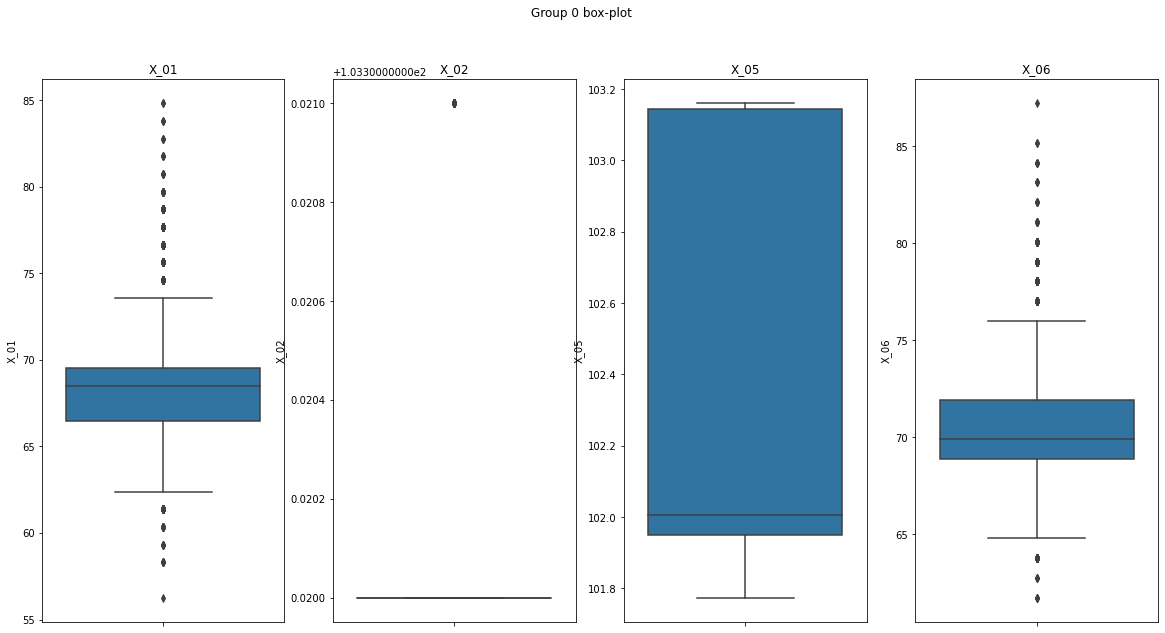

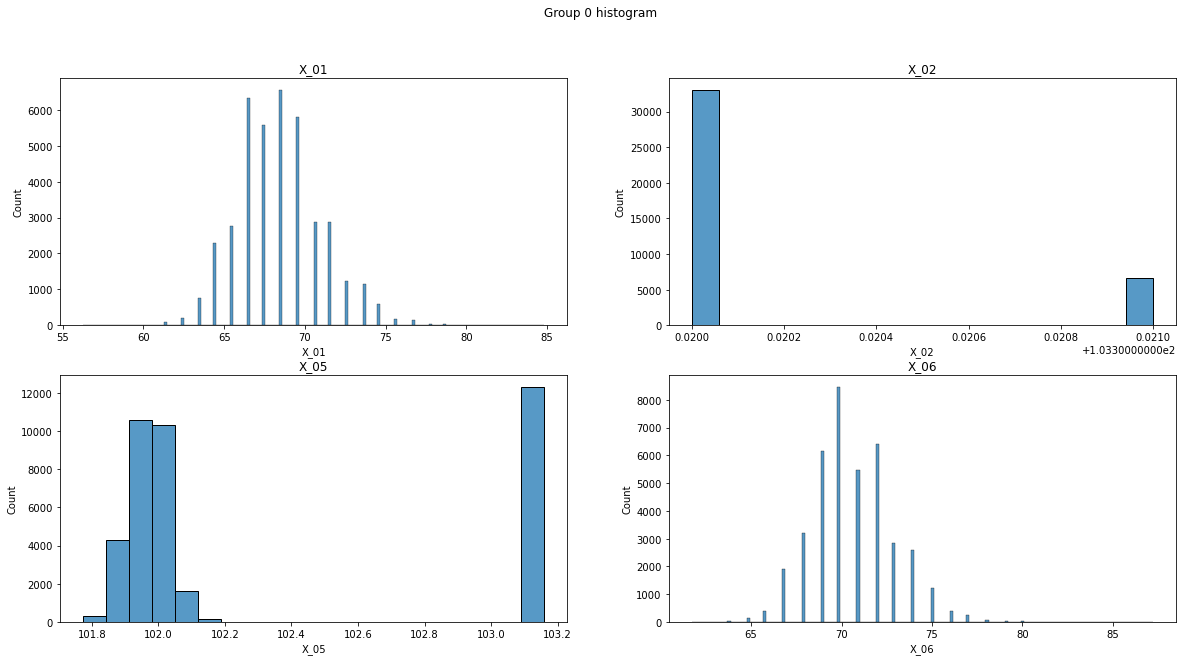

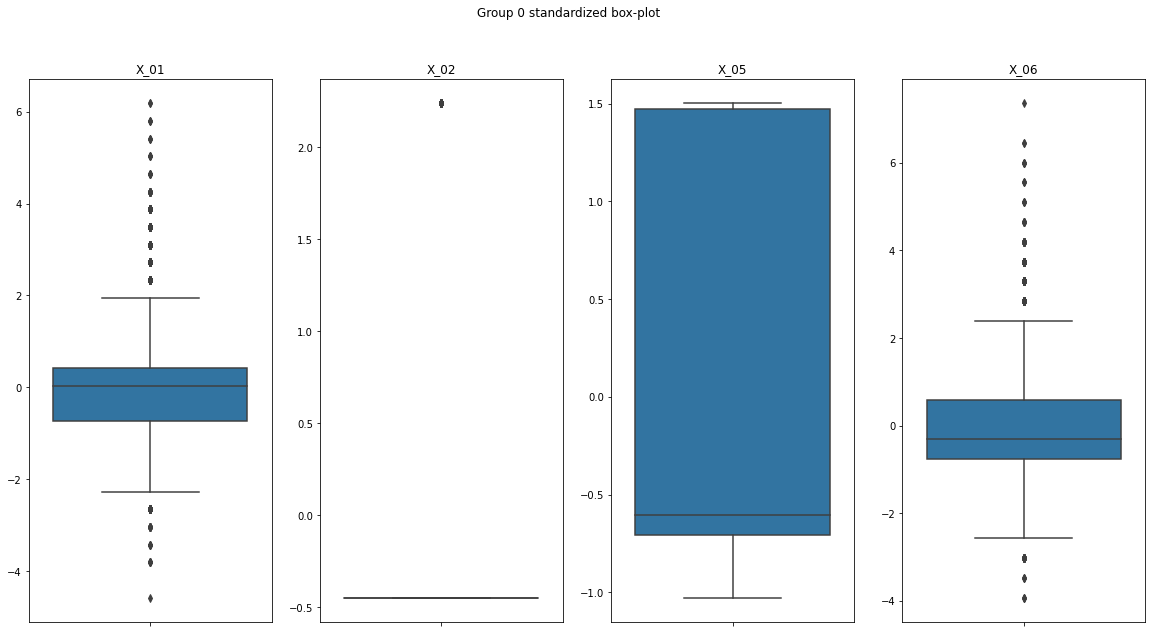

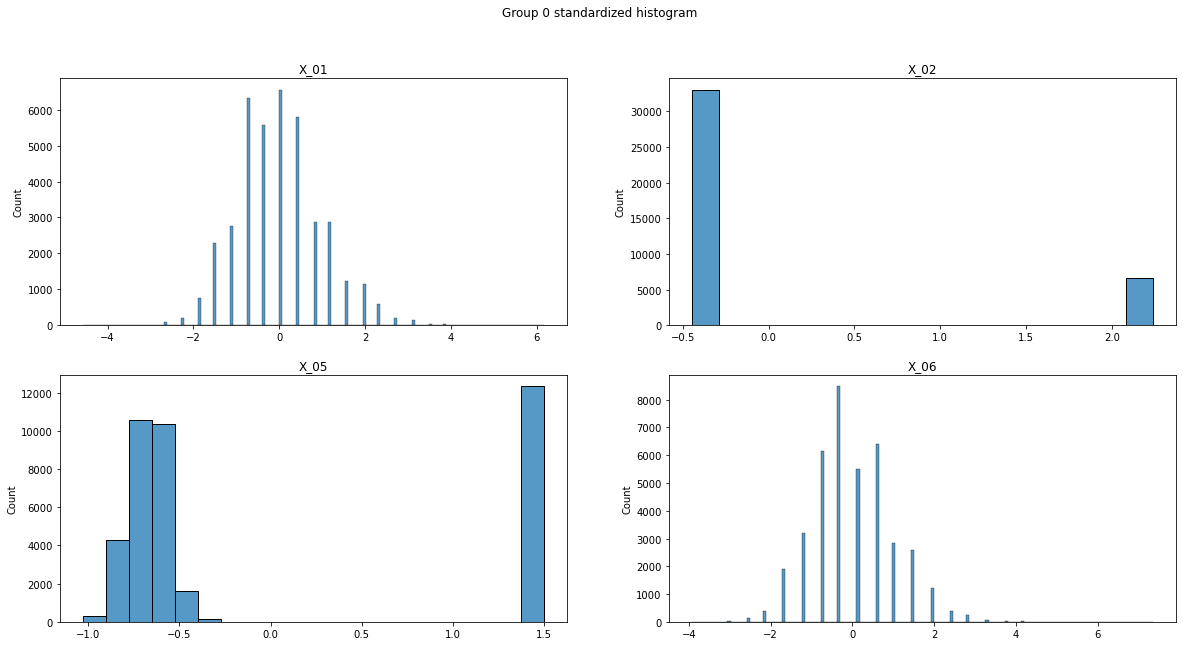

array([[<AxesSubplot:title={'center':'X_01'}, ylabel='Count'>,
        <AxesSubplot:title={'center':'X_02'}, ylabel='Count'>],
       [<AxesSubplot:title={'center':'X_05'}, ylabel='Count'>,
        <AxesSubplot:title={'center':'X_06'}, ylabel='Count'>]],
      dtype=object)

In [99]:
# 
box_plot(group_num=0, 
         data=tmp,
         standardized=False)

hist_plot(group_num=0, 
         data=tmp,
         standardized=False)
# standardize
box_plot(group_num=0, 
         data=tmp,
         standardized=True)

hist_plot(group_num=0, 
         data=tmp,
         standardized=True)

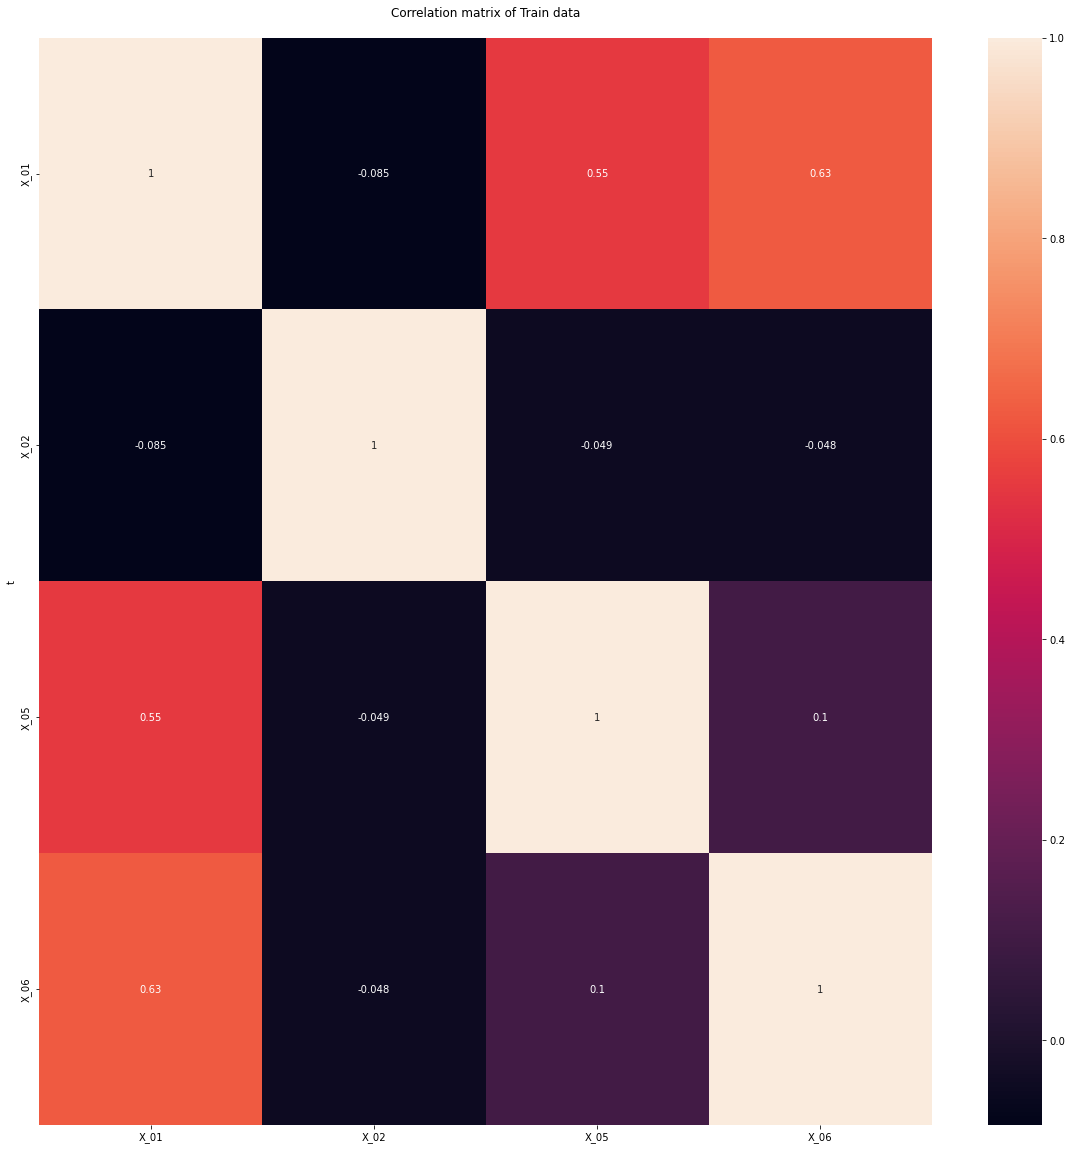

In [209]:
## Correlation Matrix

corr = tmp.corr()

fig, ax = plt.subplots(figsize=(20,20)) 
hm = sns.heatmap(corr, annot = True, ax=ax)
hm.set(xlabel='', ylabel='t', title = "Correlation matrix of Train data\n")
plt.show()

* Group 1

In [210]:
# Group 1 : 방열 재료 n(~3), 무게
tmp = train_x[x_g1.Feature]
tmp.describe()
# 0은 결측치라고 보면 됨.

,X_03,X_10,X_11
count,39607.000000,39607.000000,39607.000000
mean,68.826354,0.002449,0.000366
std,5.151167,0.086255,0.014145
min,56.470000,0.000000,0.000000
25%,65.070000,0.000000,0.000000
50%,67.270000,0.000000,0.000000
75%,71.770000,0.000000,0.000000
max,89.170000,3.600000,0.700000


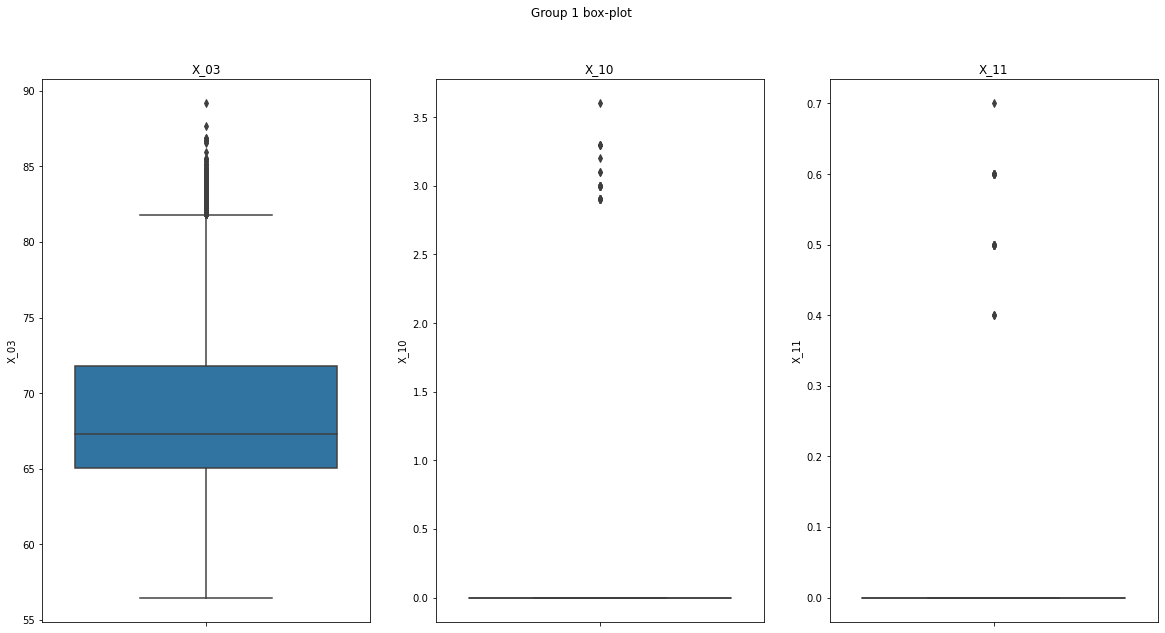

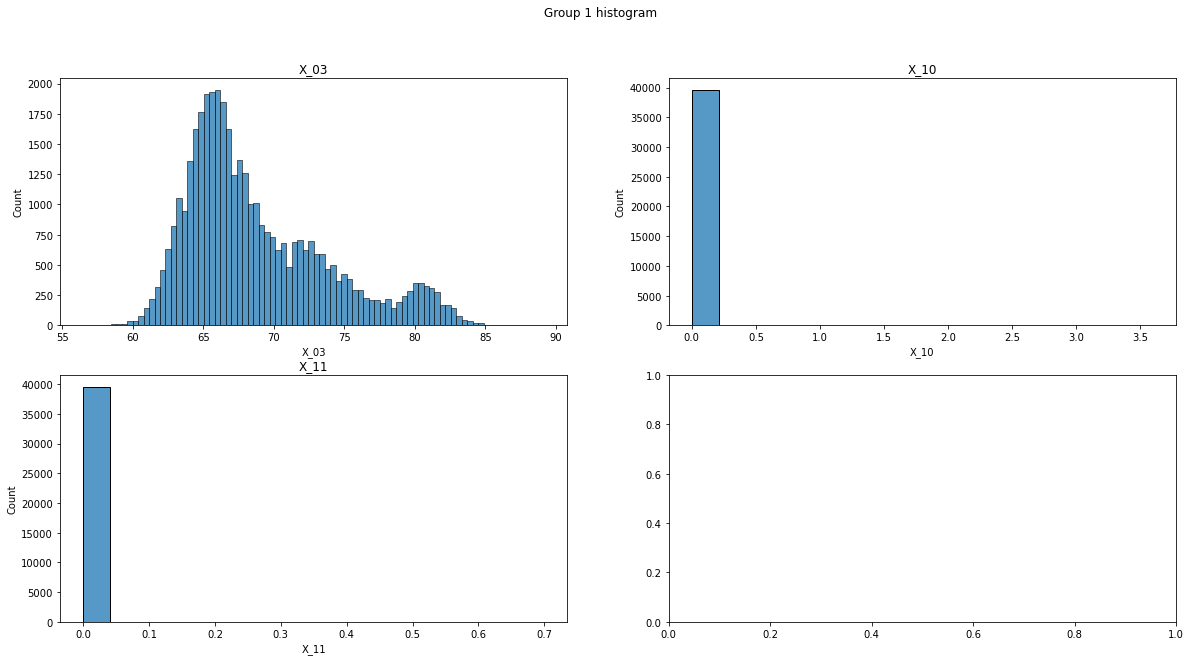

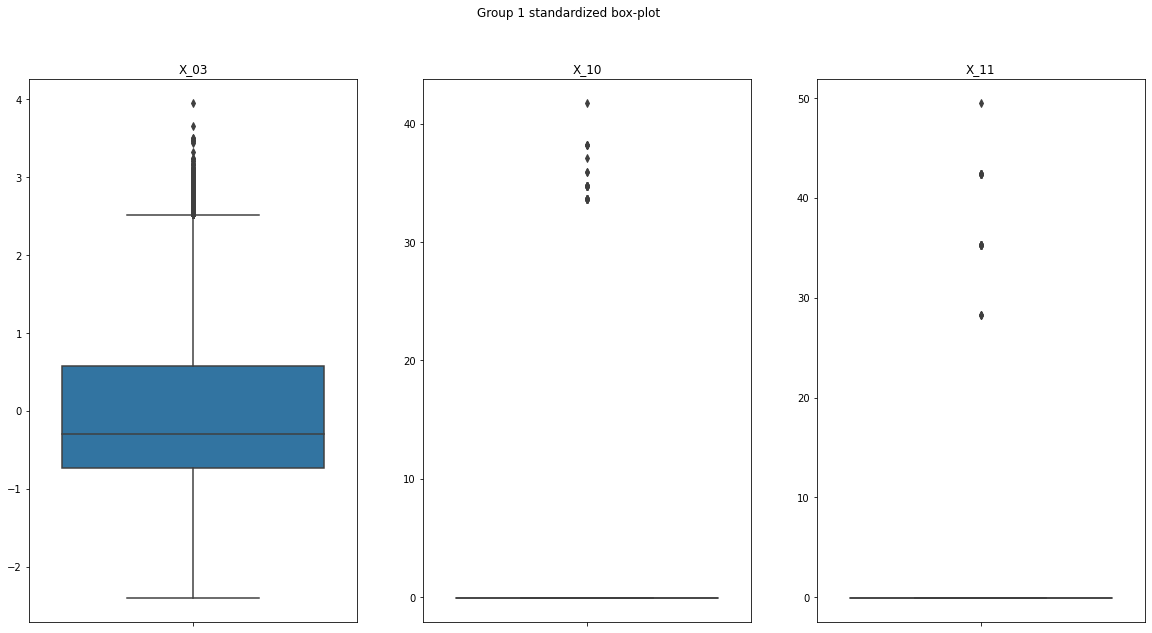

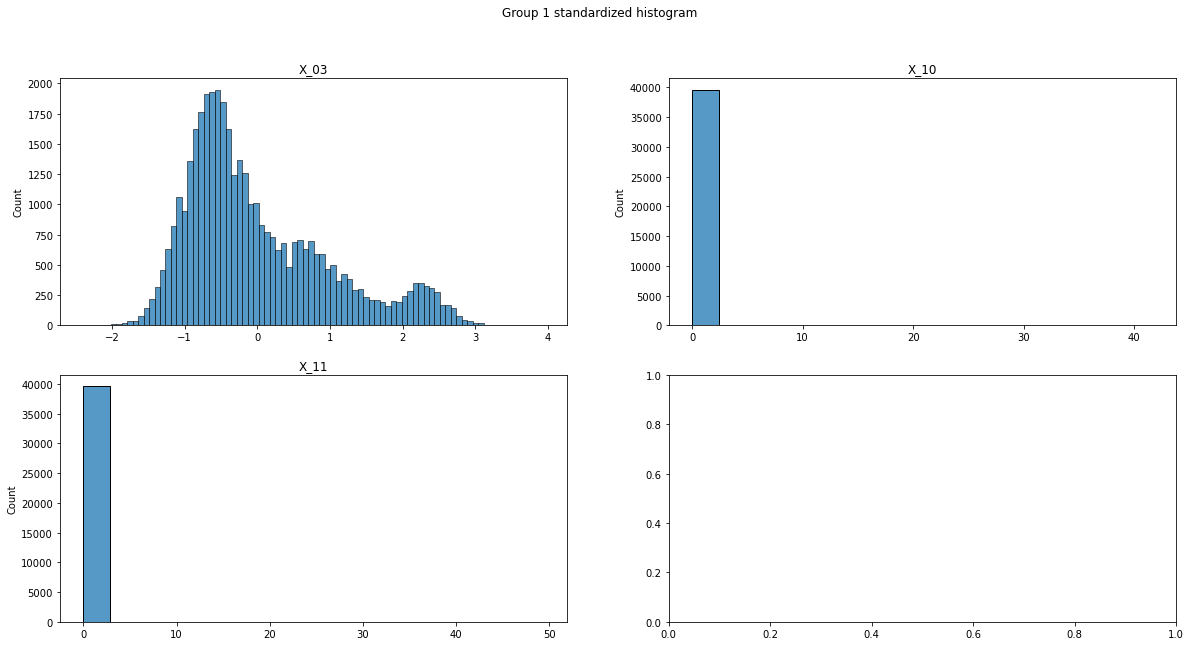

array([[<AxesSubplot:title={'center':'X_03'}, ylabel='Count'>,
        <AxesSubplot:title={'center':'X_10'}, ylabel='Count'>],
       [<AxesSubplot:title={'center':'X_11'}, ylabel='Count'>,
        <AxesSubplot:>]], dtype=object)

In [101]:
# 
box_plot(group_num=1, 
         data=tmp,
         standardized=False)

hist_plot(group_num=1, 
         data=tmp,
         standardized=False)

# standardize
box_plot(group_num=1, 
         data=tmp,
         standardized=True)

hist_plot(group_num=1, 
         data=tmp,
         standardized=True)

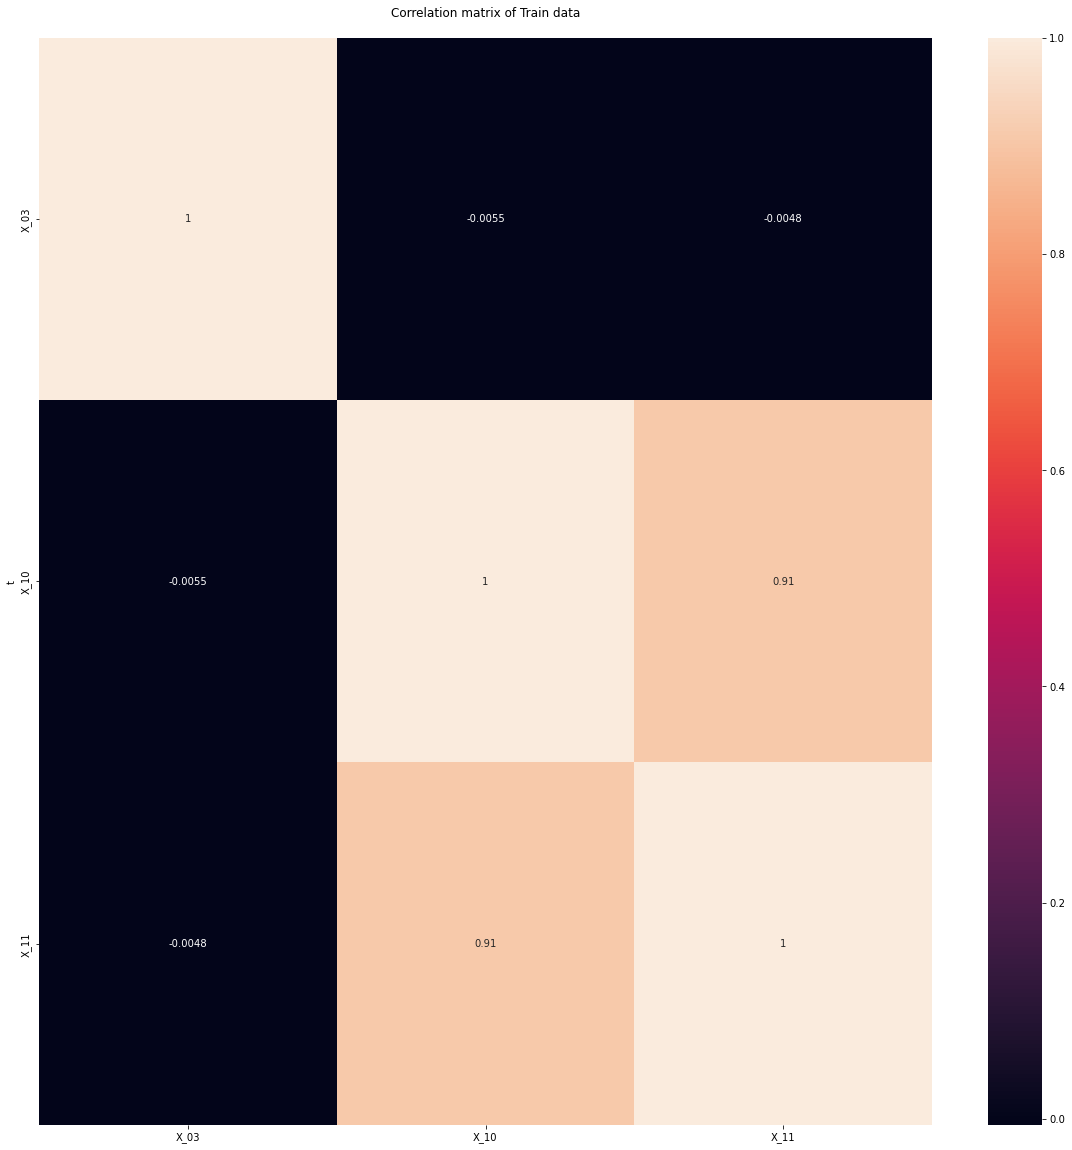

In [211]:
## Correlation Matrix

corr = tmp.corr()

fig, ax = plt.subplots(figsize=(20,20)) 
hm = sns.heatmap(corr, annot = True, ax=ax)
hm.set(xlabel='', ylabel='t', title = "Correlation matrix of Train data\n")
plt.show()

* Group 2

In [212]:
# Group 2 : 방열 재료 n(~3), 면적
tmp = train_x[x_g2.Feature]
tmp.describe()

,X_07,X_08,X_09
count,39607.000000,39607.000000,39607.000000
mean,29.407490,164.449320,225.397470
std,7.338204,220.402444,66.734725
min,14.140000,38.460000,37.580000
25%,27.890000,105.990000,188.540000
50%,28.840000,115.040000,234.450000
75%,29.870000,132.620000,263.960000
max,163.860000,2387.440000,637.490000


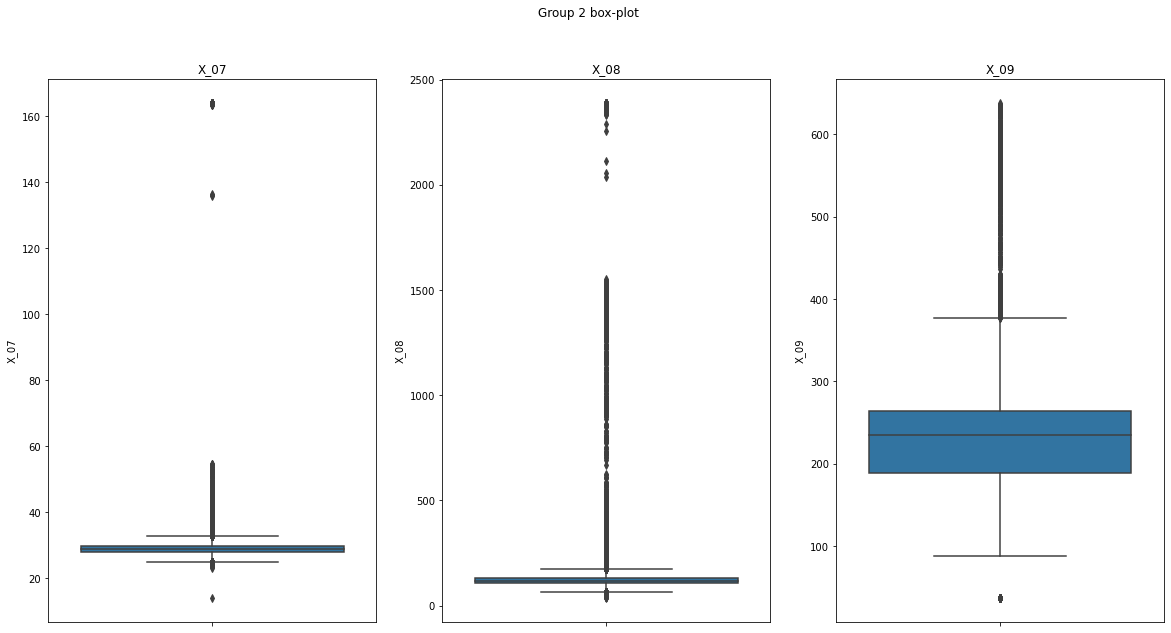

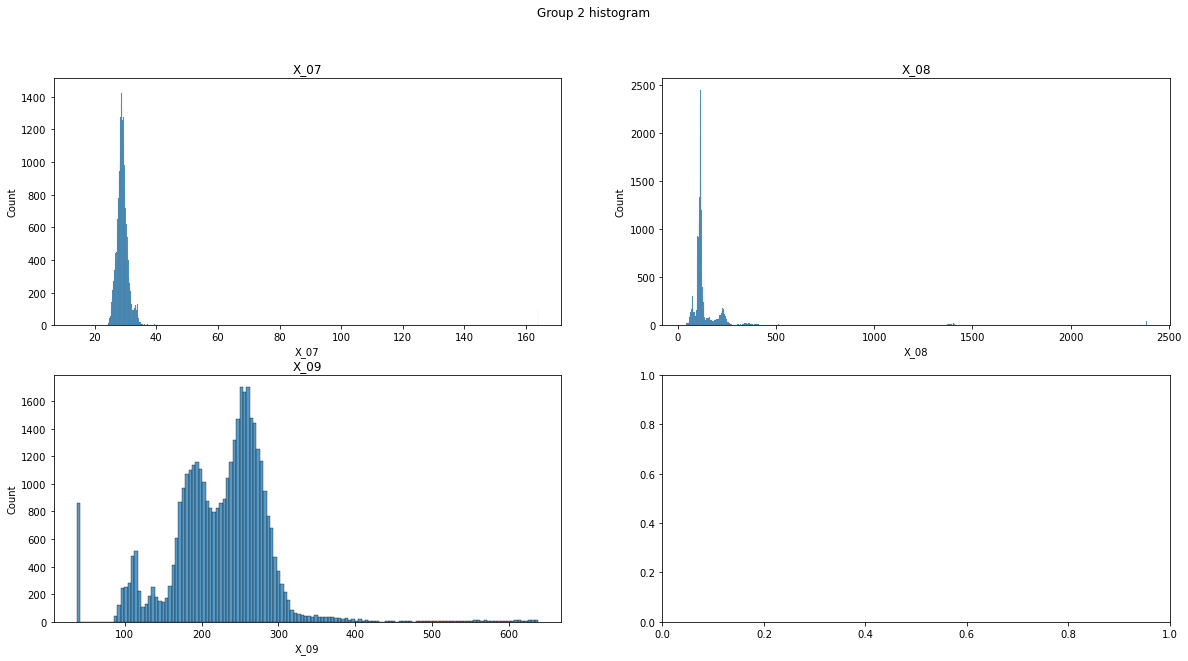

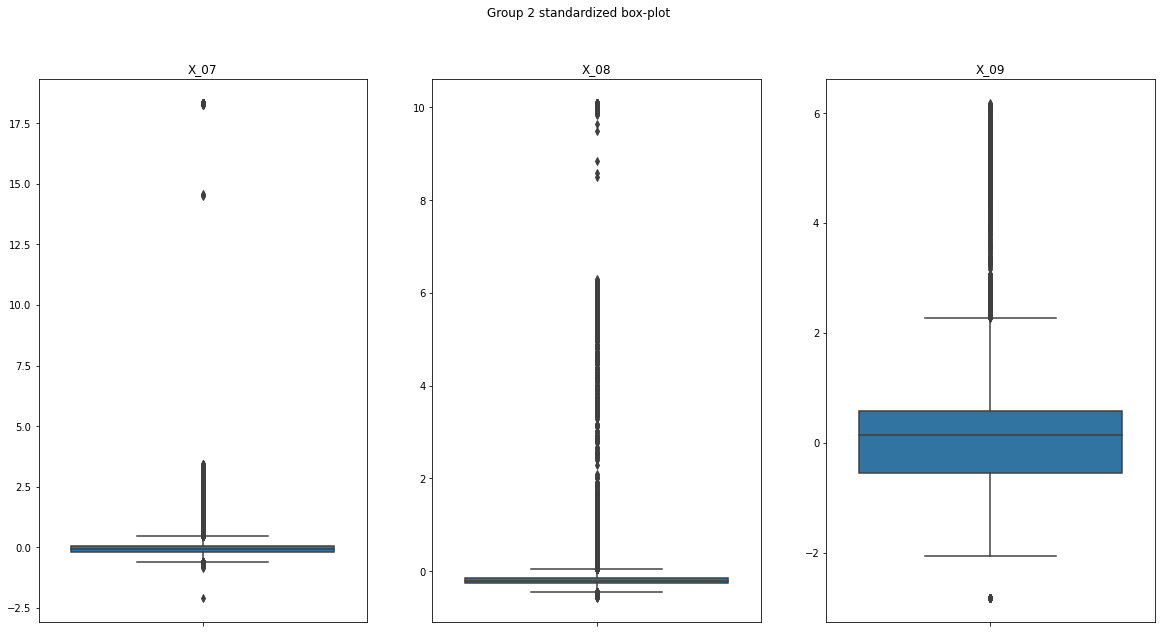

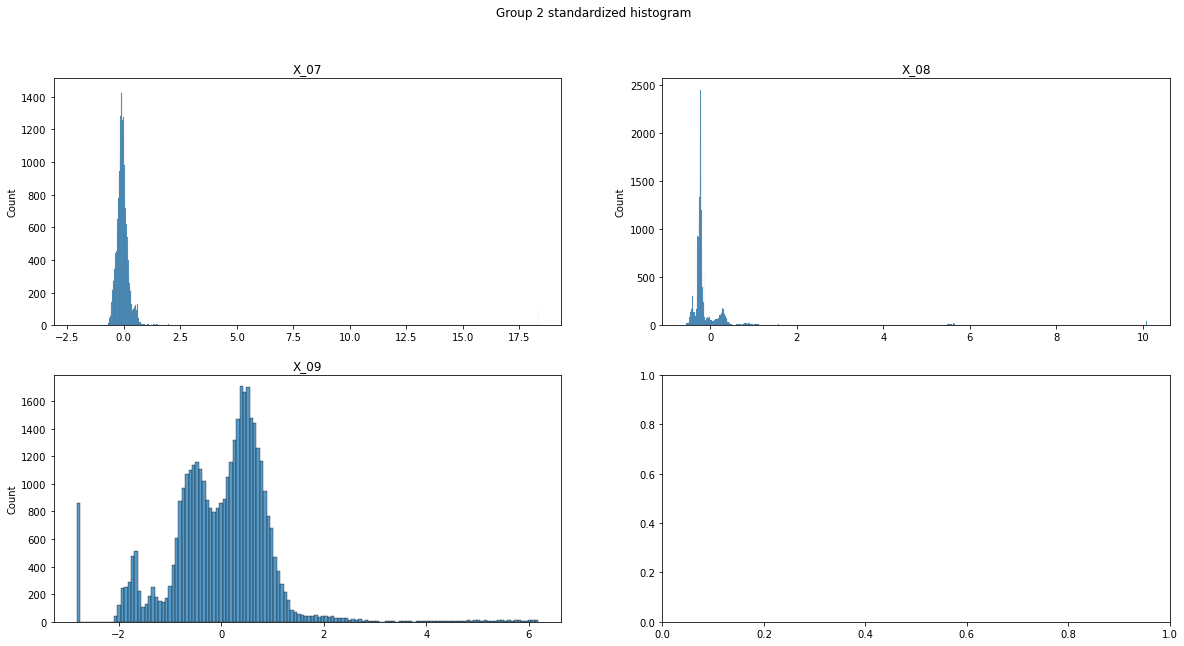

array([[<AxesSubplot:title={'center':'X_07'}, ylabel='Count'>,
        <AxesSubplot:title={'center':'X_08'}, ylabel='Count'>],
       [<AxesSubplot:title={'center':'X_09'}, ylabel='Count'>,
        <AxesSubplot:>]], dtype=object)

In [103]:
# 
box_plot(group_num=2, 
         data=tmp,
         standardized=False)

hist_plot(group_num=2, 
         data=tmp,
         standardized=False)

# standardize
box_plot(group_num=2, 
         data=tmp,
         standardized=True)

hist_plot(group_num=2, 
         data=tmp,
         standardized=True)

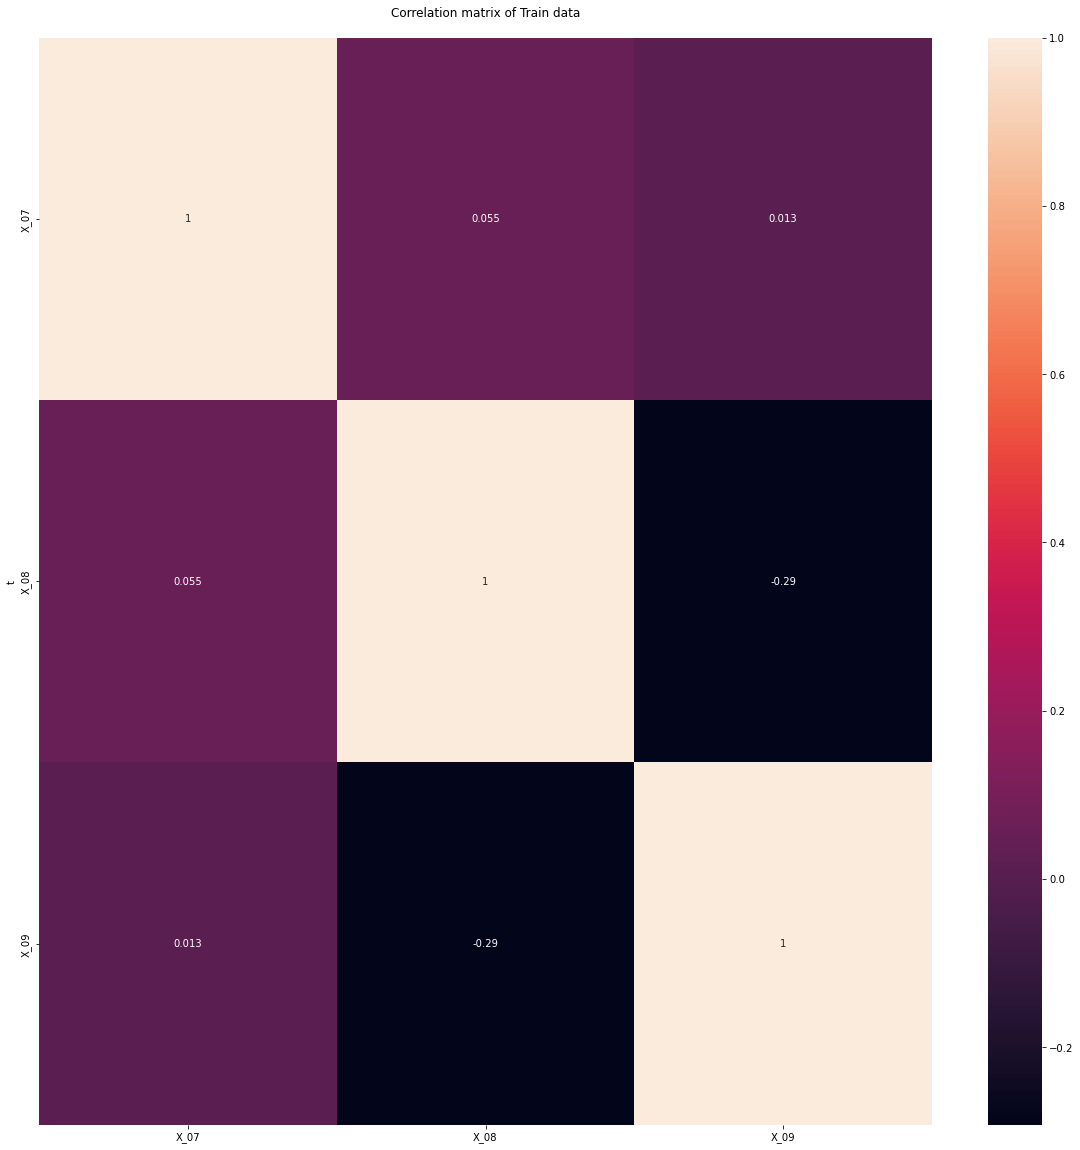

In [213]:
## Correlation Matrix

corr = tmp.corr()

fig, ax = plt.subplots(figsize=(20,20)) 
hm = sns.heatmap(corr, annot = True, ax=ax)
hm.set(xlabel='', ylabel='t', title = "Correlation matrix of Train data\n")
plt.show()

* Group 3

In [104]:
# Group 3 : n차(~4) 검사 통과 여부
tmp = train_x[x_g3.Feature]
tmp.describe()
# 모두 검사 통과, test data에서도 마찬가지로 모두 통과

,X_04,X_23,X_47,X_48
count,39607.0,39607.0,39607.0,39607.0
mean,1.0,1.0,1.0,1.0
std,0.0,0.0,0.0,0.0
min,1.0,1.0,1.0,1.0
25%,1.0,1.0,1.0,1.0
50%,1.0,1.0,1.0,1.0
75%,1.0,1.0,1.0,1.0
max,1.0,1.0,1.0,1.0


* Group 4

In [105]:
# Group 4 : 커넥터 위치 기준 좌표
tmp = train_x[x_g4.Feature]
tmp.describe()

,X_12
count,39607.000000
mean,4.373228
std,0.021806
min,4.270000
25%,4.360000
50%,4.370000
75%,4.390000
max,4.490000


<AxesSubplot:title={'center':'X_12'}, xlabel='X_12', ylabel='Count'>

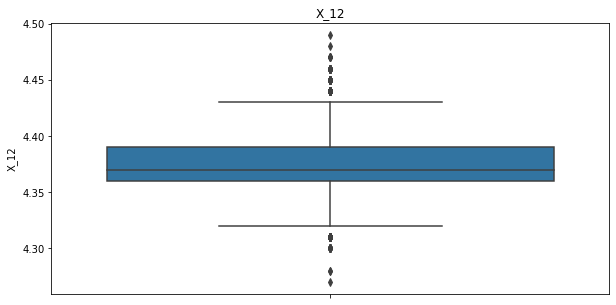

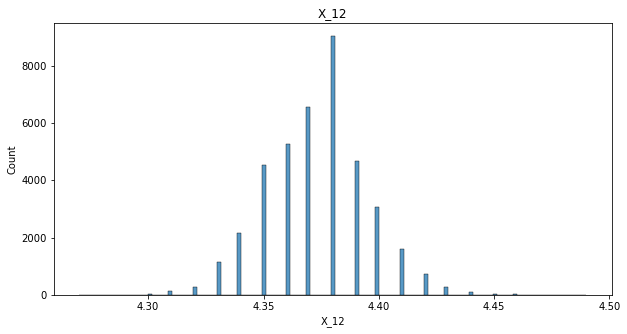

In [106]:
# 
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title(tmp.columns[0])
sns.boxplot(y=tmp.iloc[:, 0], ax = ax)

fig, ax = plt.subplots(figsize=(10,5))
ax.set_title(tmp.columns[0])
sns.histplot(x=tmp.iloc[:, 0], ax = ax)

* Group 5

In [107]:
# Group 5 : 각 안테나 패드 위치(높이) 차이
tmp = train_x[x_g5.Feature]
tmp.describe()

,X_13
count,39607.000000
mean,0.143335
std,0.025334
min,0.050000
25%,0.130000
50%,0.140000
75%,0.160000
max,0.280000


<AxesSubplot:title={'center':'X_13'}, xlabel='X_13', ylabel='Count'>

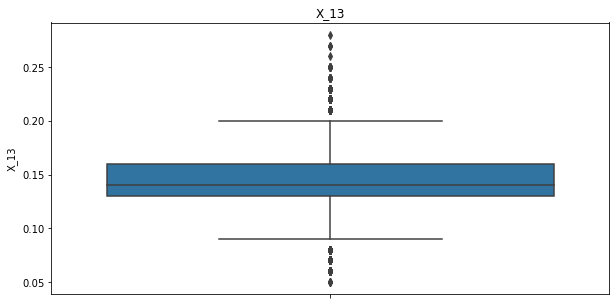

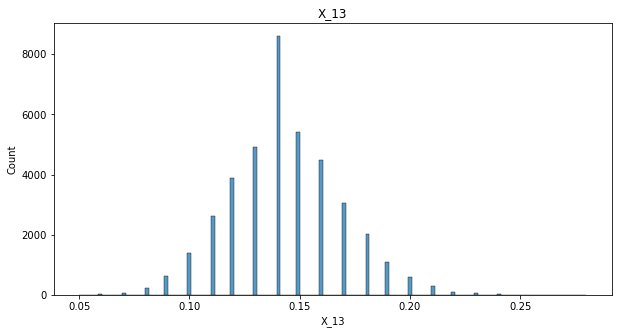

In [108]:
# 
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title(tmp.columns[0])
sns.boxplot(y=tmp.iloc[:, 0], ax = ax)

fig, ax = plt.subplots(figsize=(10,5))
ax.set_title(tmp.columns[0])
sns.histplot(x=tmp.iloc[:, 0], ax = ax)

* Group 6

In [22]:
# Group 6 : n(~5)번 안테나 패드 위치
tmp = train_x[x_g6.Feature]
tmp.describe()

,X_14,X_15,X_16,X_17,X_18
count,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000
mean,13.372201,13.381914,13.463860,13.512589,13.449263
std,0.029865,0.029468,0.036741,0.023436,0.029093
min,13.150000,13.230000,13.260000,13.410000,13.260000
25%,13.350000,13.360000,13.440000,13.500000,13.430000
50%,13.370000,13.380000,13.470000,13.510000,13.450000
75%,13.390000,13.410000,13.490000,13.530000,13.470000
max,13.490000,13.500000,13.610000,13.610000,13.570000


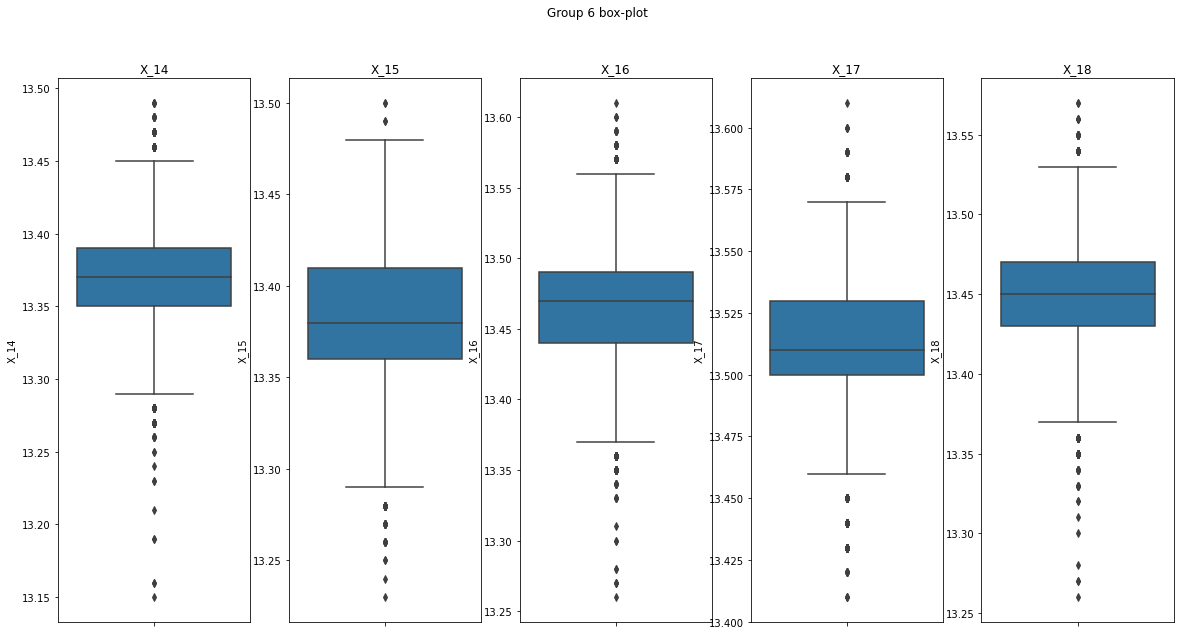

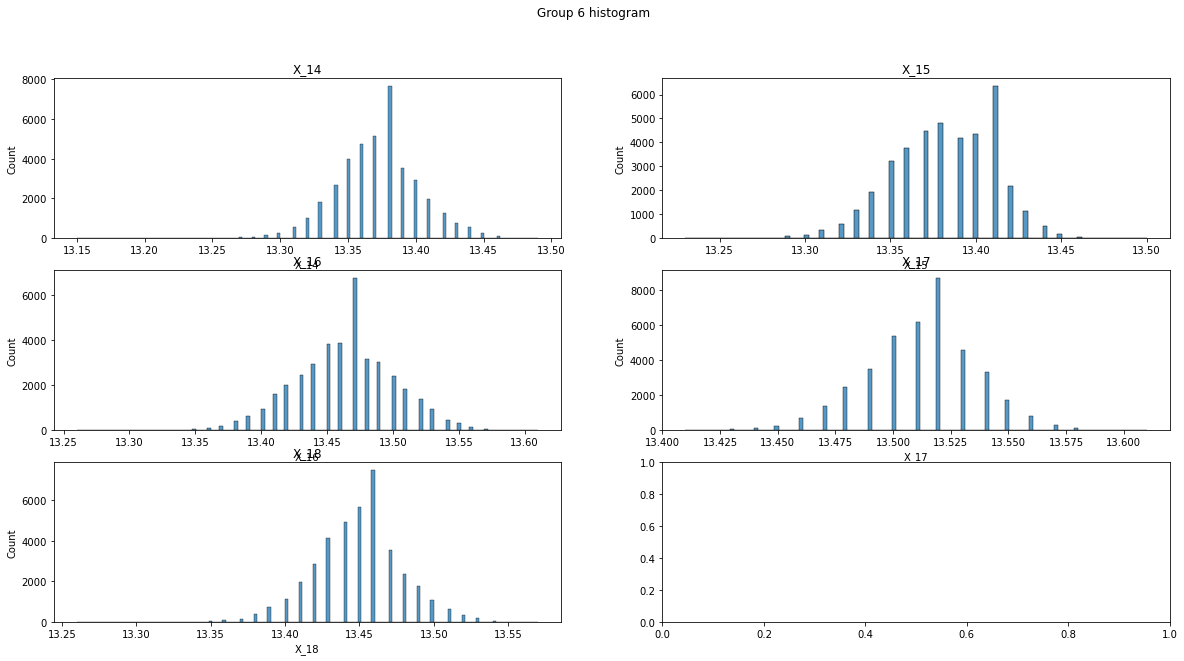

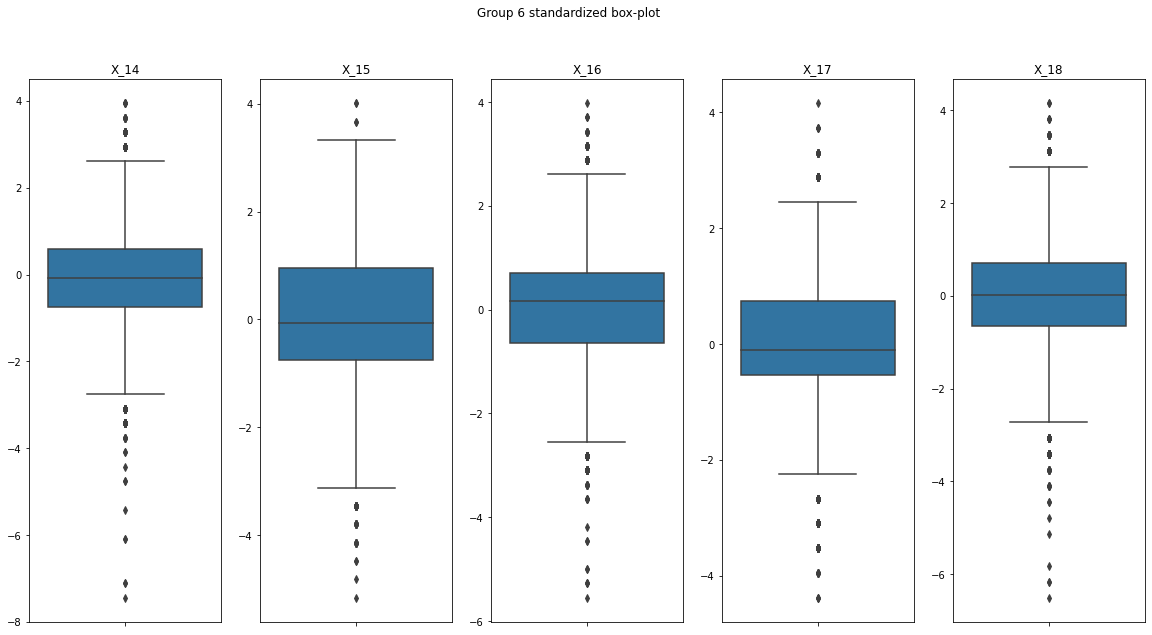

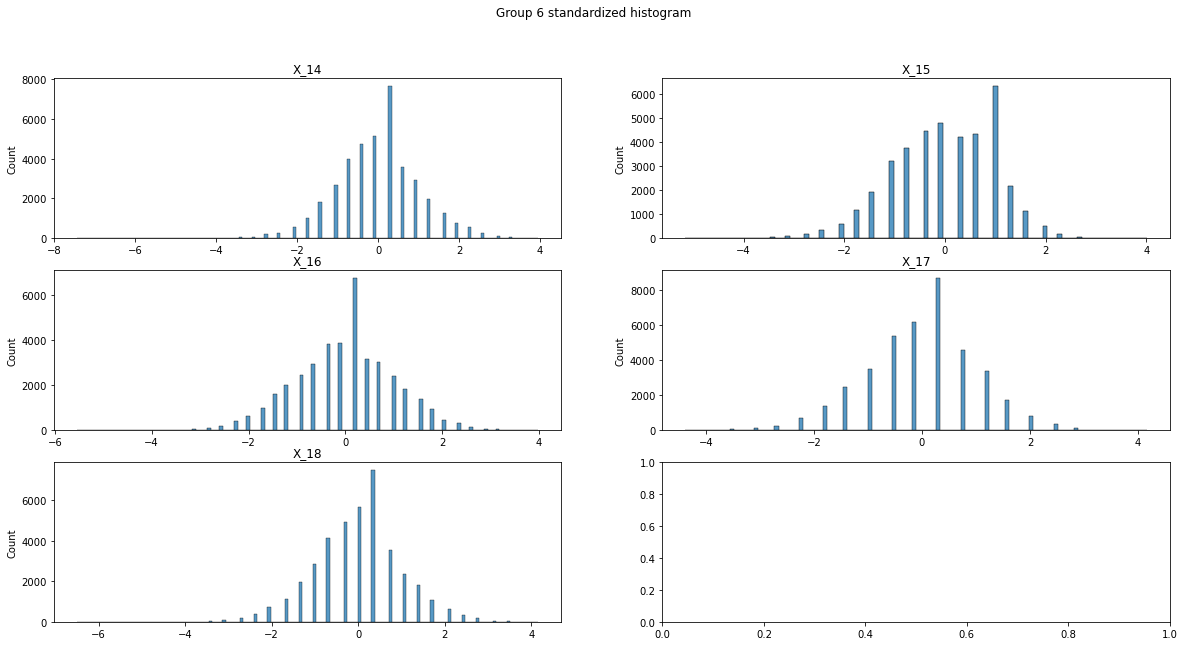

array([[<AxesSubplot:title={'center':'X_14'}, ylabel='Count'>,
        <AxesSubplot:title={'center':'X_15'}, ylabel='Count'>],
       [<AxesSubplot:title={'center':'X_16'}, ylabel='Count'>,
        <AxesSubplot:title={'center':'X_17'}, ylabel='Count'>],
       [<AxesSubplot:title={'center':'X_18'}, ylabel='Count'>,
        <AxesSubplot:>]], dtype=object)

In [23]:
# 
box_plot(group_num=6, 
         data=tmp,
         standardized=False)

hist_plot(group_num=6, 
         data=tmp,
         standardized=False)

# standardize
box_plot(group_num=6, 
         data=tmp,
         standardized=True)

hist_plot(group_num=6, 
         data=tmp,
         standardized=True)

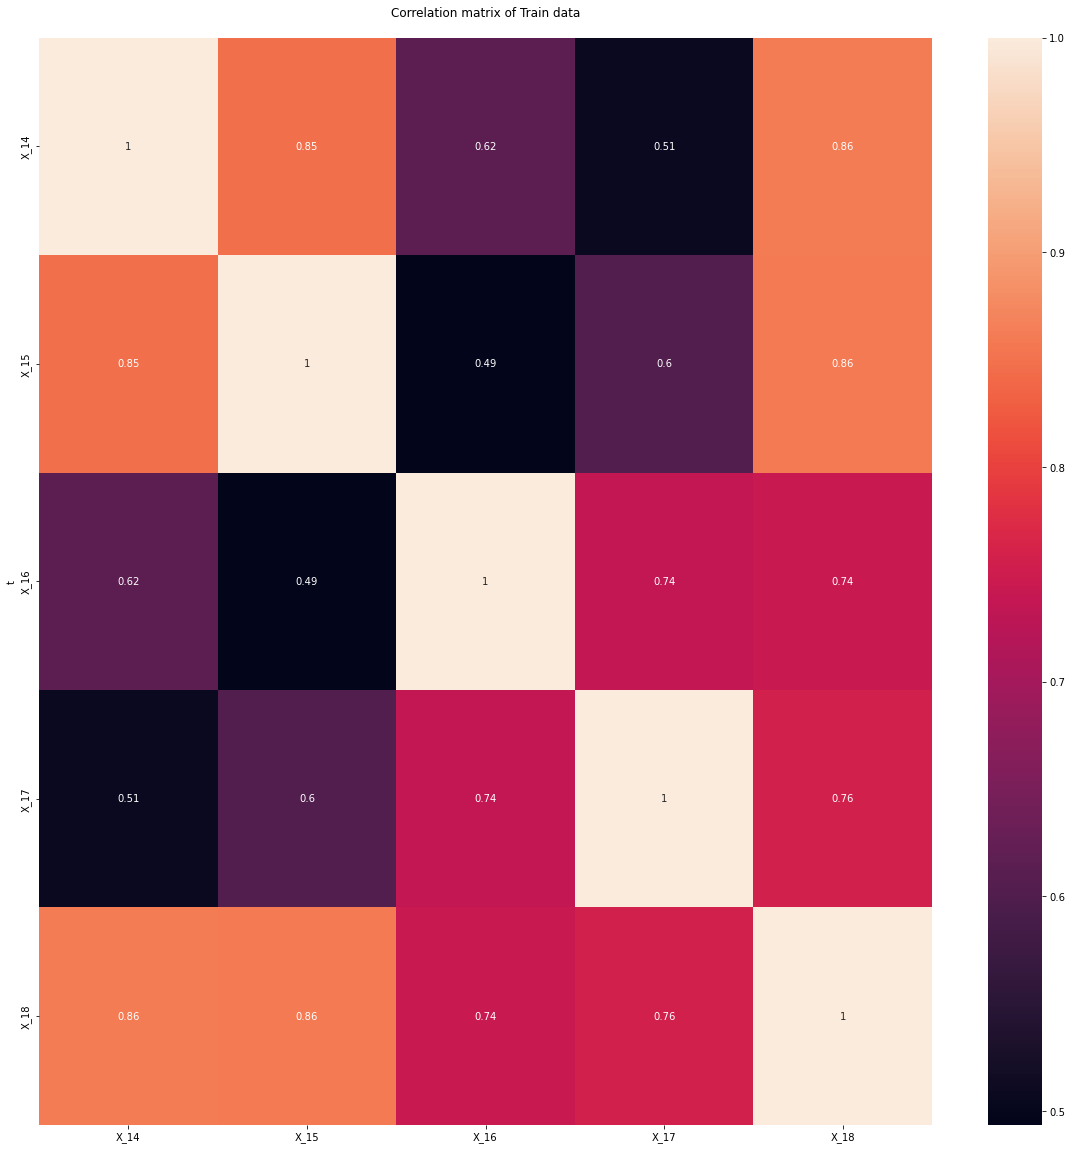

In [24]:
## Correlation Matrix

corr = tmp.corr()

fig, ax = plt.subplots(figsize=(20,20)) 
hm = sns.heatmap(corr, annot = True, ax=ax)
hm.set(xlabel='', ylabel='t', title = "Correlation matrix of Train data\n")
plt.show()

* Group 7

In [25]:
# Group 7 : n(~4)번 스크류 삽입 깊이
tmp = train_x[x_g7.Feature]
tmp.describe()

,X_19,X_20,X_21,X_22
count,39607.000000,39607.000000,39607.000000,39607.000000
mean,3.240229,3.184493,3.174270,3.232673
std,0.110482,0.105266,0.106868,0.108981
min,2.860000,2.830000,2.830000,2.850000
25%,3.160000,3.100000,3.090000,3.140000
50%,3.220000,3.180000,3.160000,3.230000
75%,3.310000,3.270000,3.250000,3.320000
max,3.750000,3.670000,3.680000,3.790000


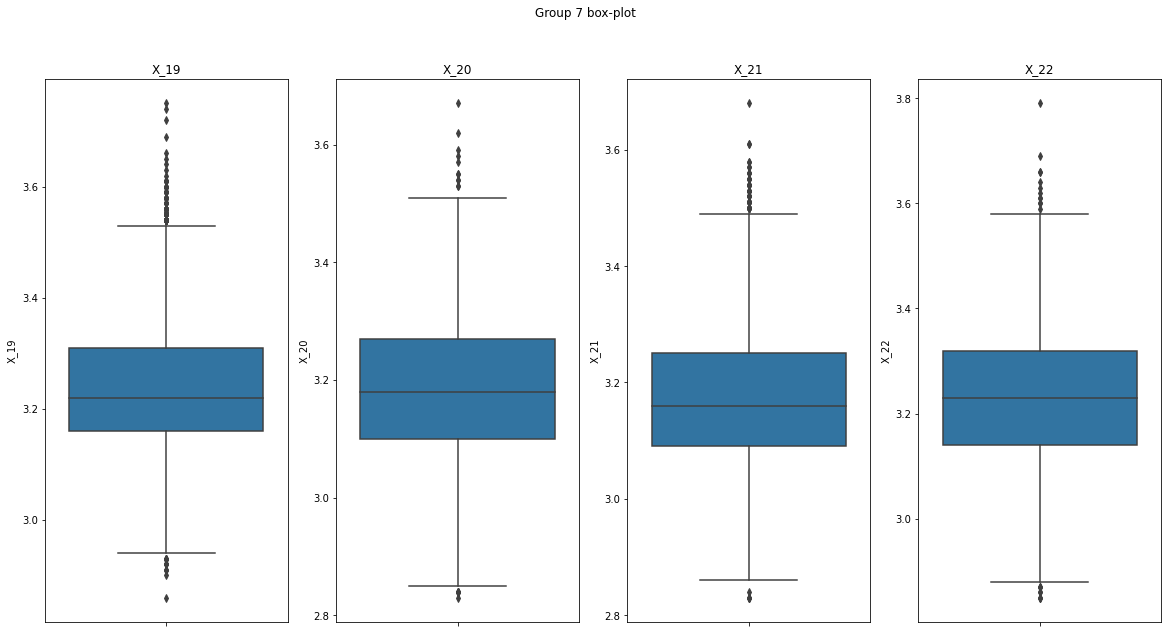

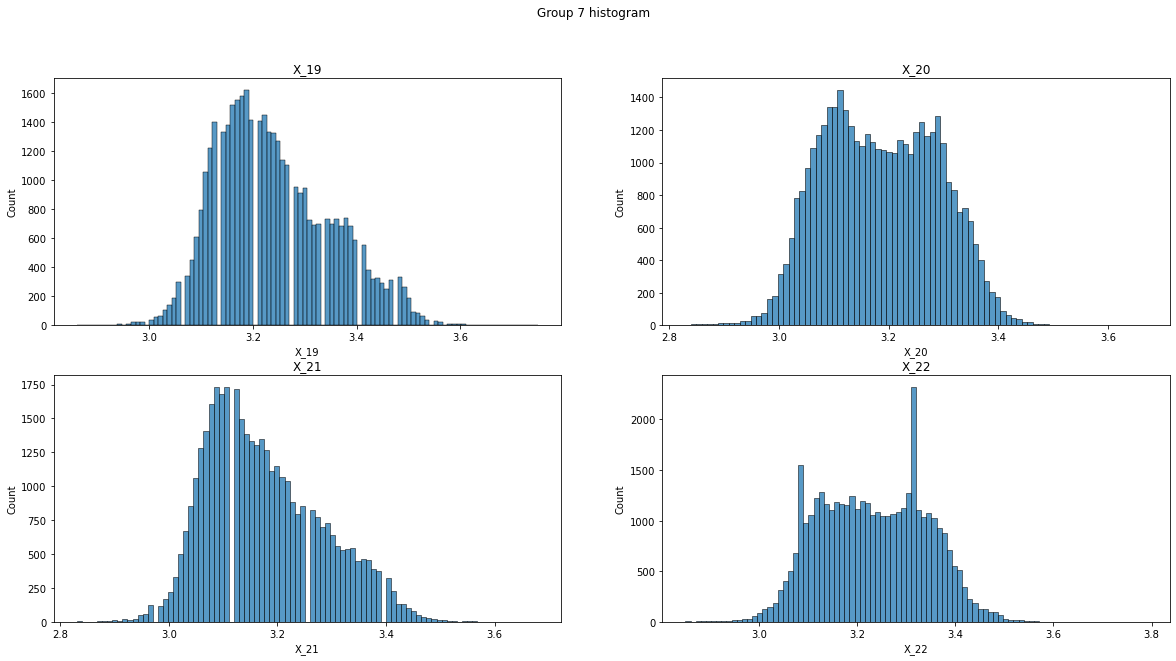

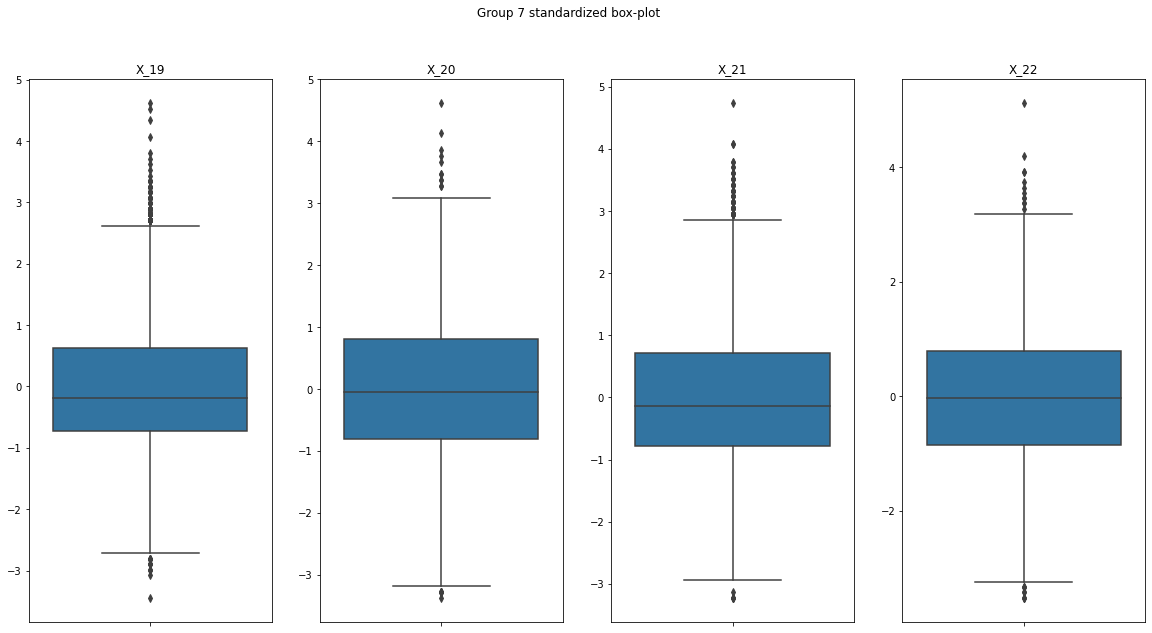

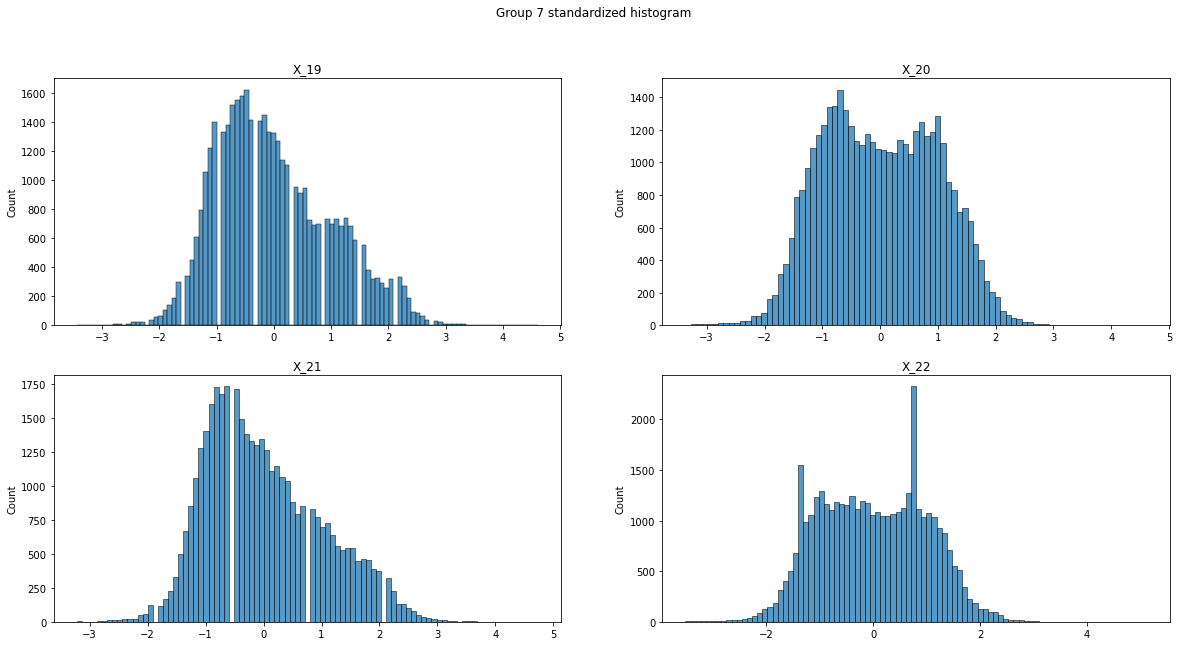

array([[<AxesSubplot:title={'center':'X_19'}, ylabel='Count'>,
        <AxesSubplot:title={'center':'X_20'}, ylabel='Count'>],
       [<AxesSubplot:title={'center':'X_21'}, ylabel='Count'>,
        <AxesSubplot:title={'center':'X_22'}, ylabel='Count'>]],
      dtype=object)

In [26]:
# 
box_plot(group_num=7, 
         data=tmp,
         standardized=False)

hist_plot(group_num=7, 
         data=tmp,
         standardized=False)

# standardize
box_plot(group_num=7, 
         data=tmp,
         standardized=True)

hist_plot(group_num=7, 
         data=tmp,
         standardized=True)

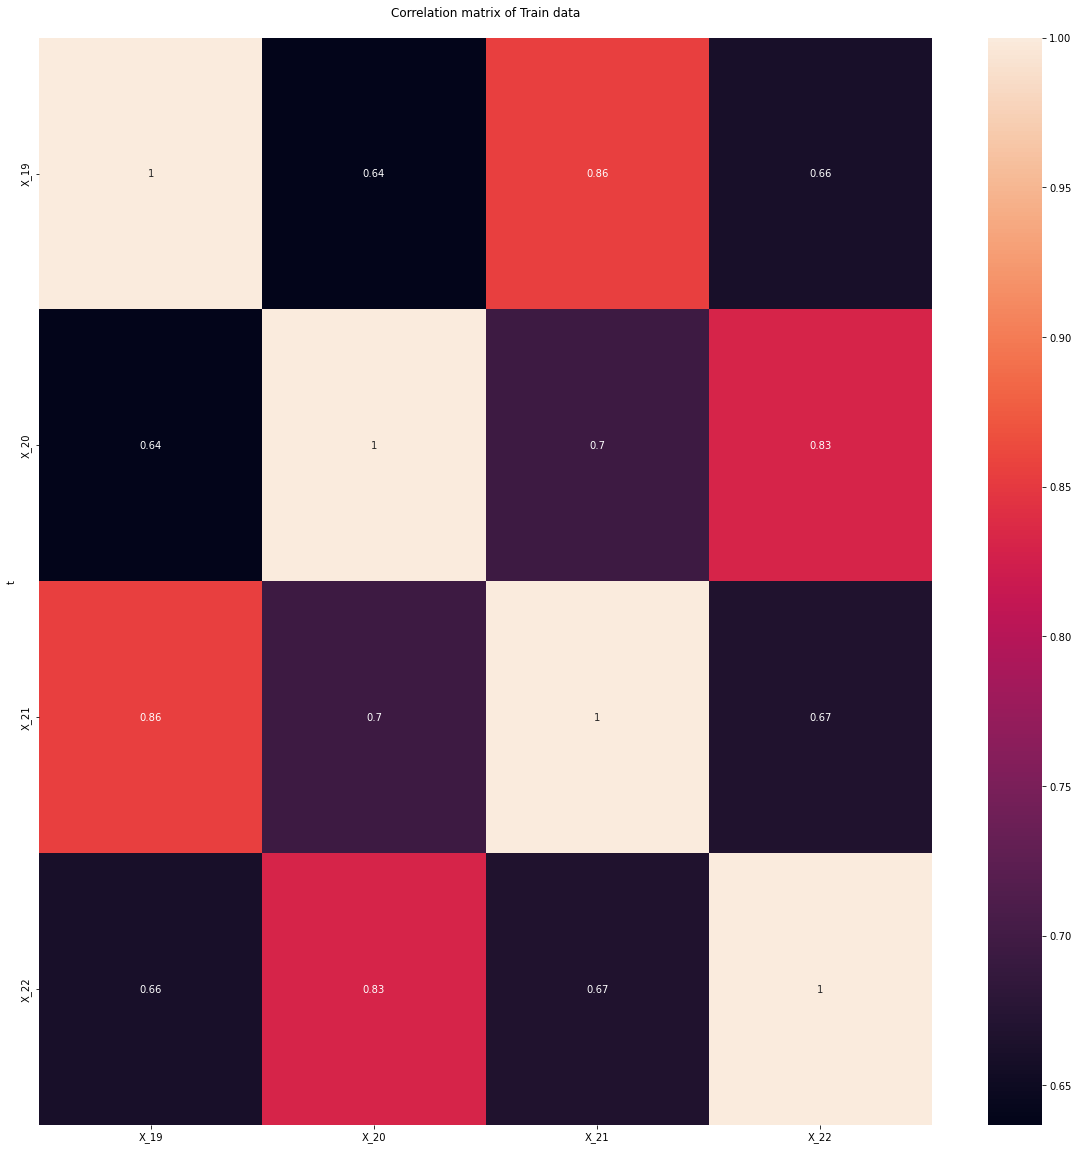

In [27]:
## Correlation Matrix

corr = tmp.corr()

fig, ax = plt.subplots(figsize=(20,20)) 
hm = sns.heatmap(corr, annot = True, ax=ax)
hm.set(xlabel='', ylabel='t', title = "Correlation matrix of Train data\n")
plt.show()

* Group 8

In [28]:
# Group 8 : 커넥터 n(~6)번 핀 치수
tmp = train_x[x_g8.Feature]
tmp.describe()

,X_24,X_25,X_26,X_27,X_28,X_29
count,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000
mean,2.115674,2.093895,2.090377,2.098249,2.118594,2.173727
std,0.032440,0.033148,0.038512,0.038056,0.042782,0.046689
min,1.830000,1.960000,1.980000,1.990000,1.930000,2.020000
25%,2.090000,2.070000,2.060000,2.070000,2.090000,2.140000
50%,2.120000,2.090000,2.090000,2.090000,2.120000,2.170000
75%,2.140000,2.120000,2.120000,2.120000,2.140000,2.200000
max,2.350000,2.350000,2.350000,2.350000,2.350000,2.360000


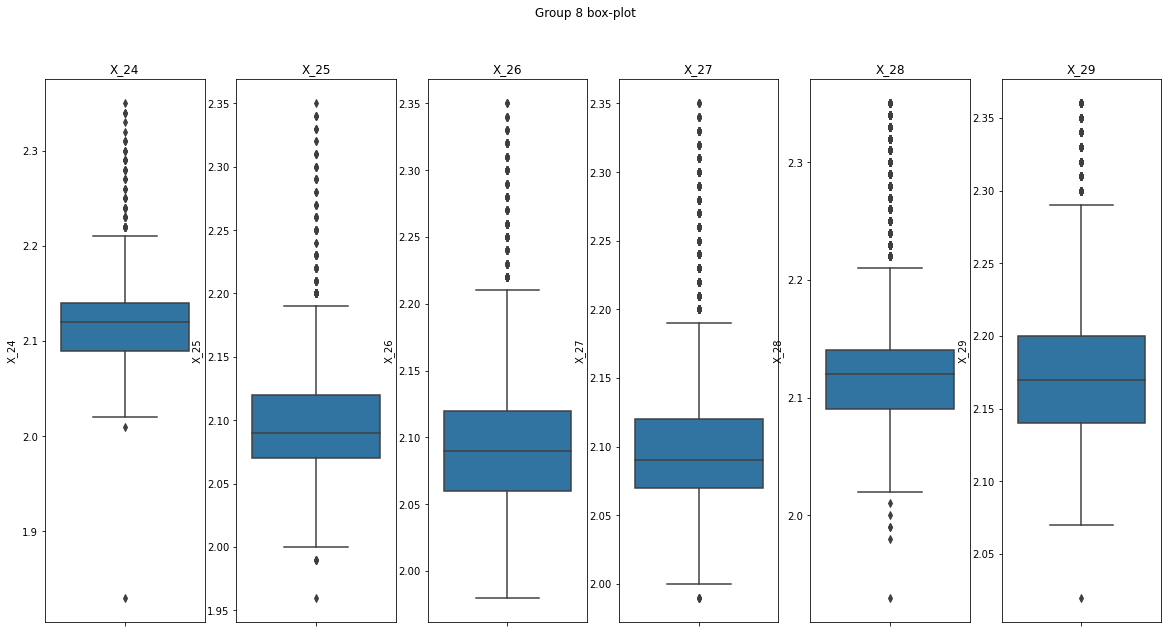

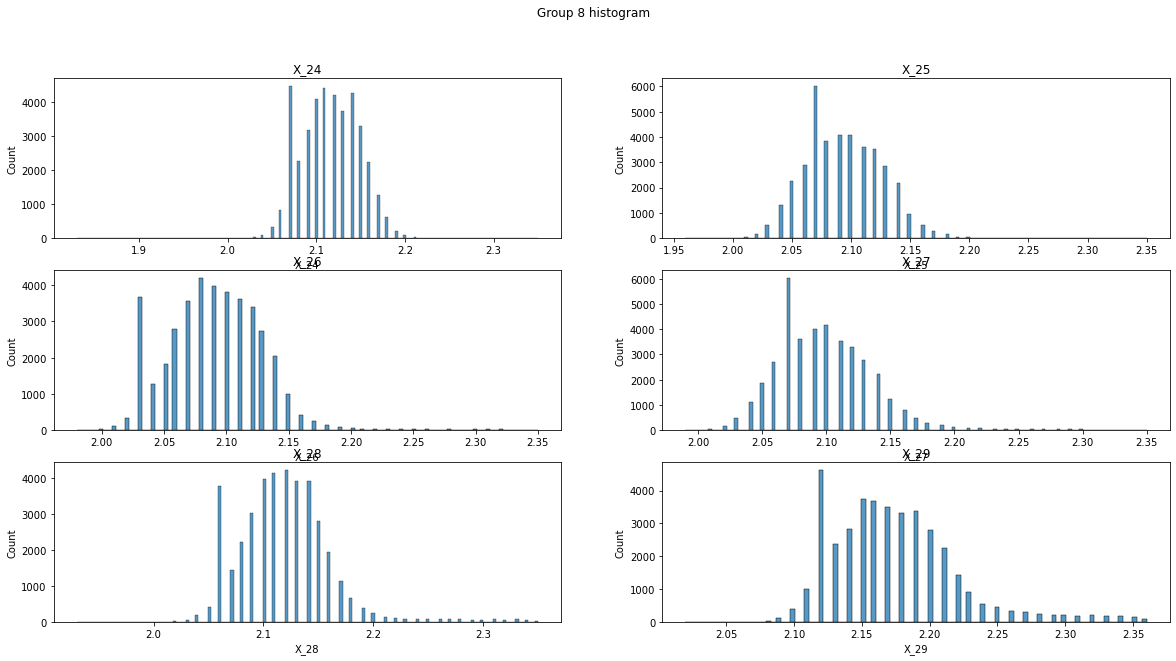

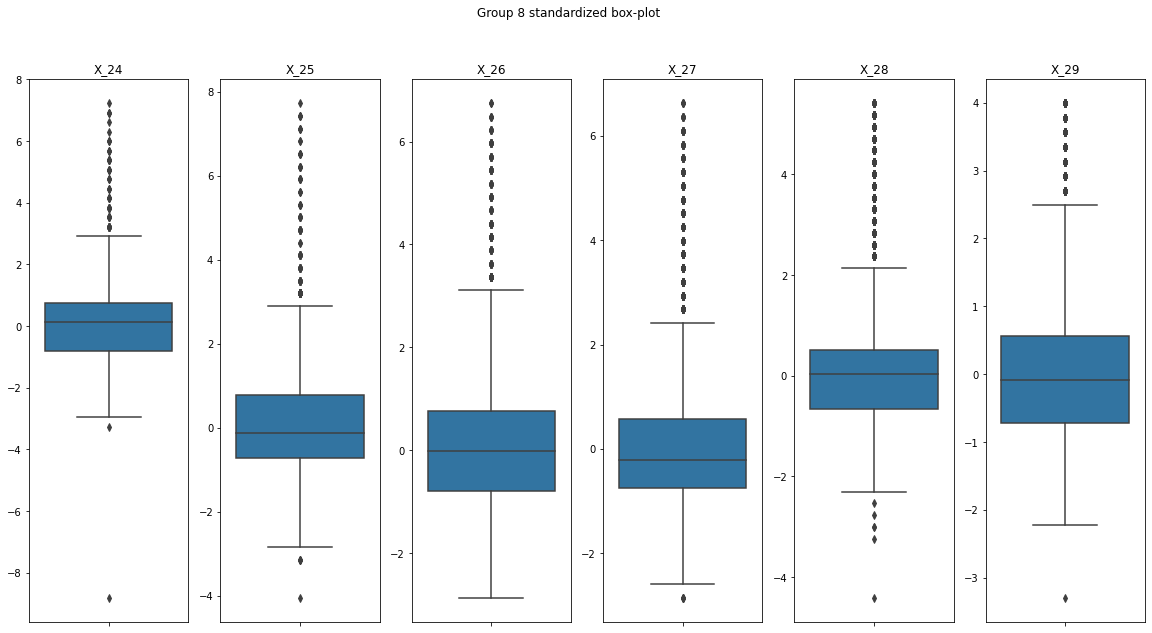

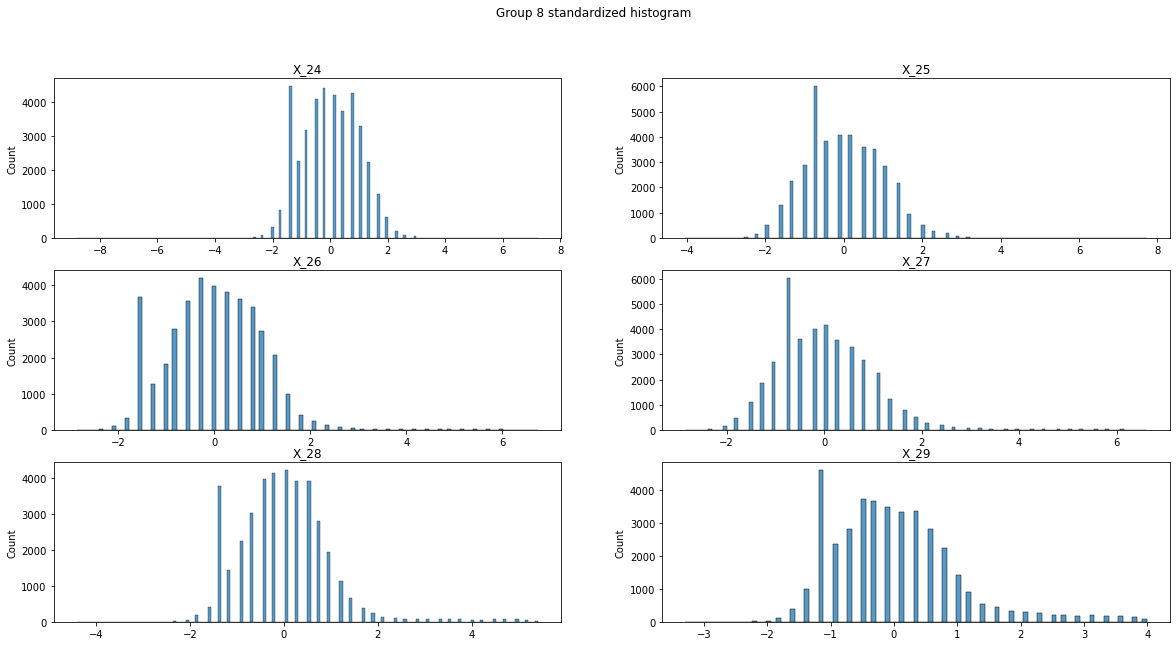

array([[<AxesSubplot:title={'center':'X_24'}, ylabel='Count'>,
        <AxesSubplot:title={'center':'X_25'}, ylabel='Count'>],
       [<AxesSubplot:title={'center':'X_26'}, ylabel='Count'>,
        <AxesSubplot:title={'center':'X_27'}, ylabel='Count'>],
       [<AxesSubplot:title={'center':'X_28'}, ylabel='Count'>,
        <AxesSubplot:title={'center':'X_29'}, ylabel='Count'>]],
      dtype=object)

In [29]:
# 
box_plot(group_num=8, 
         data=tmp,
         standardized=False)

hist_plot(group_num=8, 
         data=tmp,
         standardized=False)

# standardize
box_plot(group_num=8, 
         data=tmp,
         standardized=True)

hist_plot(group_num=8, 
         data=tmp,
         standardized=True)

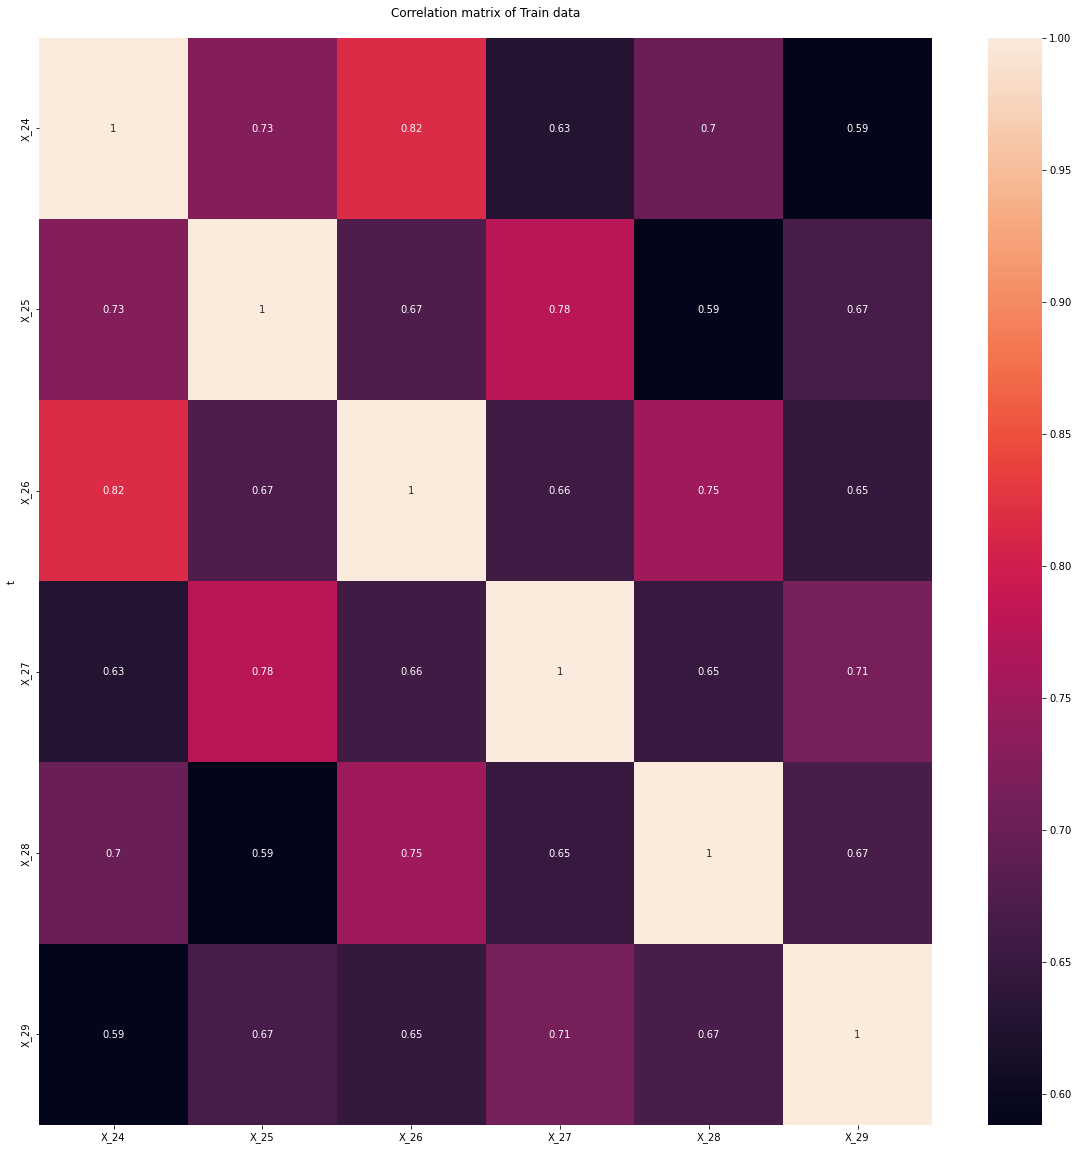

In [30]:
## Correlation Matrix

corr = tmp.corr()

fig, ax = plt.subplots(figsize=(20,20)) 
hm = sns.heatmap(corr, annot = True, ax=ax)
hm.set(xlabel='', ylabel='t', title = "Correlation matrix of Train data\n")
plt.show()

* Group 9

In [31]:
# Group 9 : 스크류 삽입 깊이n(~4)
tmp = train_x[x_g9.Feature]
tmp.describe()

,X_30,X_31,X_32,X_33
count,39607.000000,39607.000000,39607.000000,39607.000000
mean,1.378994,1.571141,1.362929,1.595723
std,0.030412,0.074520,0.029945,0.108028
min,0.570000,0.600000,0.570000,0.610000
25%,1.370000,1.530000,1.350000,1.550000
50%,1.370000,1.550000,1.360000,1.570000
75%,1.380000,1.600000,1.370000,1.610000
max,2.110000,7.210000,2.450000,7.810000


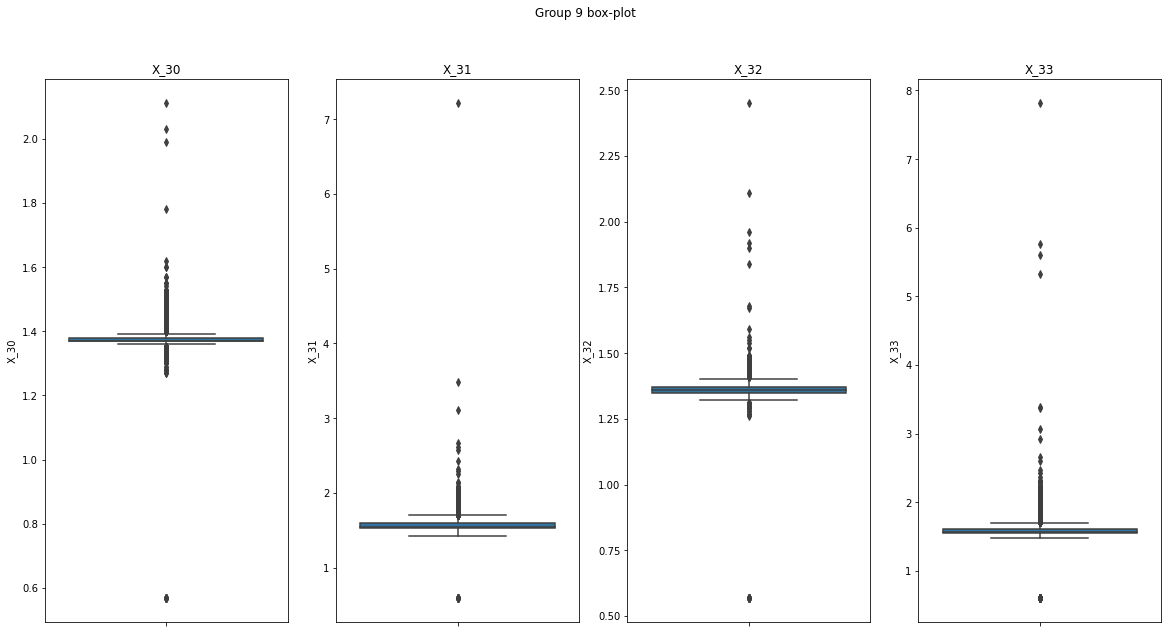

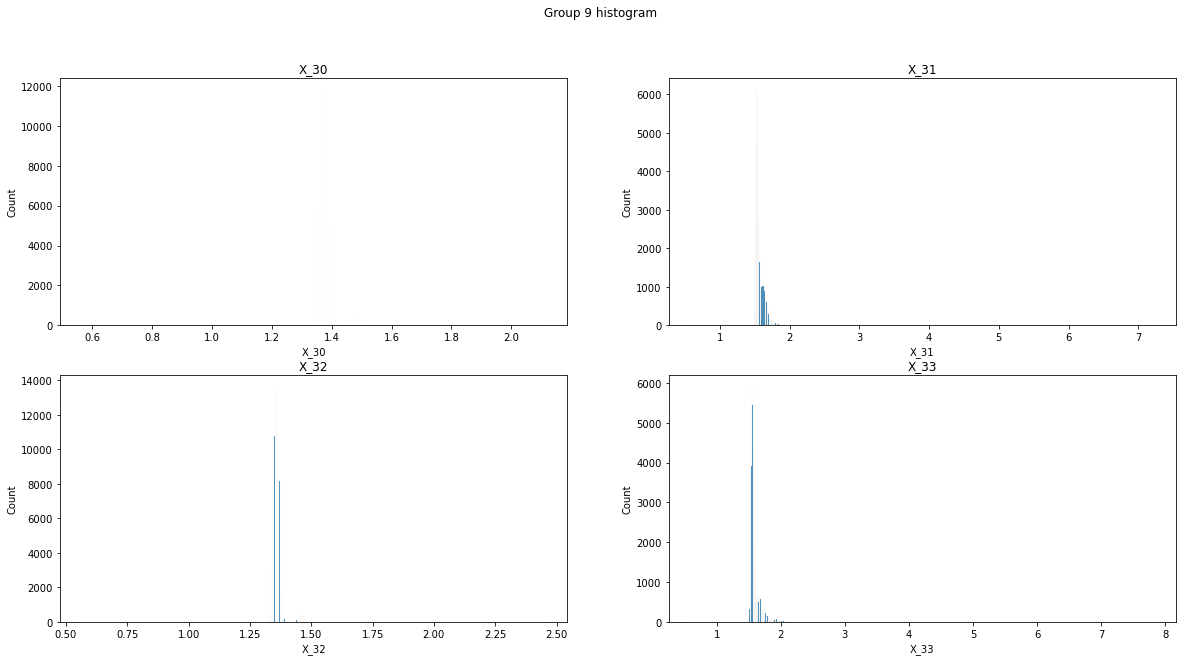

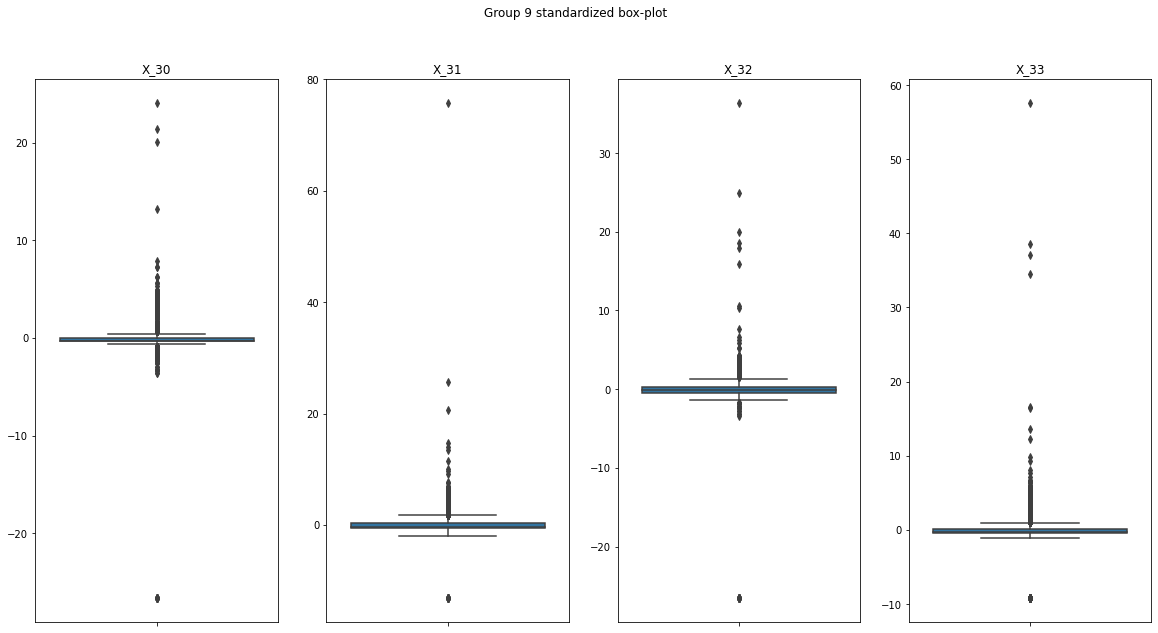

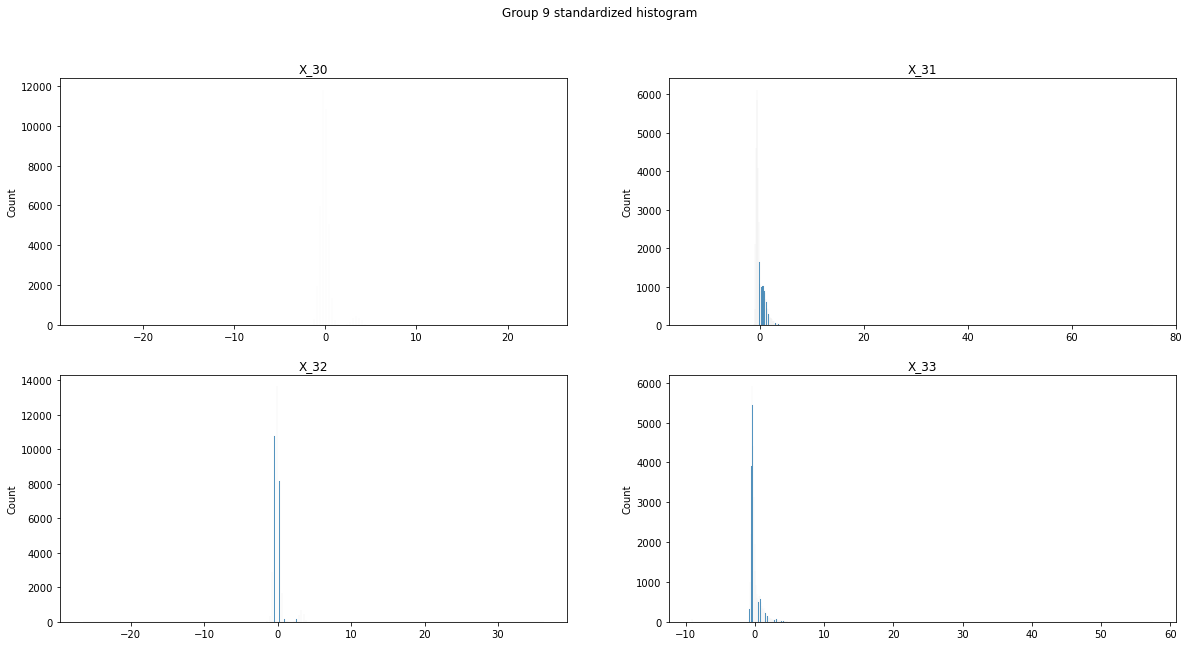

array([[<AxesSubplot:title={'center':'X_30'}, ylabel='Count'>,
        <AxesSubplot:title={'center':'X_31'}, ylabel='Count'>],
       [<AxesSubplot:title={'center':'X_32'}, ylabel='Count'>,
        <AxesSubplot:title={'center':'X_33'}, ylabel='Count'>]],
      dtype=object)

In [32]:
# 
box_plot(group_num=9, 
         data=tmp,
         standardized=False)

hist_plot(group_num=9, 
         data=tmp,
         standardized=False)

# standardize
box_plot(group_num=9, 
         data=tmp,
         standardized=True)

hist_plot(group_num=9, 
         data=tmp,
         standardized=True)

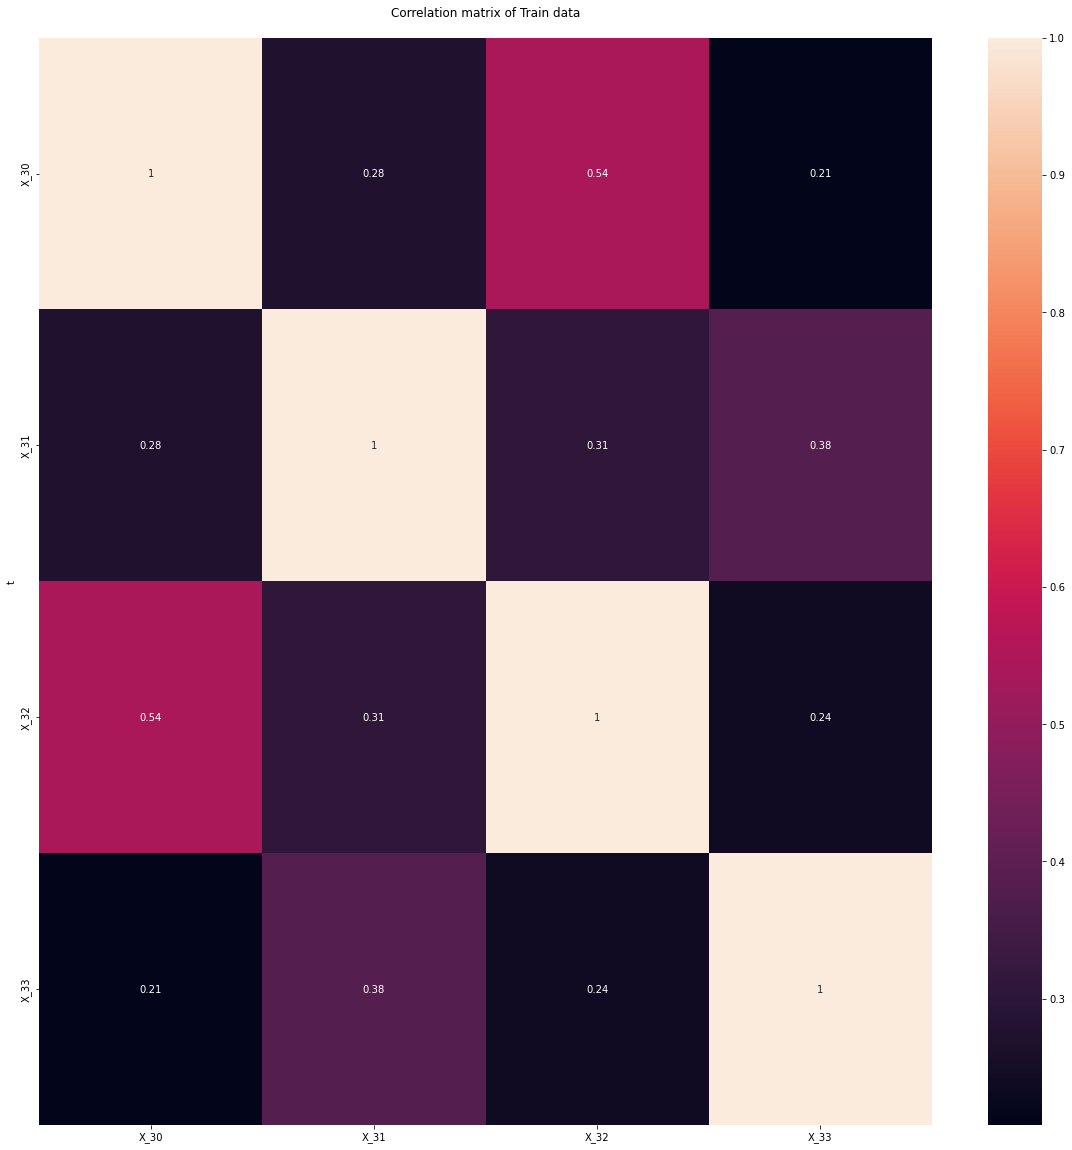

In [33]:
## Correlation Matrix

corr = tmp.corr()

fig, ax = plt.subplots(figsize=(20,20)) 
hm = sns.heatmap(corr, annot = True, ax=ax)
hm.set(xlabel='', ylabel='t', title = "Correlation matrix of Train data\n")
plt.show()

* Group 10

In [34]:
# Group 10 : 스크류 체결 시 분당 회전수 n(~4)
tmp = train_x[x_g10.Feature]
tmp.describe()

,X_34,X_35,X_36,X_37
count,39607.000000,39607.000000,39607.000000,39607.000000
mean,12.950271,12.920343,12.941728,12.919139
std,0.044030,0.052238,0.047830,0.052292
min,12.840000,12.810000,12.840000,12.810000
25%,12.920000,12.870000,12.900000,12.870000
50%,12.960000,12.920000,12.950000,12.910000
75%,12.990000,12.970000,12.980000,12.970000
max,13.080000,13.090000,13.090000,13.080000


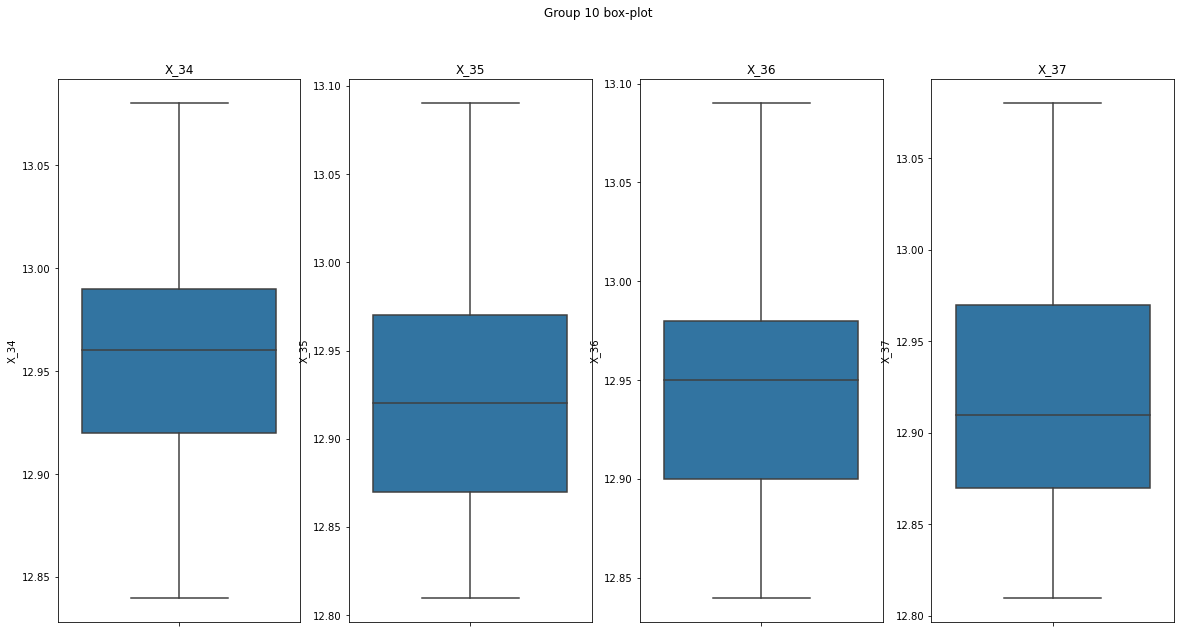

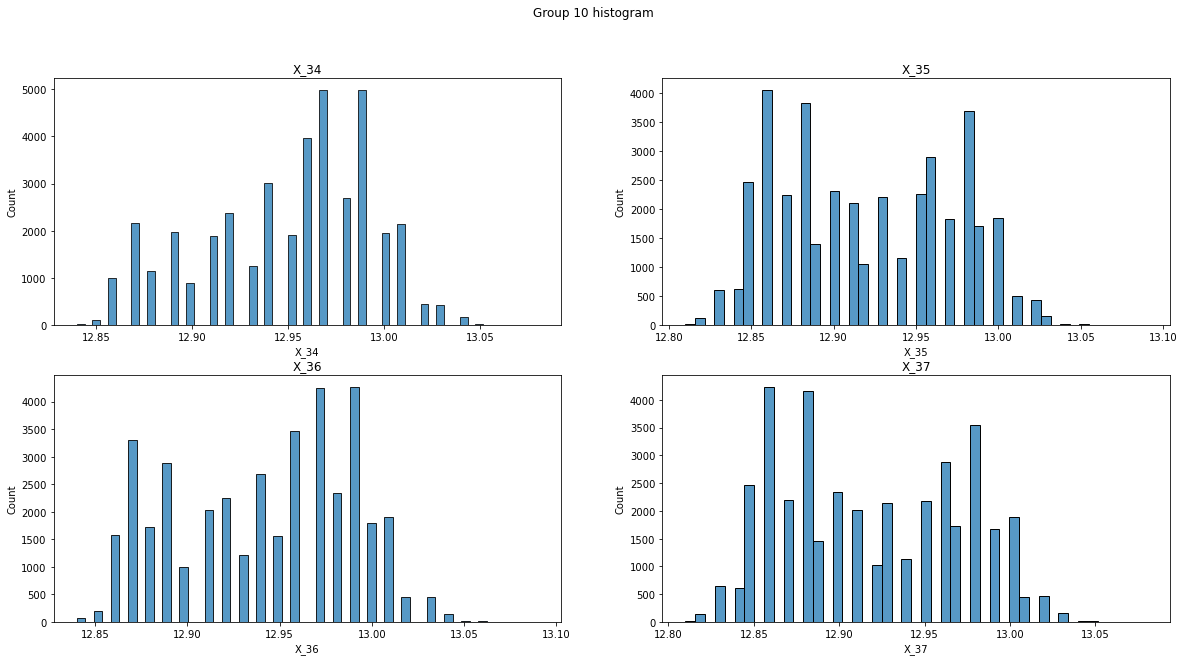

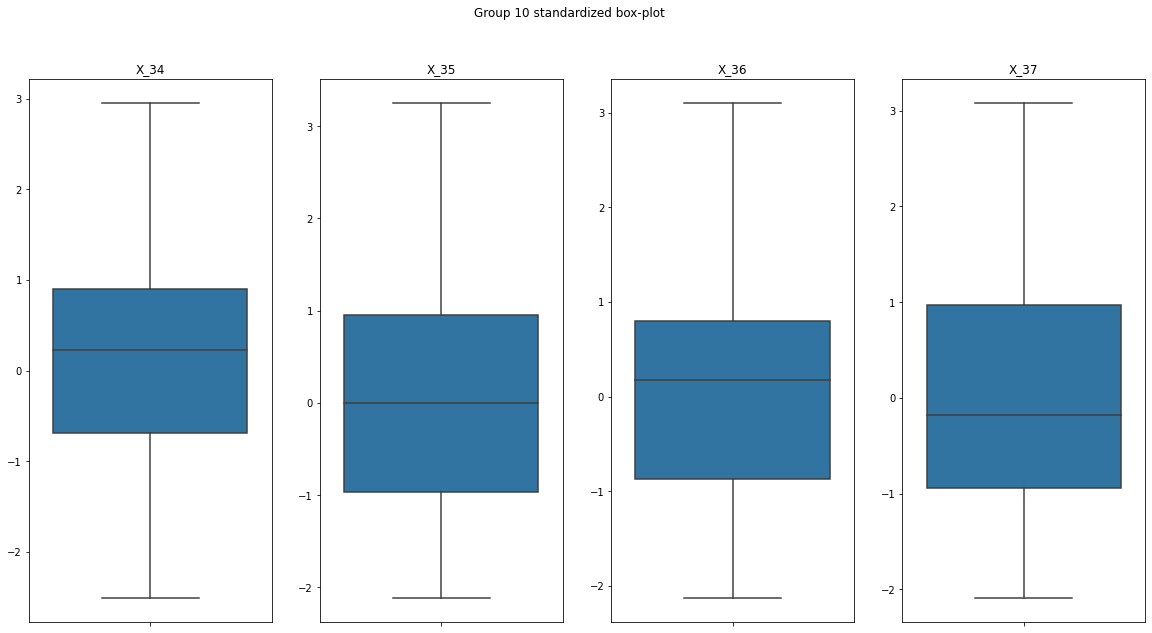

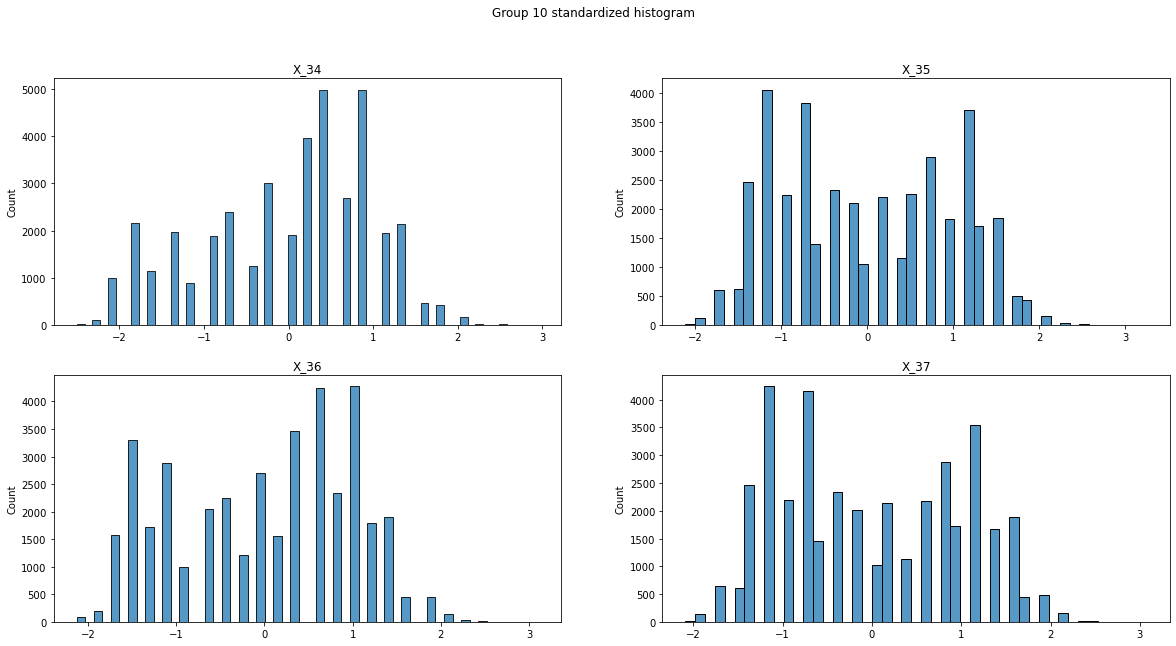

array([[<AxesSubplot:title={'center':'X_34'}, ylabel='Count'>,
        <AxesSubplot:title={'center':'X_35'}, ylabel='Count'>],
       [<AxesSubplot:title={'center':'X_36'}, ylabel='Count'>,
        <AxesSubplot:title={'center':'X_37'}, ylabel='Count'>]],
      dtype=object)

In [35]:
# 
box_plot(group_num=10, 
         data=tmp,
         standardized=False)

hist_plot(group_num=10, 
         data=tmp,
         standardized=False)

# standardize
box_plot(group_num=10, 
         data=tmp,
         standardized=True)

hist_plot(group_num=10, 
         data=tmp,
         standardized=True)

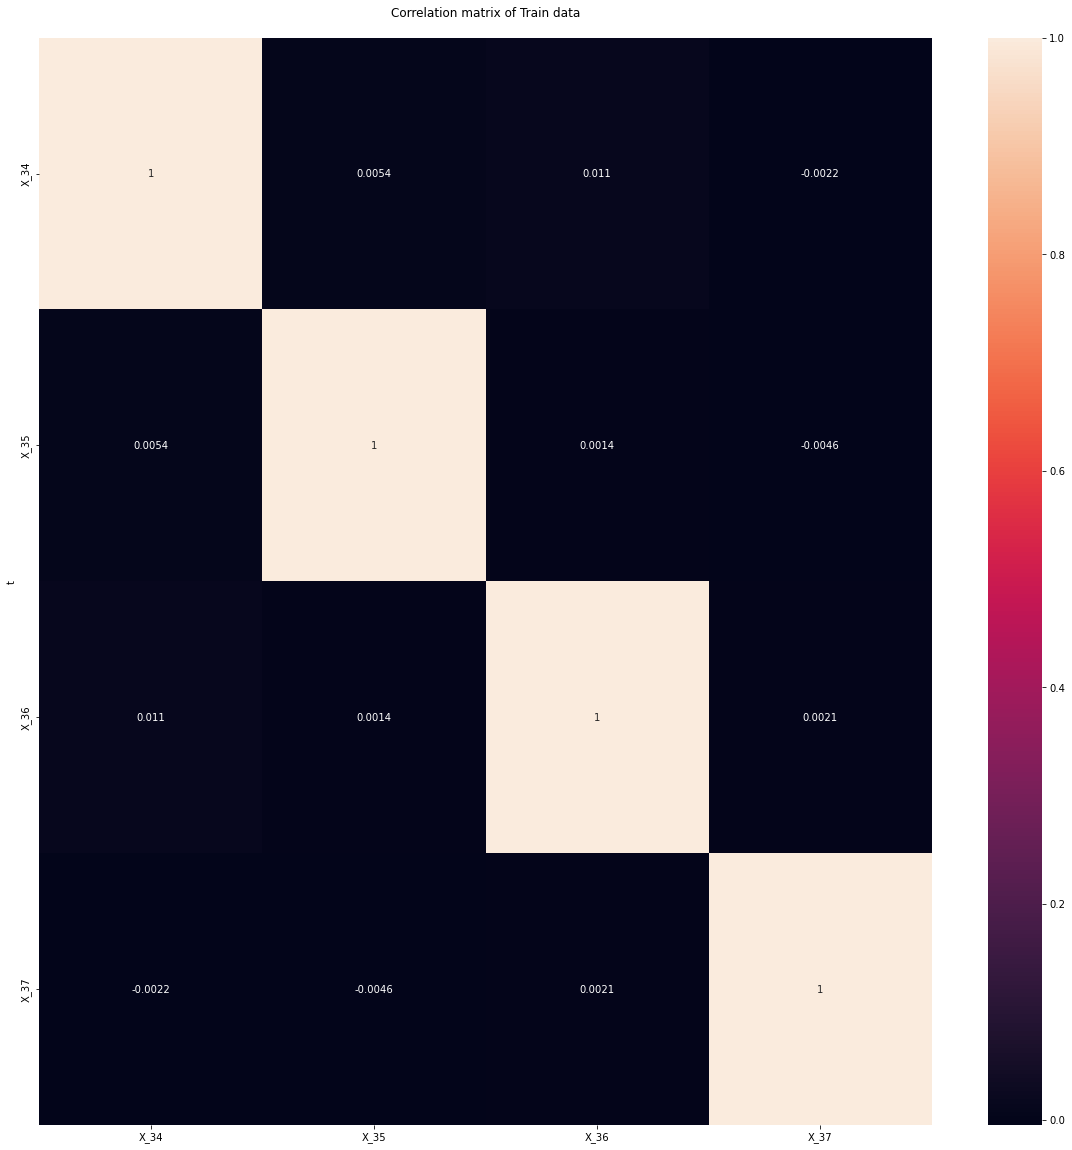

In [36]:
## Correlation Matrix

corr = tmp.corr()

fig, ax = plt.subplots(figsize=(20,20)) 
hm = sns.heatmap(corr, annot = True, ax=ax)
hm.set(xlabel='', ylabel='t', title = "Correlation matrix of Train data\n")
plt.show()

In [12]:
# Group 9 + 10 : 스크류 삽입 깊이n(~4)
tmp = train_x[pd.concat([x_g9.Feature, x_g10.Feature])]
tmp.describe()

,X_30,X_31,X_32,X_33,X_34,X_35,X_36,X_37
count,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000
mean,1.378994,1.571141,1.362929,1.595723,12.950271,12.920343,12.941728,12.919139
std,0.030412,0.074520,0.029945,0.108028,0.044030,0.052238,0.047830,0.052292
min,0.570000,0.600000,0.570000,0.610000,12.840000,12.810000,12.840000,12.810000
25%,1.370000,1.530000,1.350000,1.550000,12.920000,12.870000,12.900000,12.870000
50%,1.370000,1.550000,1.360000,1.570000,12.960000,12.920000,12.950000,12.910000
75%,1.380000,1.600000,1.370000,1.610000,12.990000,12.970000,12.980000,12.970000
max,2.110000,7.210000,2.450000,7.810000,13.080000,13.090000,13.090000,13.080000


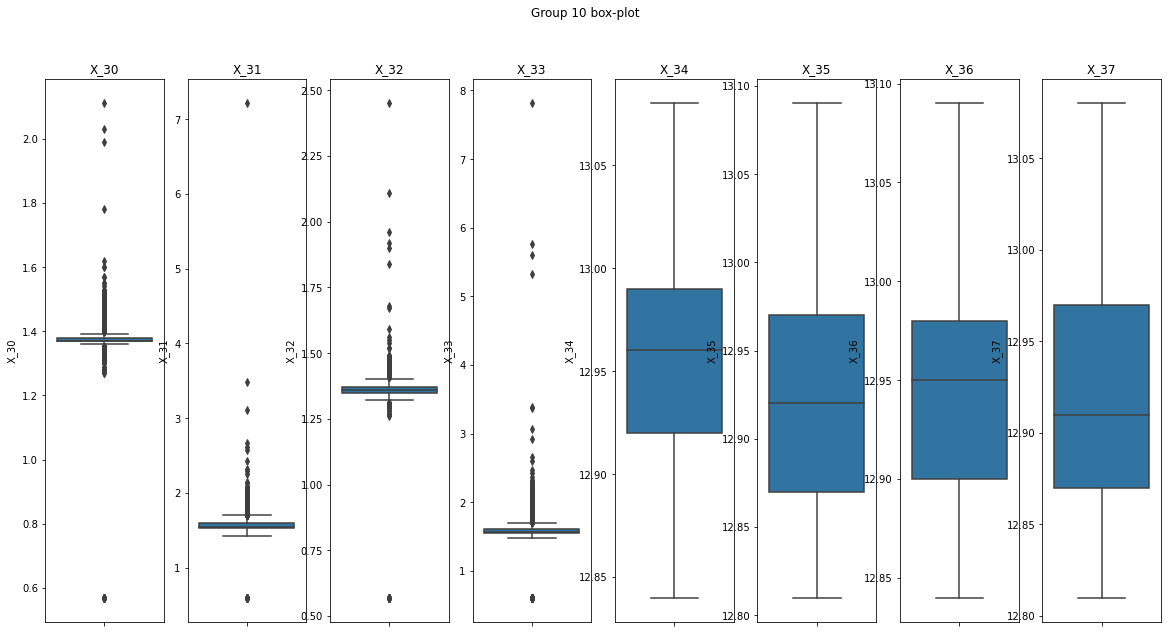

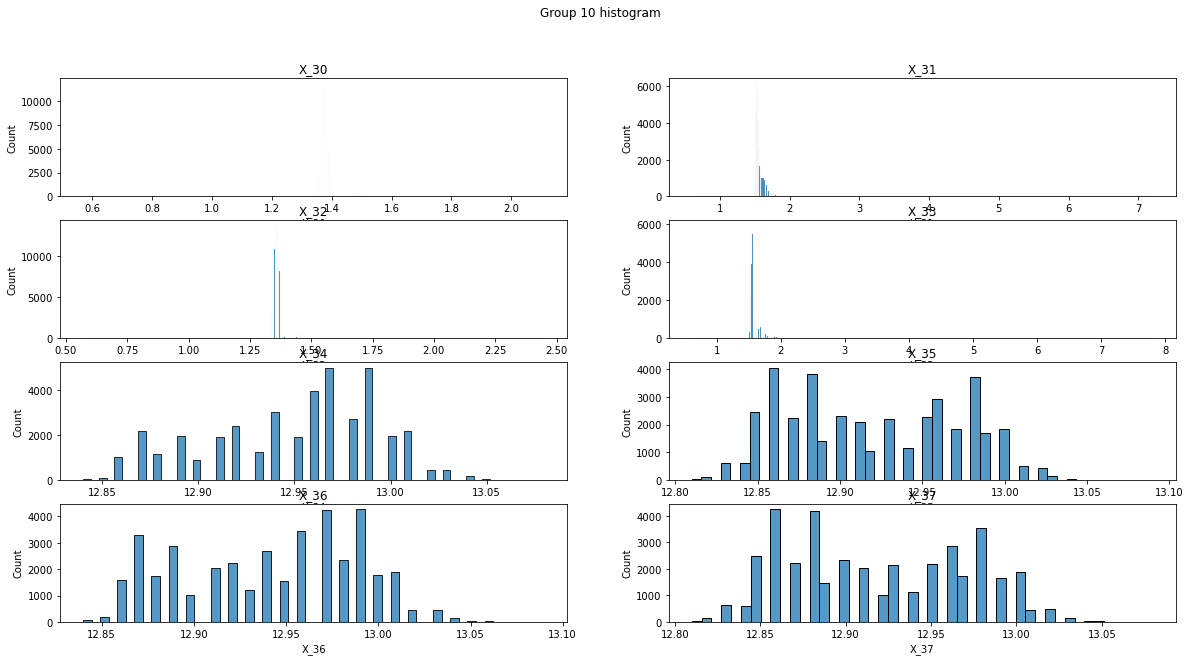

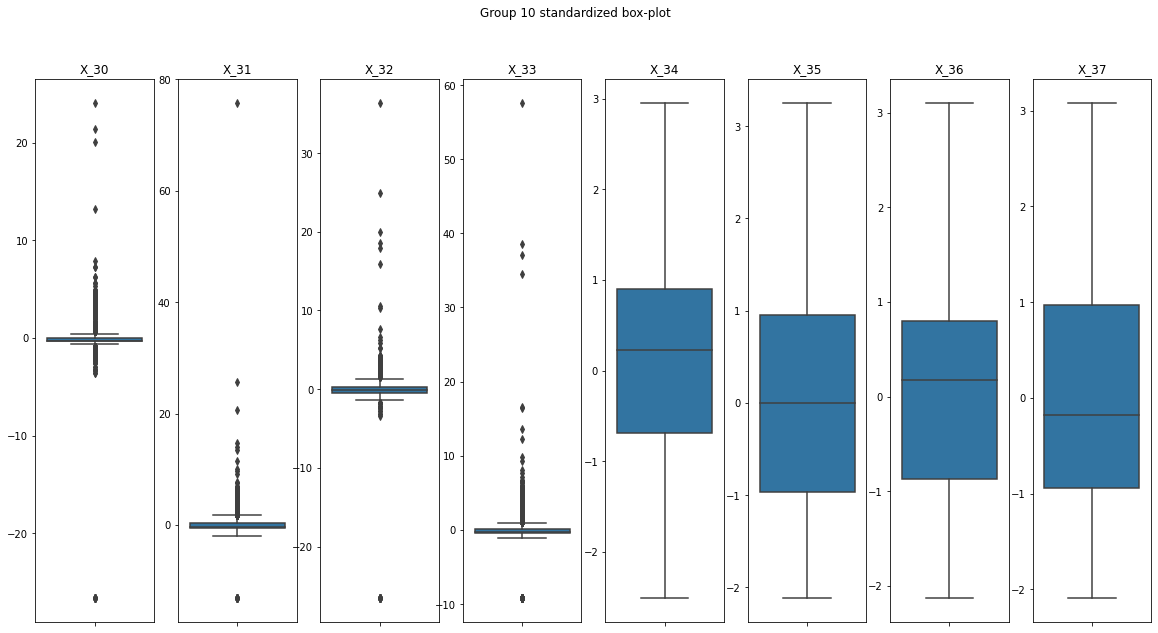

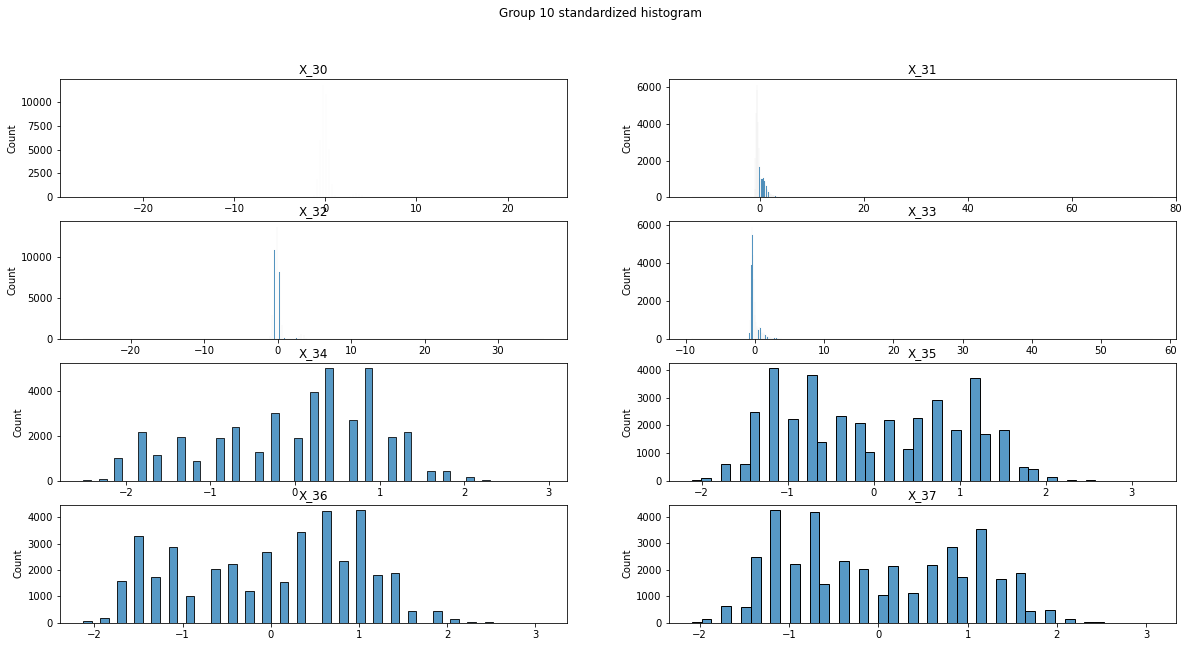

array([[<AxesSubplot:title={'center':'X_30'}, ylabel='Count'>,
        <AxesSubplot:title={'center':'X_31'}, ylabel='Count'>],
       [<AxesSubplot:title={'center':'X_32'}, ylabel='Count'>,
        <AxesSubplot:title={'center':'X_33'}, ylabel='Count'>],
       [<AxesSubplot:title={'center':'X_34'}, ylabel='Count'>,
        <AxesSubplot:title={'center':'X_35'}, ylabel='Count'>],
       [<AxesSubplot:title={'center':'X_36'}, ylabel='Count'>,
        <AxesSubplot:title={'center':'X_37'}, ylabel='Count'>]],
      dtype=object)

In [13]:
# 
box_plot(group_num=10, 
         data=tmp,
         standardized=False)

hist_plot(group_num=10, 
         data=tmp,
         standardized=False)

# standardize
box_plot(group_num=10, 
         data=tmp,
         standardized=True)

hist_plot(group_num=10, 
         data=tmp,
         standardized=True)

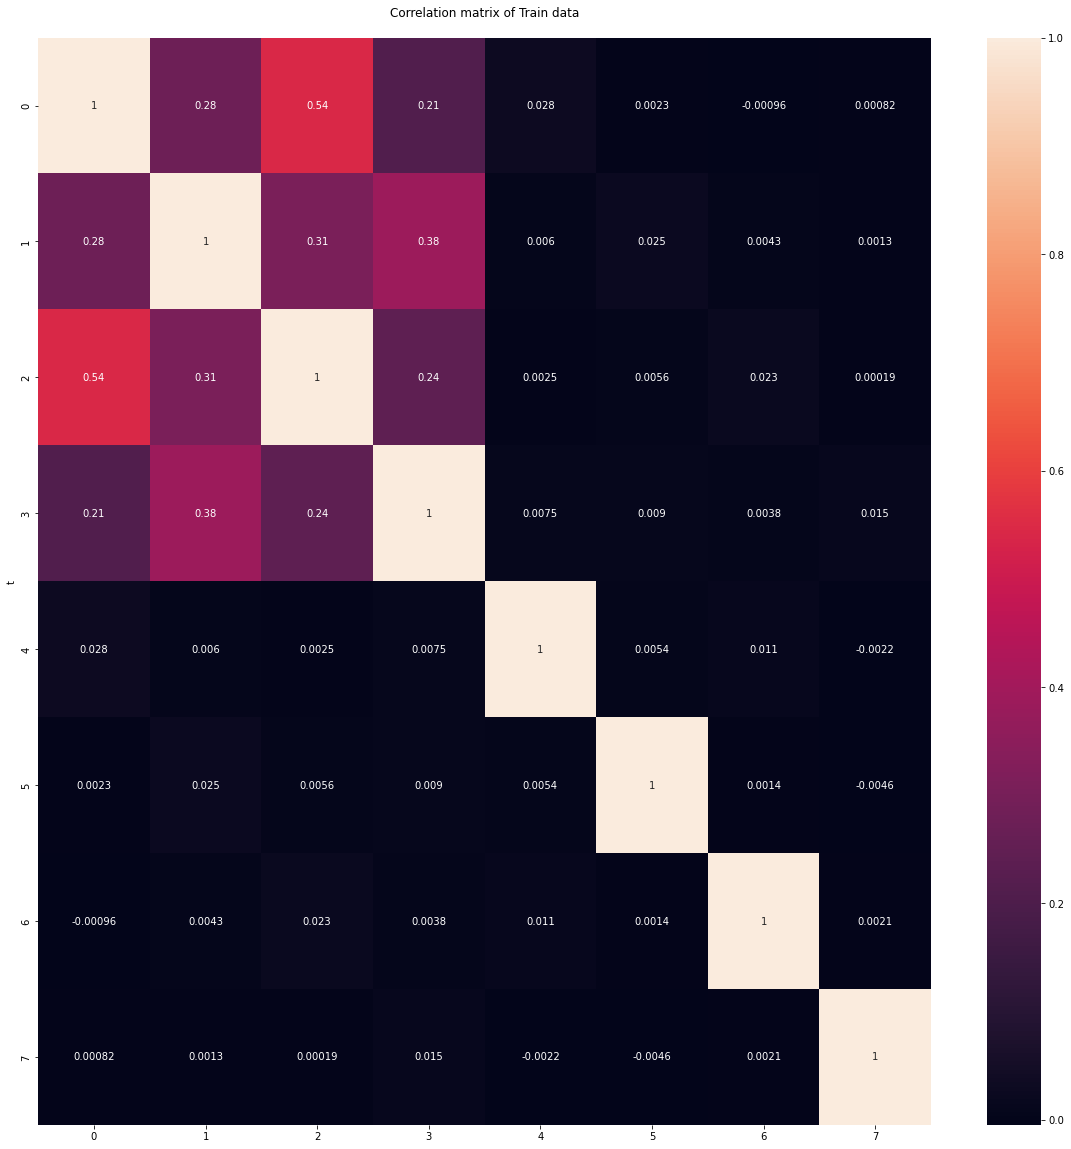

In [14]:
## Correlation Matrix

# corr = tmp.corr()

# fig, ax = plt.subplots(figsize=(20,20)) 
# hm = sns.heatmap(corr, annot = True, ax=ax)
# hm.set(xlabel='', ylabel='t', title = "Correlation matrix of Train data\n")
# plt.show()


scaler = StandardScaler()
scaled_data = scaler.fit_transform(tmp)

corr = pd.DataFrame(scaled_data).corr()

fig, ax = plt.subplots(figsize=(20,20)) 
hm = sns.heatmap(corr, annot = True, ax=ax)
hm.set(xlabel='', ylabel='t', title = "Correlation matrix of Train data\n")
plt.show()

* Group 11

In [15]:
# Group 11 : 하우징 PCB 안착부 n(~3) 치수
tmp = train_x[x_g11.Feature]
tmp.describe()

,X_38,X_39,X_40
count,39607.000000,39607.000000,39607.000000
mean,-15.903737,-15.889576,-16.572162
std,0.595420,0.746665,0.344486
min,-17.090000,-17.090000,-17.720000
25%,-16.160000,-16.160000,-16.810000
50%,-15.990000,-15.990000,-16.640000
75%,-15.750000,-15.750000,-16.400000
max,32.230000,-2.650000,-14.800000


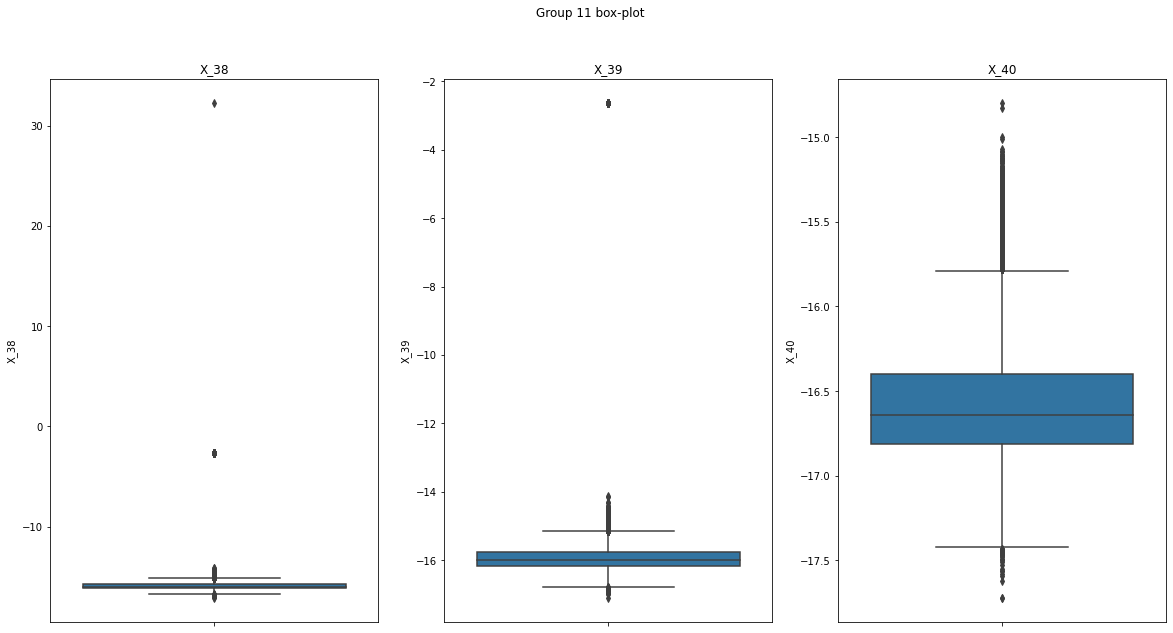

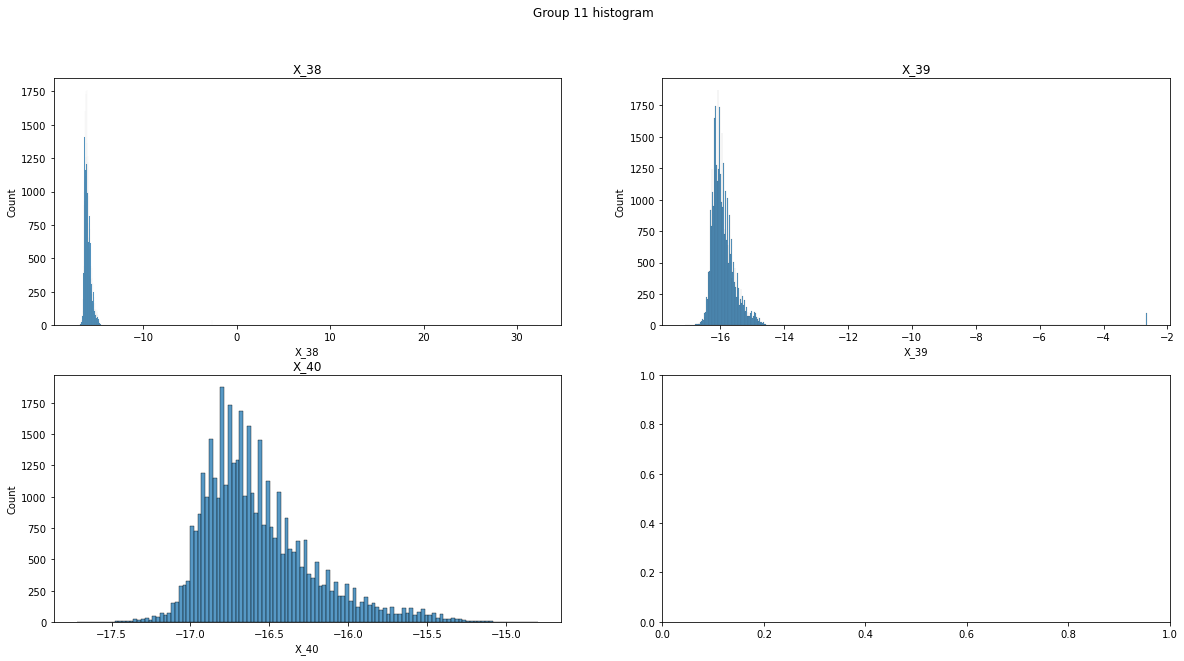

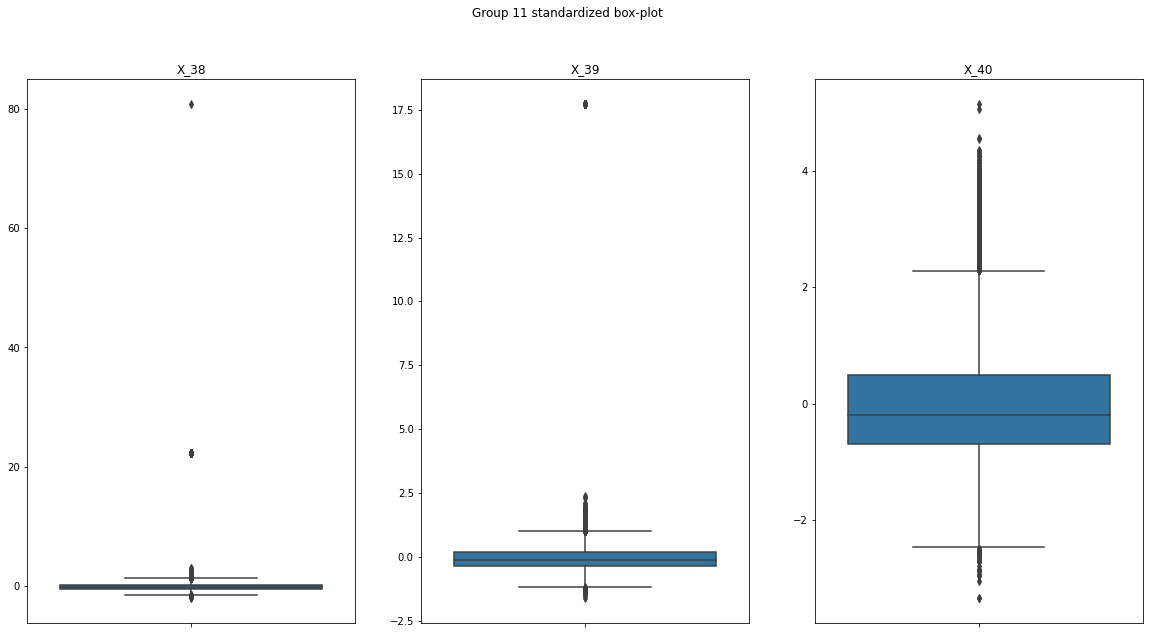

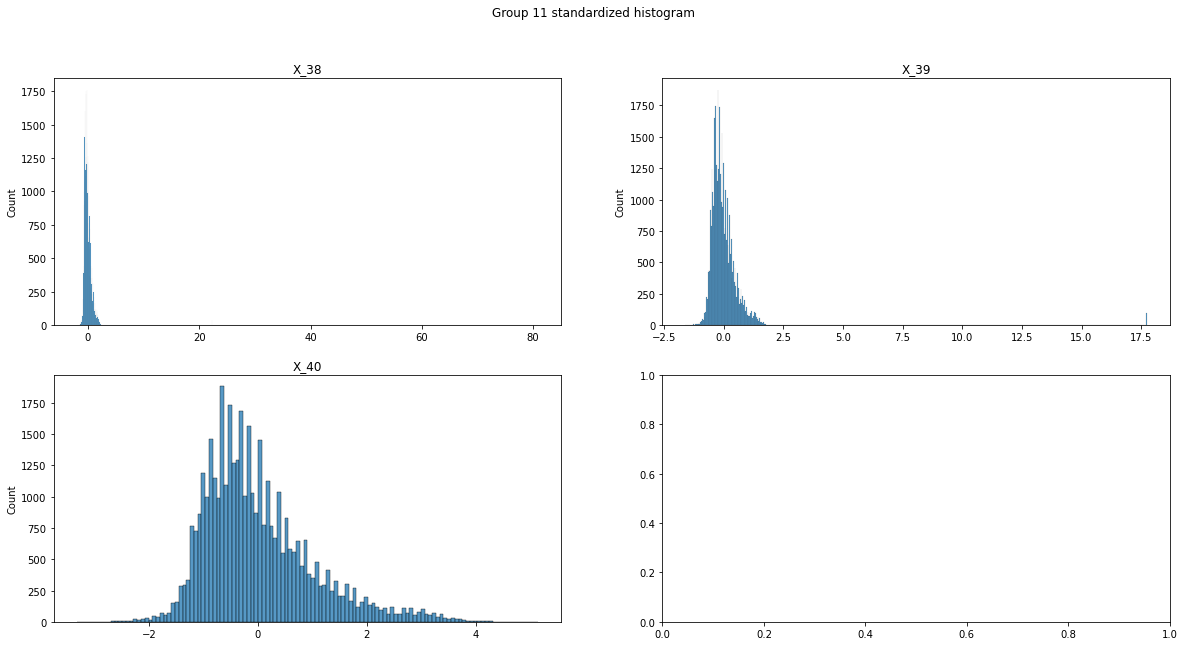

array([[<AxesSubplot:title={'center':'X_38'}, ylabel='Count'>,
        <AxesSubplot:title={'center':'X_39'}, ylabel='Count'>],
       [<AxesSubplot:title={'center':'X_40'}, ylabel='Count'>,
        <AxesSubplot:>]], dtype=object)

In [16]:
# 
box_plot(group_num=11, 
         data=tmp,
         standardized=False)

hist_plot(group_num=11, 
         data=tmp,
         standardized=False)

# standardize
box_plot(group_num=11, 
         data=tmp,
         standardized=True)

hist_plot(group_num=11, 
         data=tmp,
         standardized=True)

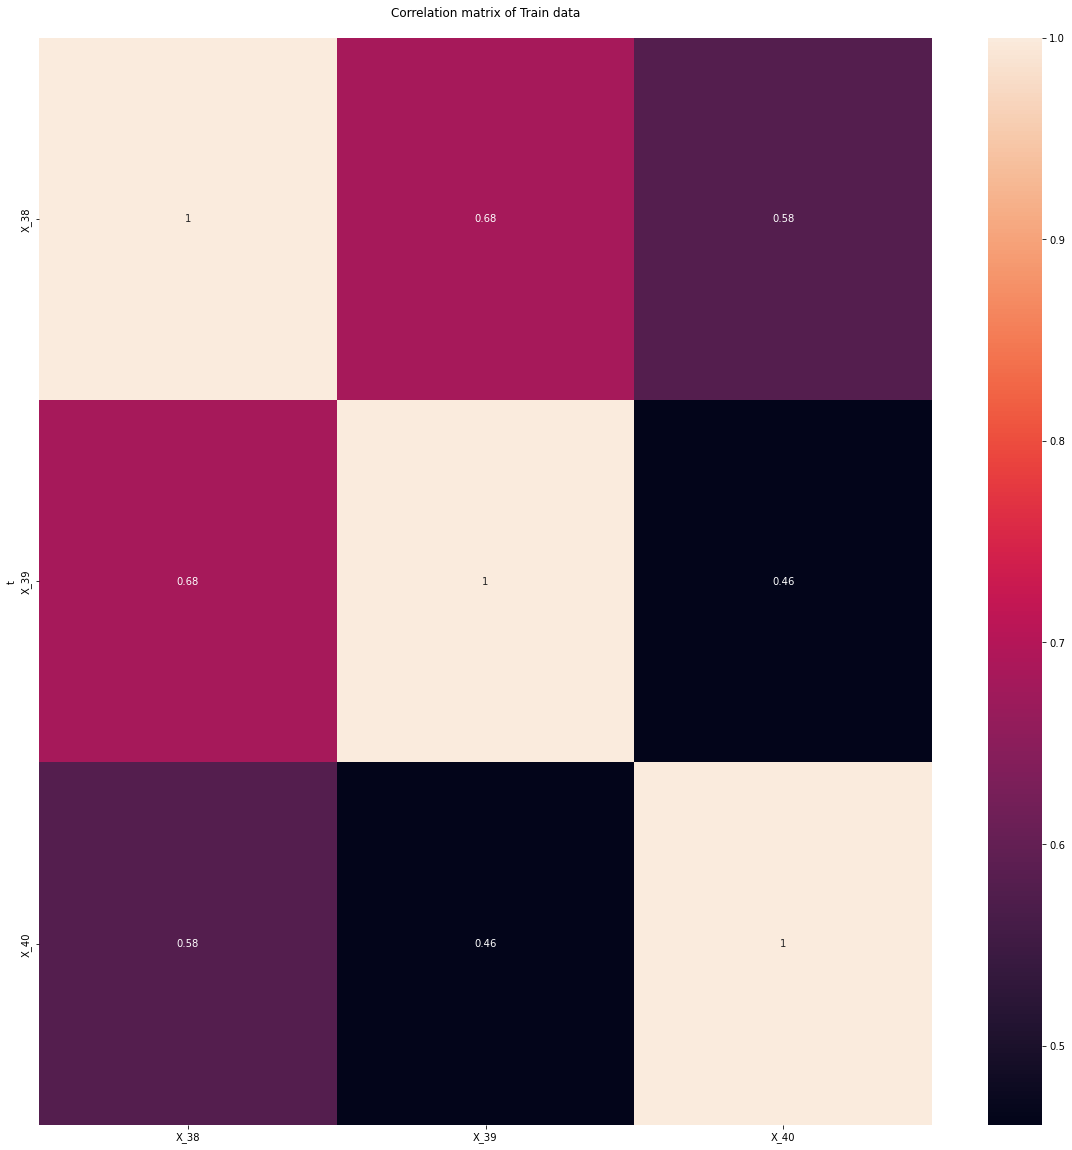

In [17]:
## Correlation Matrix

corr = tmp.corr()

fig, ax = plt.subplots(figsize=(20,20)) 
hm = sns.heatmap(corr, annot = True, ax=ax)
hm.set(xlabel='', ylabel='t', title = "Correlation matrix of Train data\n")
plt.show()

* Group 12

In [18]:
# Group 12 : 레이돔 치수 (안테나 n(~4)번 부위)
tmp = train_x[x_g12.Feature]
tmp.describe()

,X_41,X_42,X_43,X_44
count,39607.000000,39607.000000,39607.000000,39607.000000
mean,21.186992,21.059334,21.203705,21.160107
std,0.031128,0.040288,0.047211,0.042176
min,20.730000,20.790000,20.800000,20.930000
25%,21.170000,21.030000,21.170000,21.130000
50%,21.190000,21.060000,21.200000,21.160000
75%,21.210000,21.090000,21.240000,21.190000
max,21.620000,21.440000,21.410000,21.320000


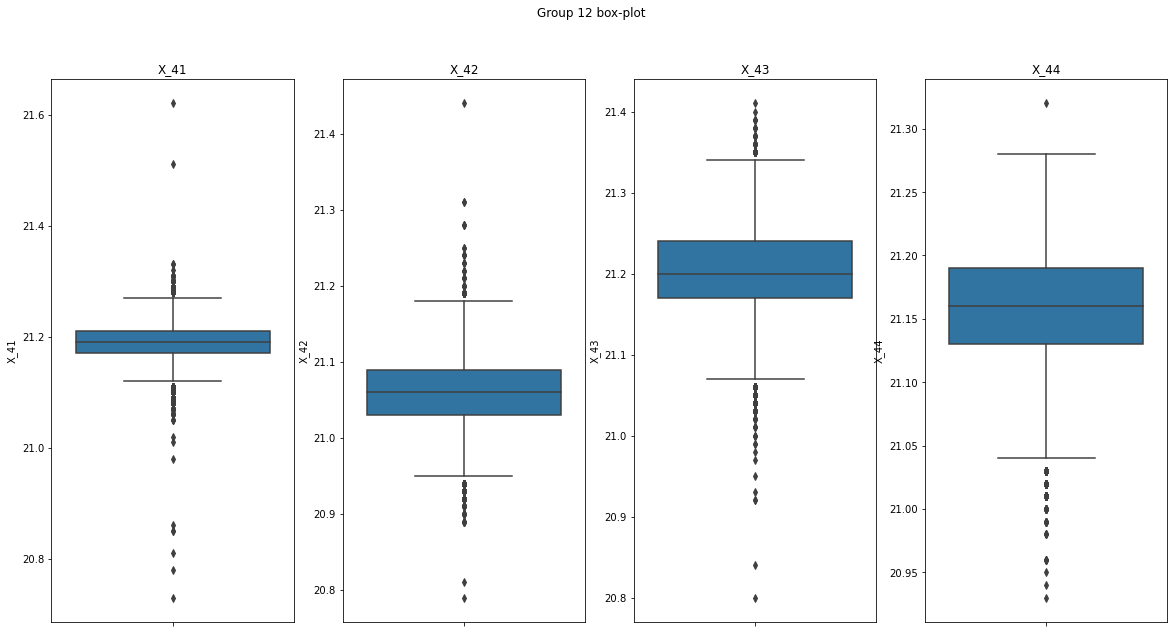

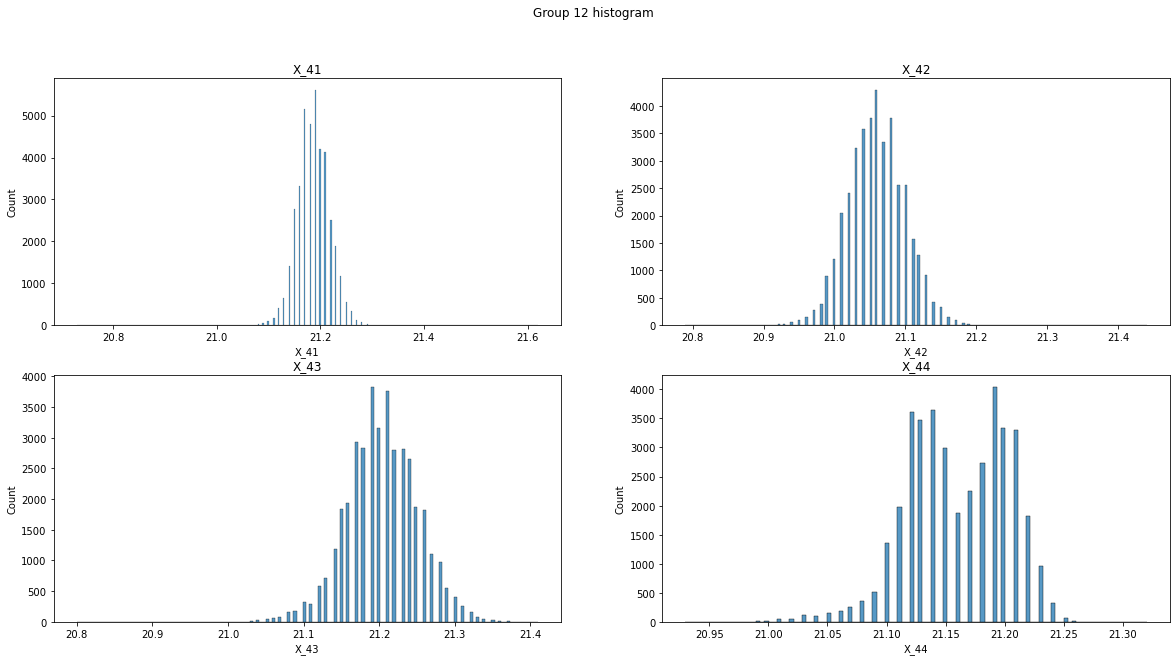

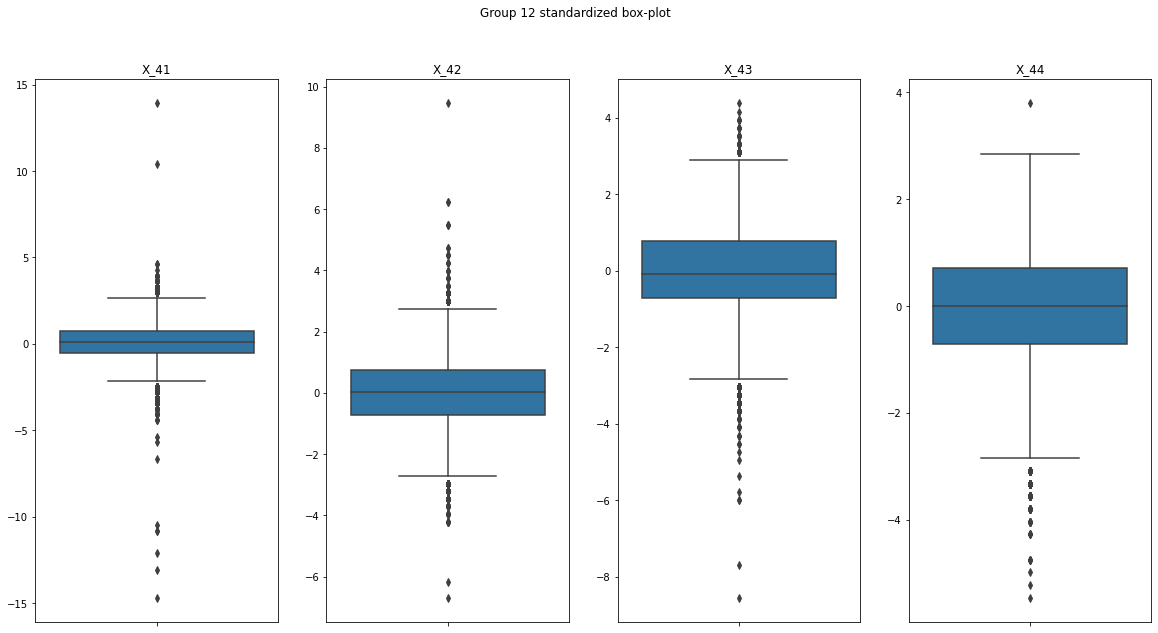

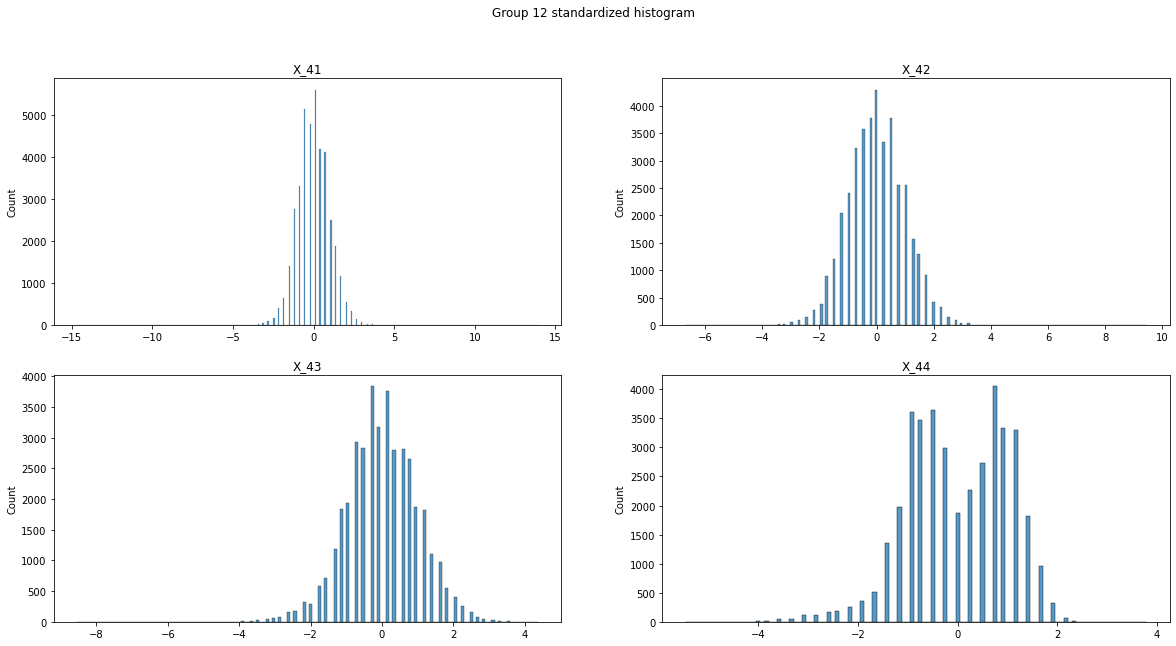

array([[<AxesSubplot:title={'center':'X_41'}, ylabel='Count'>,
        <AxesSubplot:title={'center':'X_42'}, ylabel='Count'>],
       [<AxesSubplot:title={'center':'X_43'}, ylabel='Count'>,
        <AxesSubplot:title={'center':'X_44'}, ylabel='Count'>]],
      dtype=object)

In [19]:
# 
box_plot(group_num=12, 
         data=tmp,
         standardized=False)

hist_plot(group_num=12, 
         data=tmp,
         standardized=False)

# standardize
box_plot(group_num=12, 
         data=tmp,
         standardized=True)

hist_plot(group_num=12, 
         data=tmp,
         standardized=True)

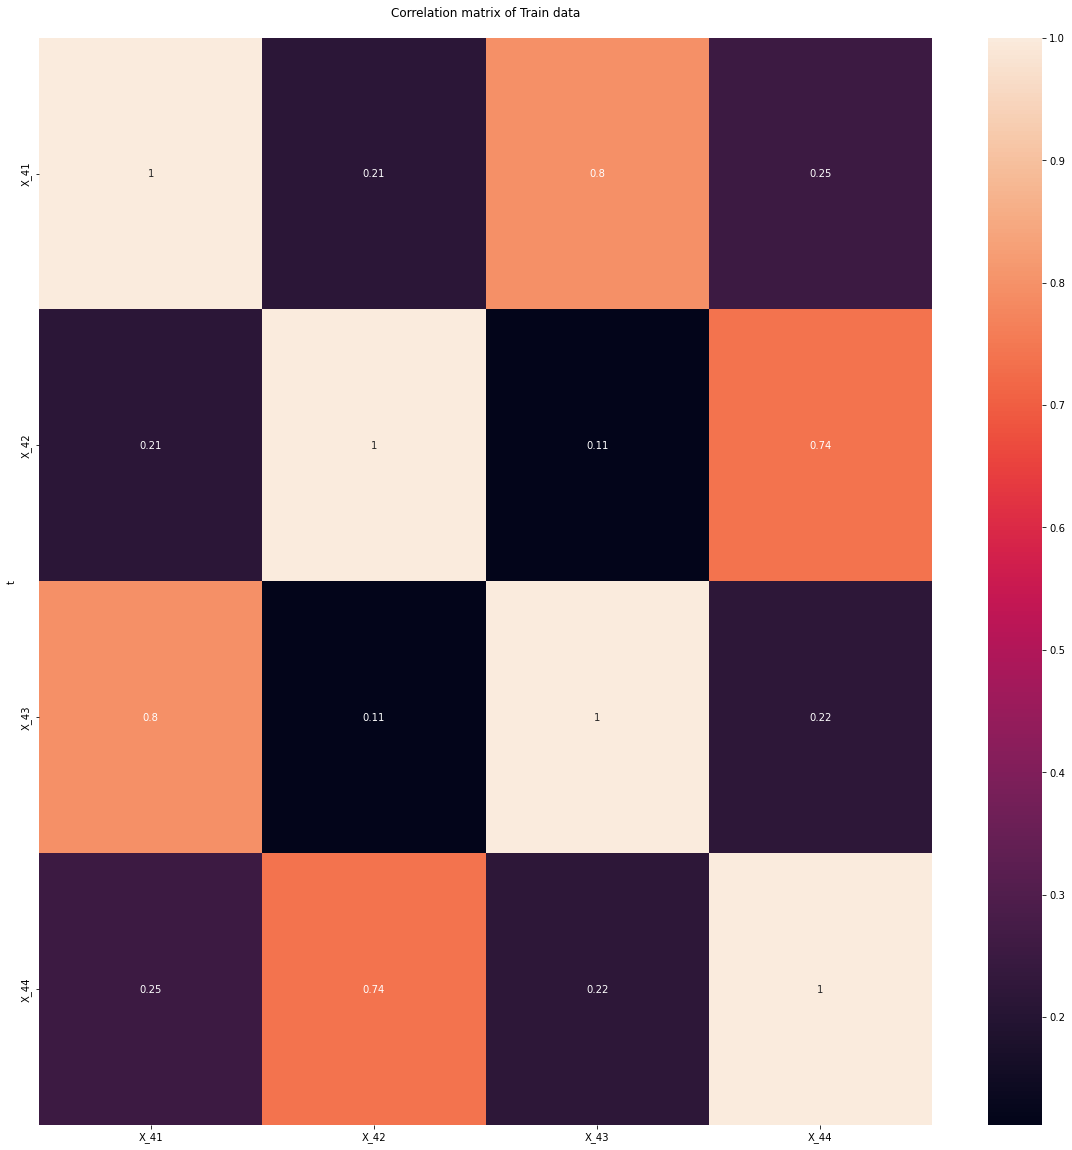

In [20]:
## Correlation Matrix

corr = tmp.corr()

fig, ax = plt.subplots(figsize=(20,20)) 
hm = sns.heatmap(corr, annot = True, ax=ax)
hm.set(xlabel='', ylabel='t', title = "Correlation matrix of Train data\n")
plt.show()

* Group 13

In [123]:
# Group 13 : 안테나 부분 레이돔 기울기
tmp = train_x[x_g13.Feature]
tmp.describe()

,X_45
count,39607.000000
mean,0.154567
std,0.046968
min,0.000000
25%,0.120000
50%,0.150000
75%,0.190000
max,0.420000


<AxesSubplot:title={'center':'X_45'}, xlabel='X_45', ylabel='Count'>

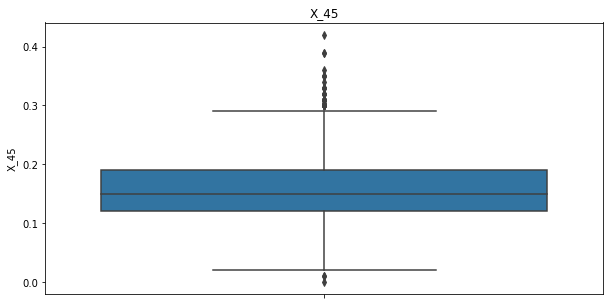

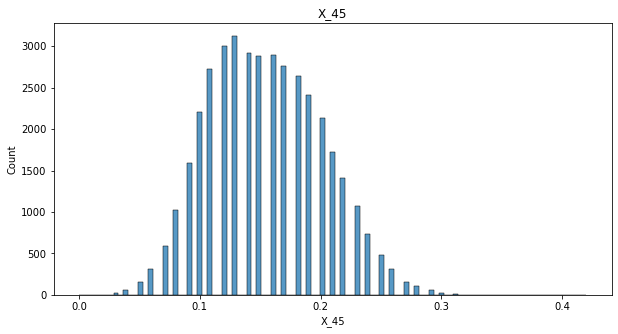

In [124]:
# 
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title(tmp.columns[0])
sns.boxplot(y=tmp.iloc[:, 0], ax = ax)

fig, ax = plt.subplots(figsize=(10,5))
ax.set_title(tmp.columns[0])
sns.histplot(x=tmp.iloc[:, 0], ax = ax)

* Group 14

In [125]:
# Group 14 : 실란트 본드 소요량
tmp = train_x[x_g14.Feature]
tmp.describe()

,X_46
count,39607.000000
mean,1468.275305
std,2.121517
min,1457.000000
25%,1469.000000
50%,1469.000000
75%,1469.000000
max,1469.000000


<AxesSubplot:title={'center':'X_46'}, xlabel='X_46', ylabel='Count'>

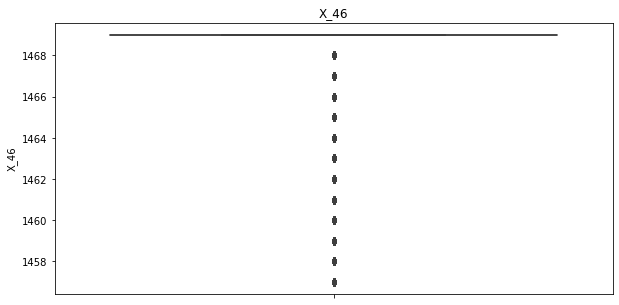

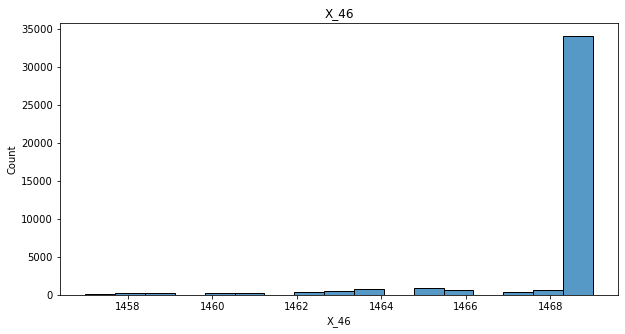

In [126]:
# 
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title(tmp.columns[0])
sns.boxplot(y=tmp.iloc[:, 0], ax = ax)

fig, ax = plt.subplots(figsize=(10,5))
ax.set_title(tmp.columns[0])
sns.histplot(x=tmp.iloc[:, 0], ax = ax)

* Group 15

In [127]:
# Group 15 : Cal 투입 전 대기 시간
tmp = train_x[x_g15.Feature]
tmp.describe()

,X_49
count,39607.000000
mean,16676.913639
std,8584.427420
min,3341.830000
25%,13093.930000
50%,15273.330000
75%,17560.180000
max,114563.630000


<AxesSubplot:title={'center':'X_49'}, xlabel='X_49', ylabel='Count'>

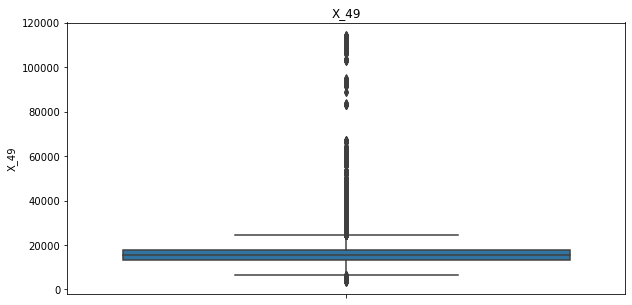

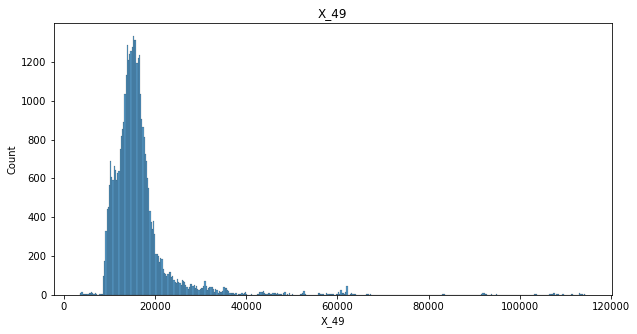

In [128]:
# 
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title(tmp.columns[0])
sns.boxplot(y=tmp.iloc[:, 0], ax = ax)

fig, ax = plt.subplots(figsize=(10,5))
ax.set_title(tmp.columns[0])
sns.histplot(x=tmp.iloc[:, 0], ax = ax)

* Group 16

In [21]:
# Group 16 : RFn(~7) 부분 SMT 납 량
tmp = train_x[x_g16.Feature]
tmp.describe()

,X_50,X_51,X_52,X_53,X_54,X_55,X_56
count,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000
mean,130.774557,131.457418,138.587595,127.992420,128.014110,137.884711,128.441119
std,5.989845,5.934313,6.469813,5.713153,5.433958,6.552101,5.444245
min,21.800000,21.910000,23.100000,21.330000,21.340000,22.980000,21.410000
25%,126.948571,127.669758,134.475401,124.374525,124.697879,133.744103,125.134713
50%,130.723378,131.352856,138.525575,128.020010,128.098728,137.900952,128.414501
75%,134.538998,135.170761,142.702448,131.618662,131.487423,142.073102,131.839764
max,162.619458,194.513195,173.438623,152.406630,175.052891,170.155980,155.277538


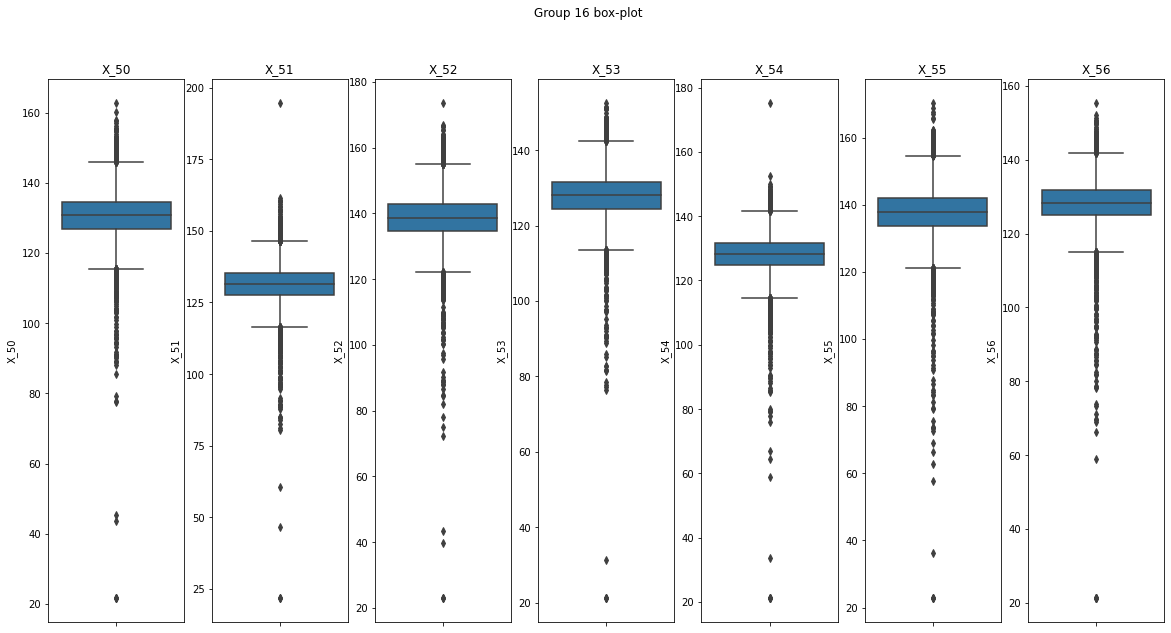

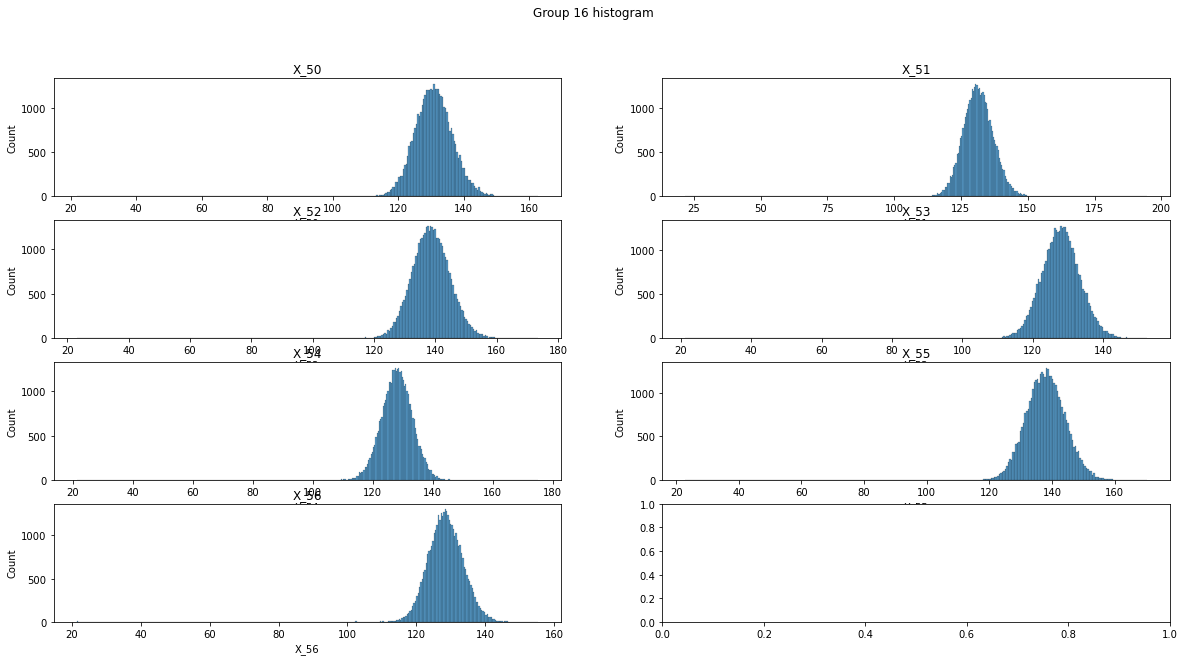

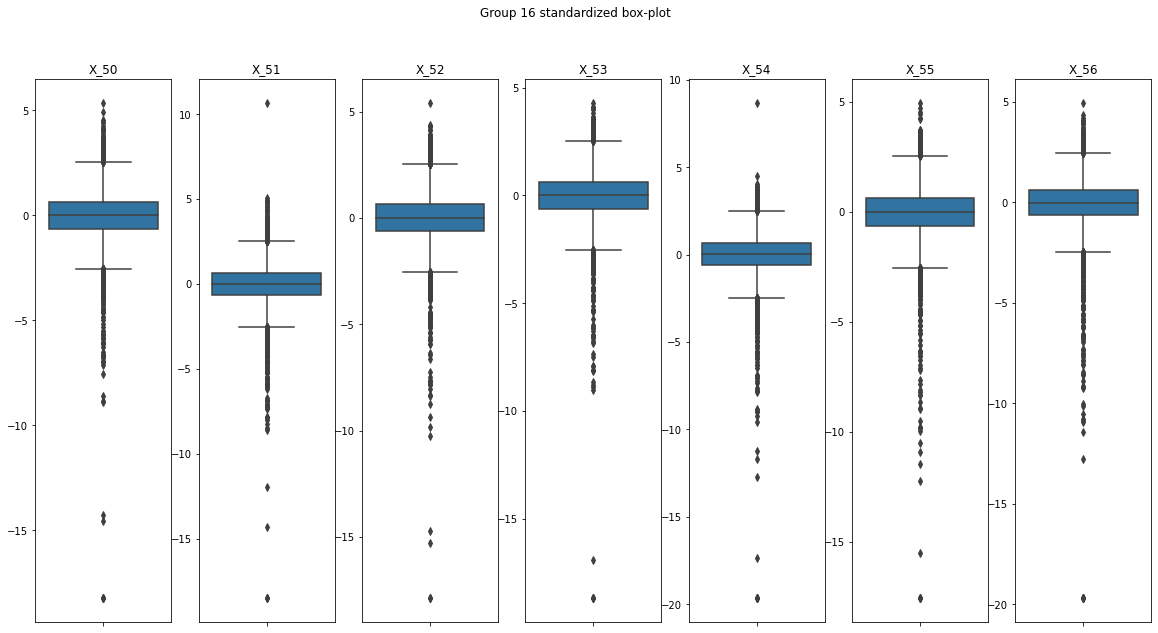

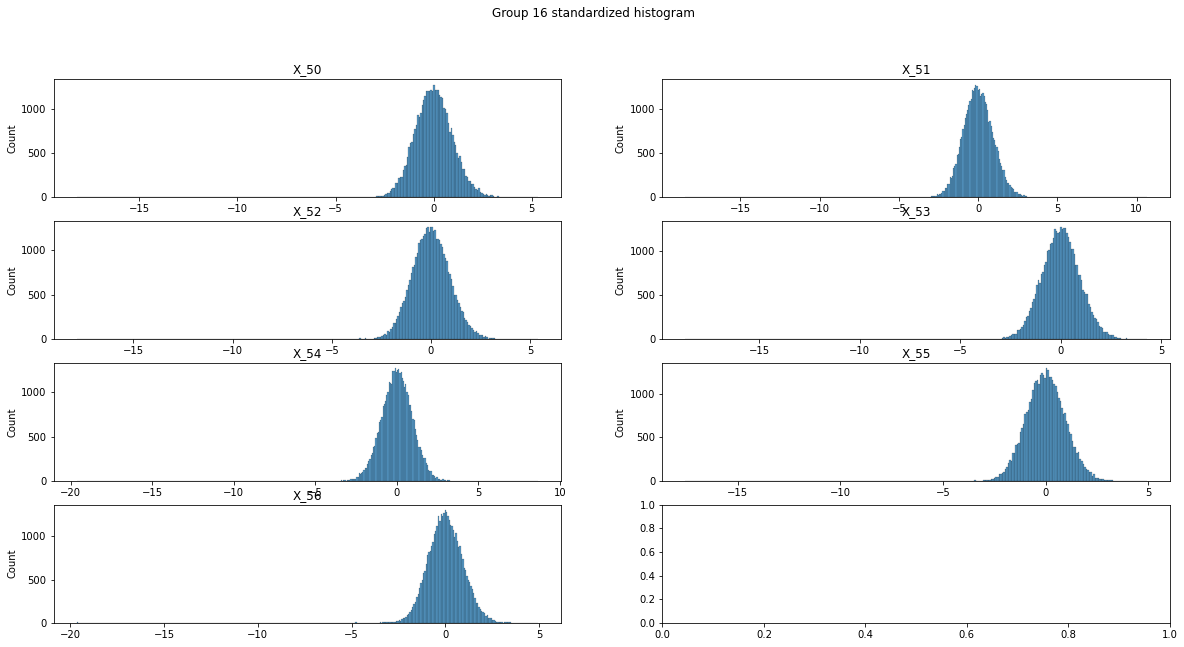

array([[<AxesSubplot:title={'center':'X_50'}, ylabel='Count'>,
        <AxesSubplot:title={'center':'X_51'}, ylabel='Count'>],
       [<AxesSubplot:title={'center':'X_52'}, ylabel='Count'>,
        <AxesSubplot:title={'center':'X_53'}, ylabel='Count'>],
       [<AxesSubplot:title={'center':'X_54'}, ylabel='Count'>,
        <AxesSubplot:title={'center':'X_55'}, ylabel='Count'>],
       [<AxesSubplot:title={'center':'X_56'}, ylabel='Count'>,
        <AxesSubplot:>]], dtype=object)

In [130]:
# 
box_plot(group_num=16, 
         data=tmp,
         standardized=False)

hist_plot(group_num=16, 
         data=tmp,
         standardized=False)

# standardize
box_plot(group_num=16, 
         data=tmp,
         standardized=True)

hist_plot(group_num=16, 
         data=tmp,
         standardized=True)

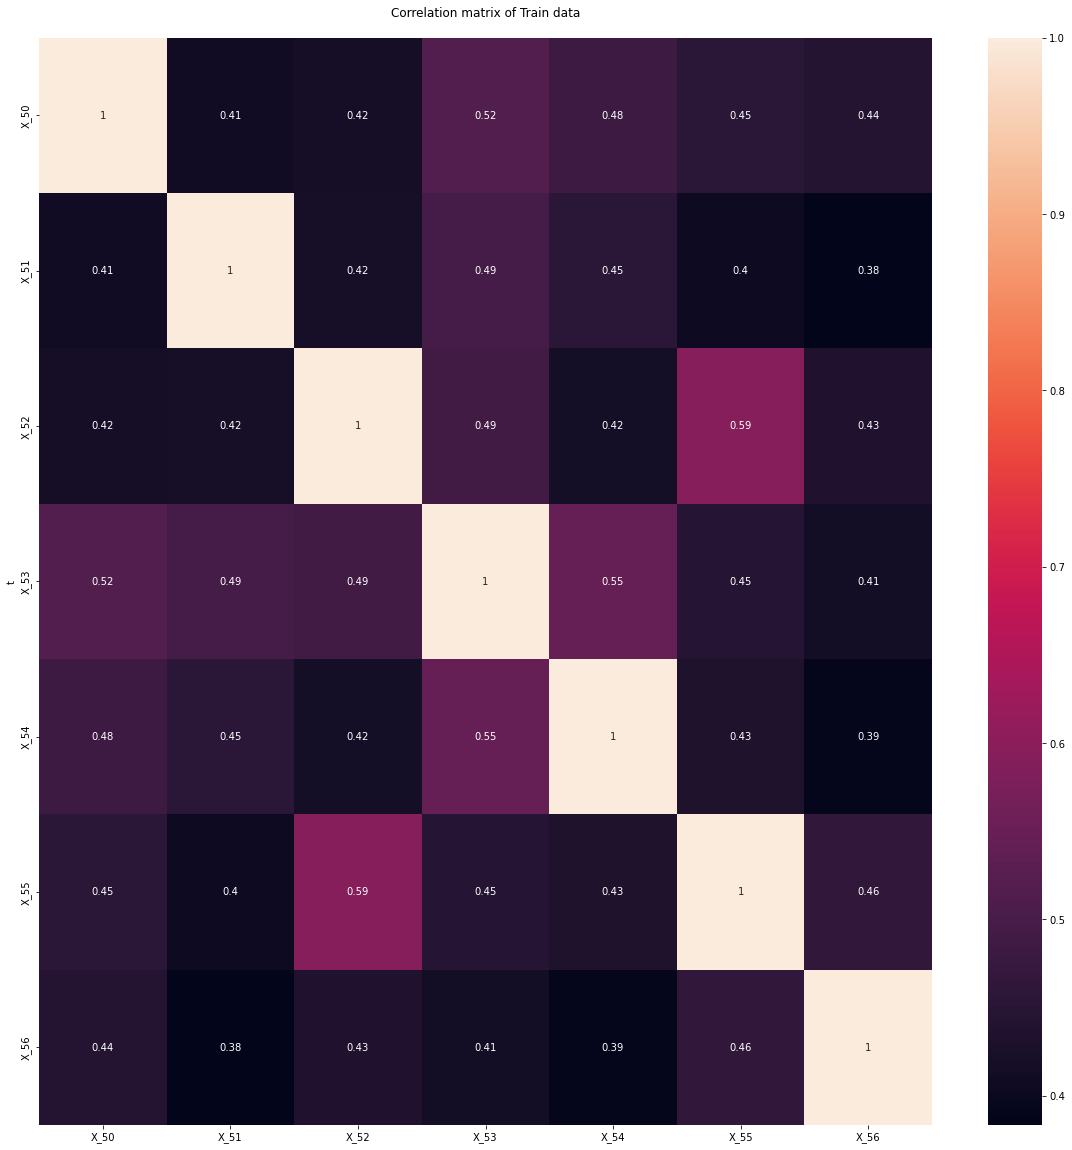

In [22]:
## Correlation Matrix

corr = tmp.corr()

fig, ax = plt.subplots(figsize=(20,20)) 
hm = sns.heatmap(corr, annot = True, ax=ax)
hm.set(xlabel='', ylabel='t', title = "Correlation matrix of Train data\n")
plt.show()

In [224]:
[x_g0.Feature.values, x_g1.Feature.values, x_g2.Feature.values ]

[array(['X_01', 'X_02', 'X_05', 'X_06'], dtype=object),
 array(['X_03', 'X_10', 'X_11'], dtype=object),
 array(['X_07', 'X_08', 'X_09'], dtype=object)]

### Y feature groups

* Group 0

In [23]:
# Group 0 : 안테나 Gain 평균 (각도n(~4))
tmp = train_y[y_g0.Feature]
tmp.describe()

,Y_01,Y_05,Y_07,Y_11
count,39607.000000,39607.000000,39607.000000,39607.000000
mean,1.353814,31.290467,3.155054,24.325061
std,0.356223,2.543222,0.418940,0.830197
min,0.017000,18.589000,0.502000,19.844000
25%,1.127500,29.768000,2.863000,23.836000
50%,1.349000,31.710000,3.126000,24.420000
75%,1.576000,33.184000,3.433500,24.911500
max,4.409000,37.250000,5.299000,26.703000


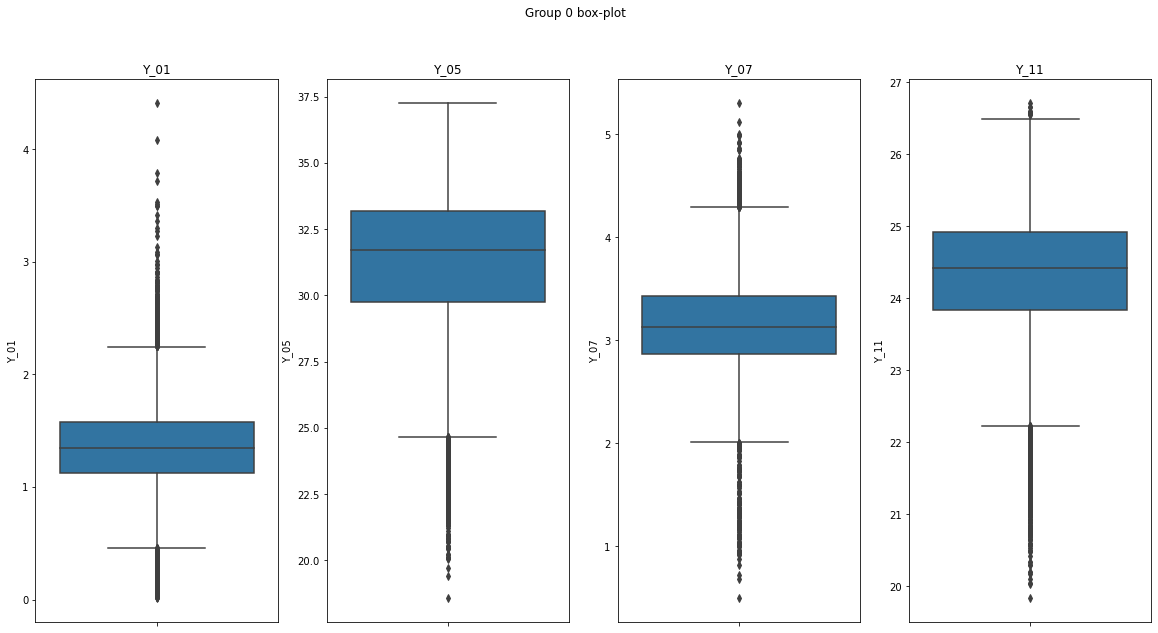

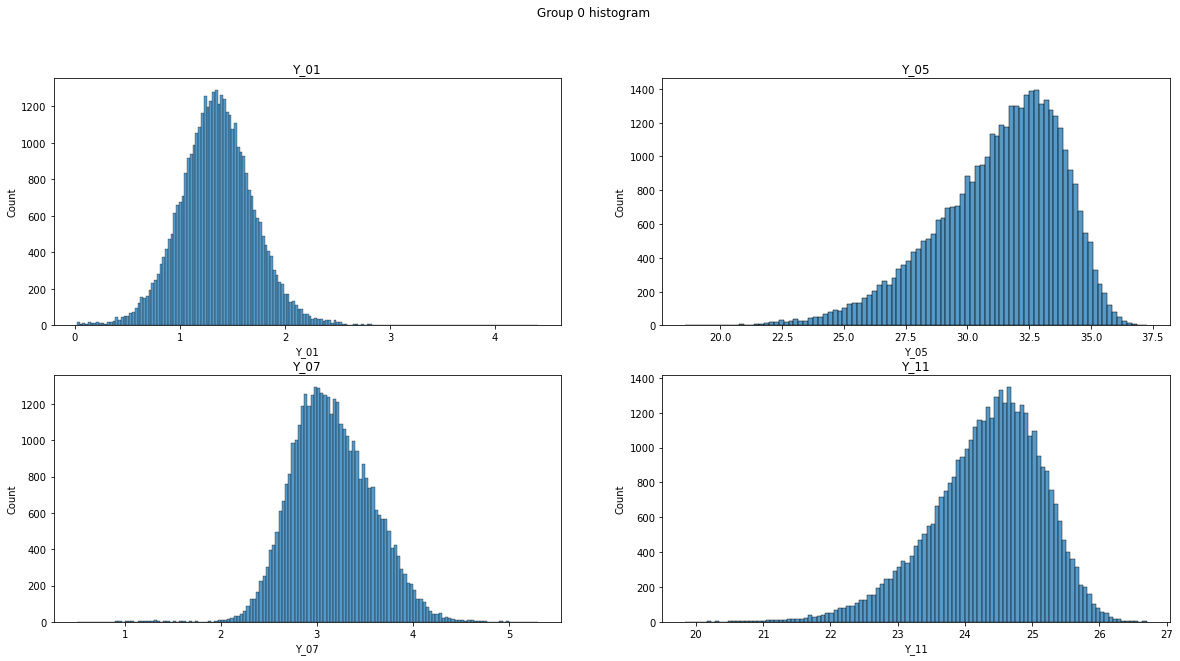

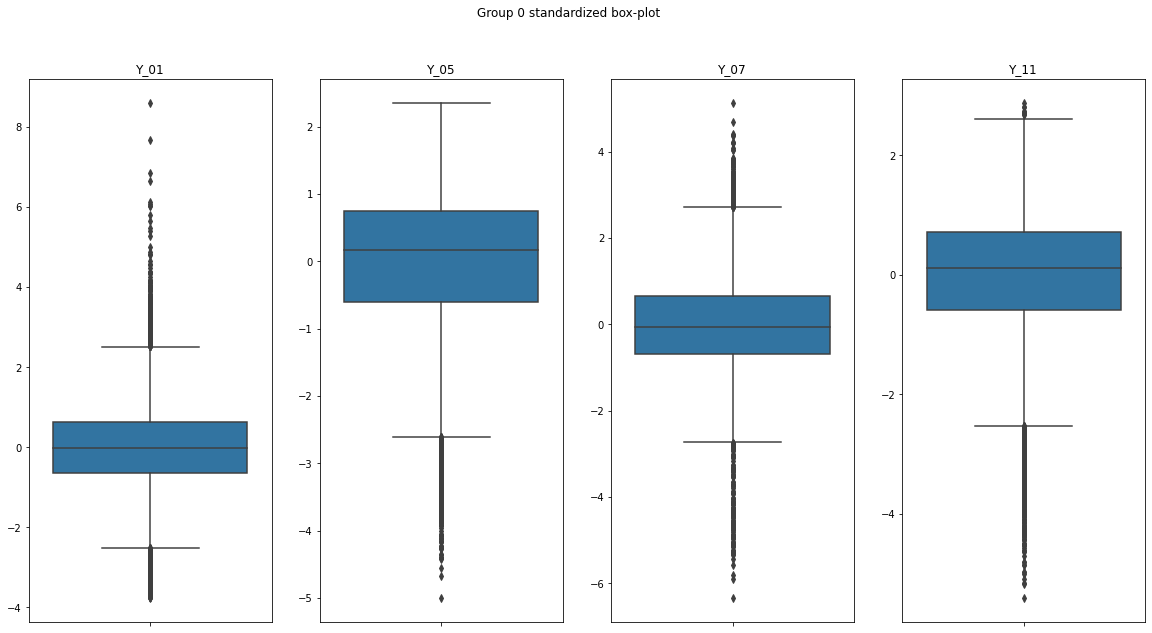

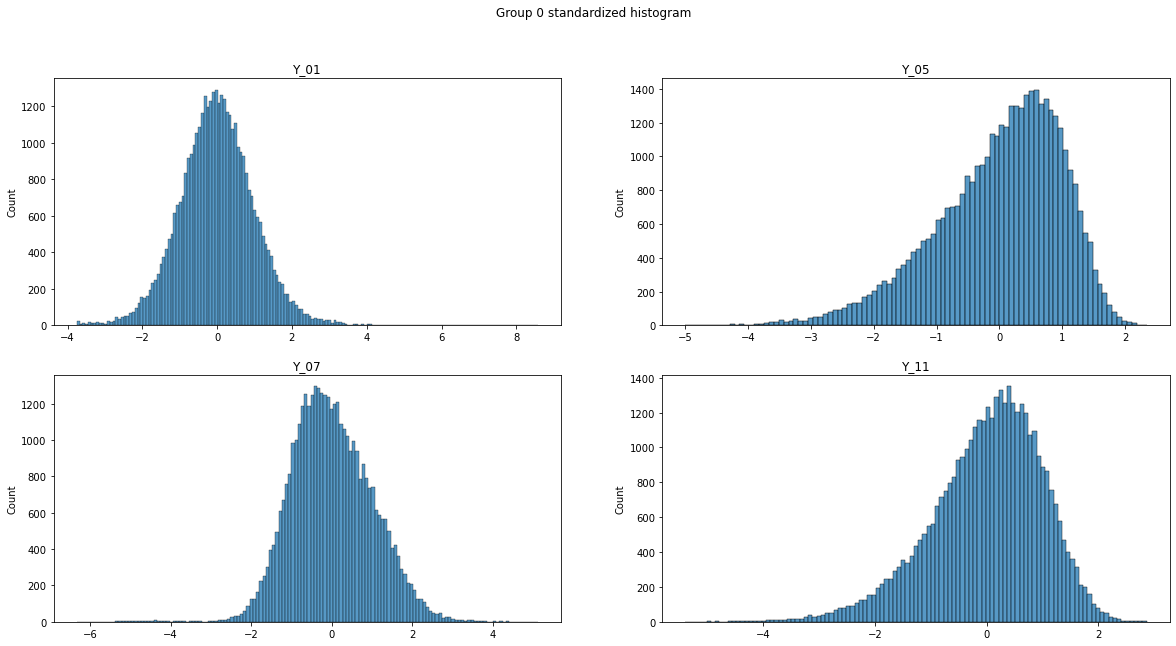

array([[<AxesSubplot:title={'center':'Y_01'}, ylabel='Count'>,
        <AxesSubplot:title={'center':'Y_05'}, ylabel='Count'>],
       [<AxesSubplot:title={'center':'Y_07'}, ylabel='Count'>,
        <AxesSubplot:title={'center':'Y_11'}, ylabel='Count'>]],
      dtype=object)

In [24]:
# 
box_plot(group_num=0, 
         data=tmp,
         standardized=False)

hist_plot(group_num=0, 
         data=tmp,
         standardized=False)

# standardize
box_plot(group_num=0, 
         data=tmp,
         standardized=True)

hist_plot(group_num=0, 
         data=tmp,
         standardized=True)

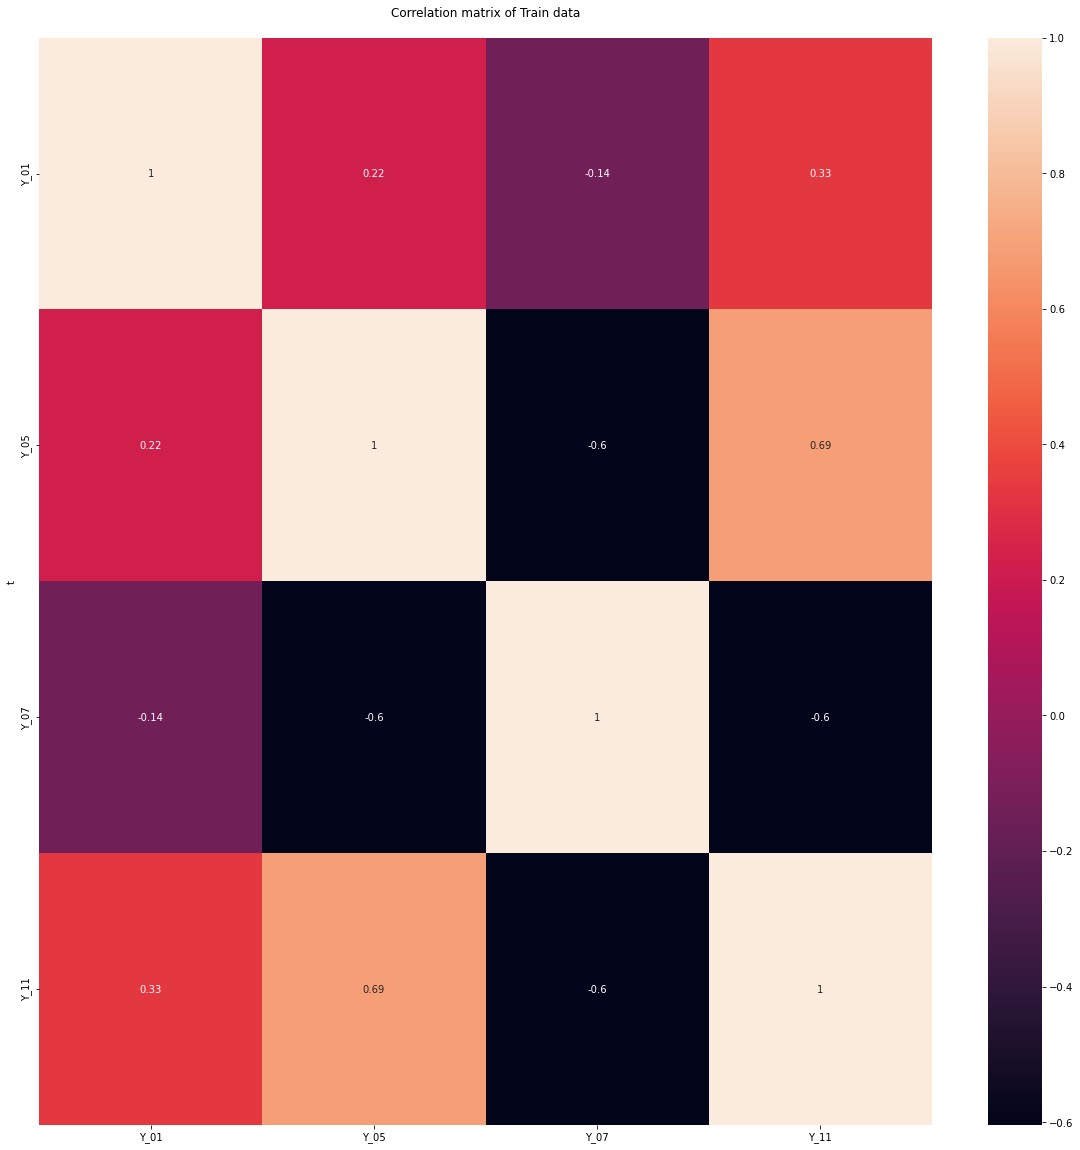

In [25]:
## Correlation Matrix

corr = tmp.corr()

fig, ax = plt.subplots(figsize=(20,20)) 
hm = sns.heatmap(corr, annot = True, ax=ax)
hm.set(xlabel='', ylabel='t', title = "Correlation matrix of Train data\n")
plt.show()

* Group 1

In [26]:
# Group 1 : 안테나 n(~2) Gain 편차
tmp = train_y[y_g1.Feature]
tmp.describe()

,Y_02,Y_03
count,39607.000000,39607.000000
mean,1.057267,1.014002
std,0.386266,0.361492
min,0.007000,0.017000
25%,0.793000,0.769000
50%,1.044000,0.998000
75%,1.300000,1.239000
max,3.998000,3.756000


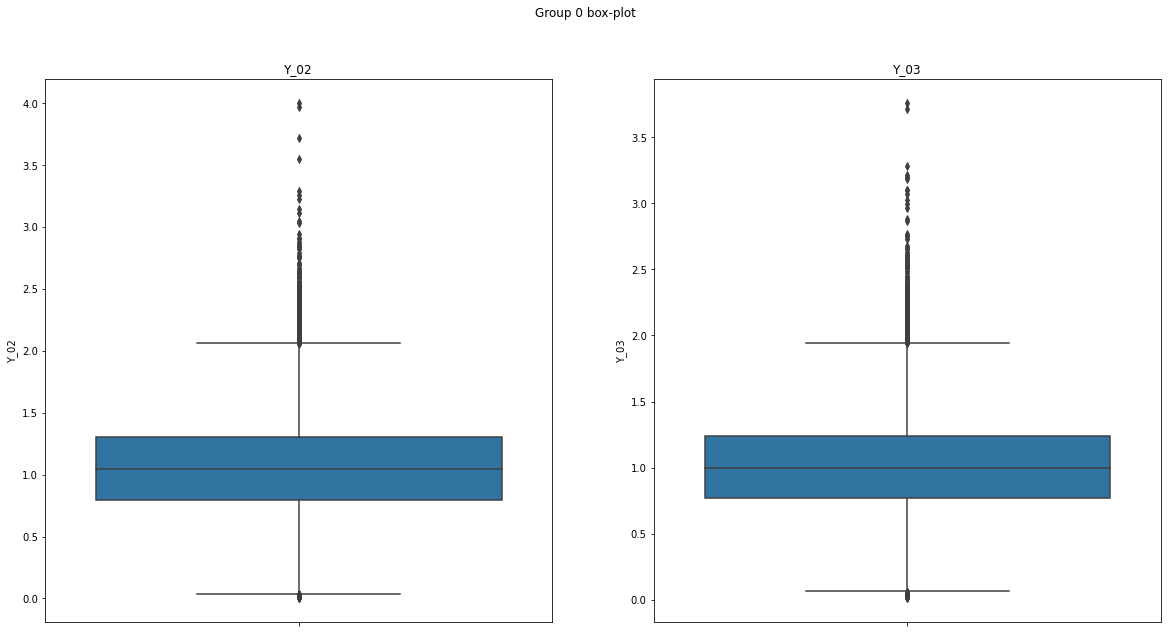

<AxesSubplot:title={'center':'Y_03'}, xlabel='Y_03', ylabel='Count'>

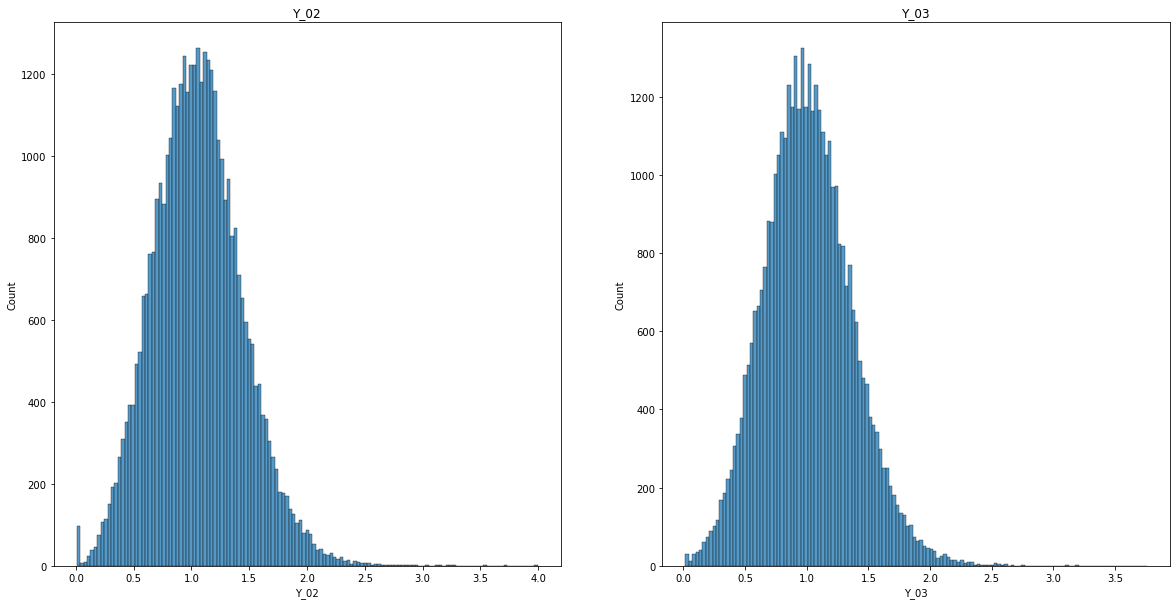

In [27]:
# 
box_plot(group_num=0, 
         data=tmp,
         standardized=False)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
axes[0].set_title(tmp.columns[0])
sns.histplot(tmp.iloc[:, 0], ax = axes[0])
axes[1].set_title(tmp.columns[1])
sns.histplot(tmp.iloc[:, 1], ax = axes[1])

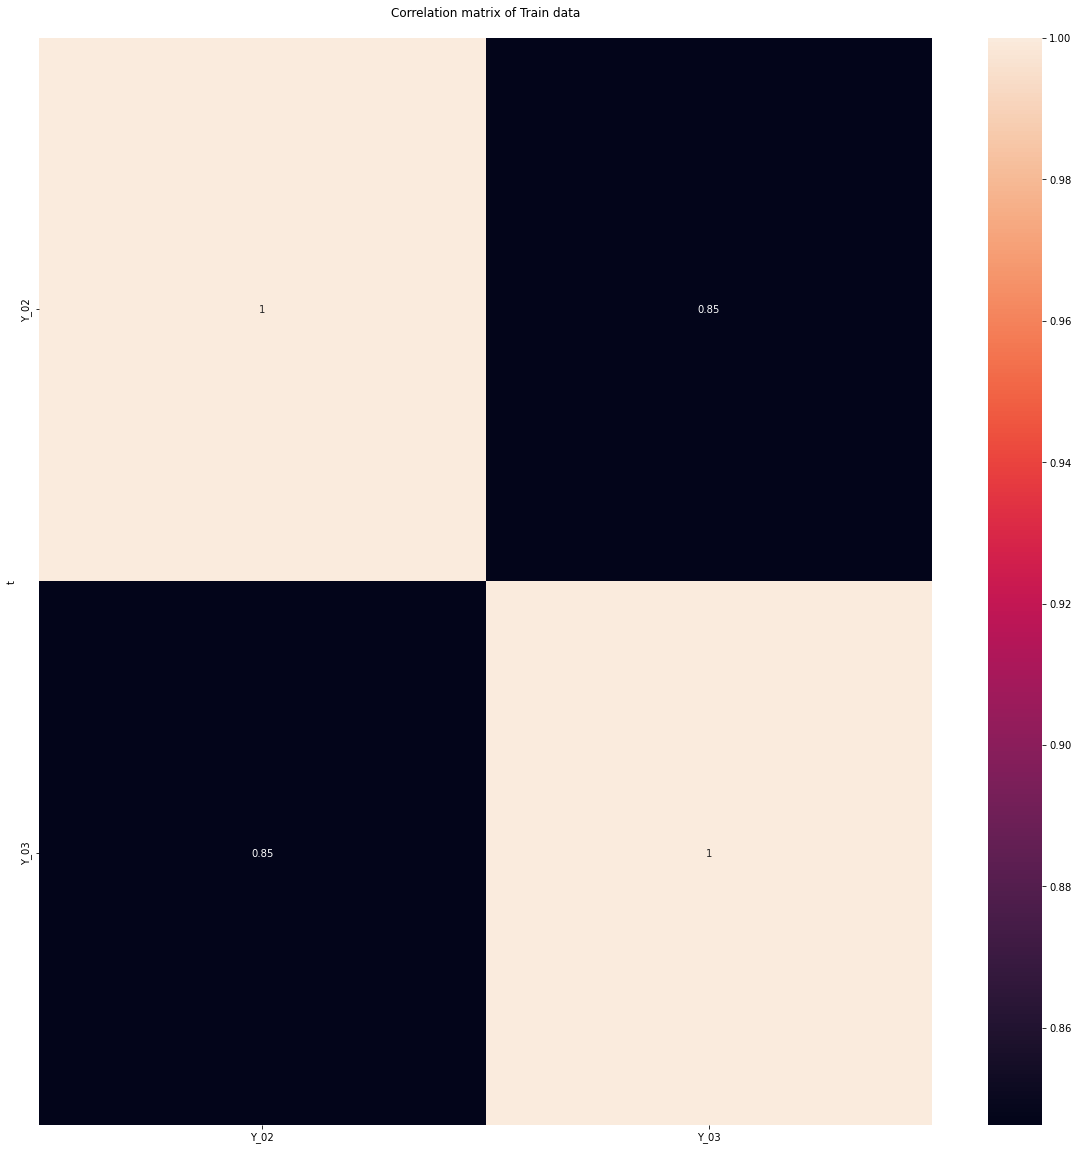

In [28]:
## Correlation Matrix

corr = tmp.corr()

fig, ax = plt.subplots(figsize=(20,20)) 
hm = sns.heatmap(corr, annot = True, ax=ax)
hm.set(xlabel='', ylabel='t', title = "Correlation matrix of Train data\n")
plt.show()

* Group 2

In [29]:
# Group 2 : 평균 신호대 잡음비
tmp = train_y[y_g2.Feature]
tmp.describe()

,Y_04
count,39607.000000
mean,13.621191
std,2.686632
min,-0.331000
25%,11.822000
50%,13.837000
75%,15.626000
max,98.794000


<AxesSubplot:title={'center':'Y_04'}, xlabel='Y_04', ylabel='Count'>

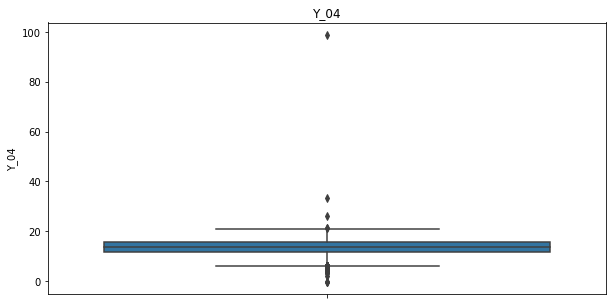

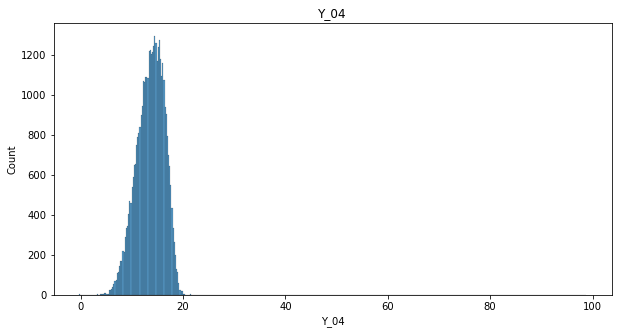

In [30]:
# 
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title(tmp.columns[0])
sns.boxplot(y=tmp.iloc[:, 0], ax = ax)

fig, ax = plt.subplots(figsize=(10,5))
ax.set_title(tmp.columns[0])
sns.histplot(x=tmp.iloc[:, 0], ax = ax)

* Group 3

In [31]:
# Group 3 : 신호대 잡음비 (각도n(~7))
tmp = train_y[y_g3.Feature]
tmp.describe()

,Y_06,Y_08,Y_09,Y_10,Y_12,Y_13,Y_14
count,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000
mean,16.529382,-26.294839,-26.308623,-22.400062,-26.237762,-26.233869,-26.245868
std,1.893014,0.660537,0.653580,0.920952,0.656329,0.655090,0.655989
min,-19.963000,-29.652000,-29.523000,-31.119000,-29.544000,-29.448000,-29.620000
25%,16.146000,-26.689000,-26.702000,-22.871000,-26.630000,-26.624000,-26.640000
50%,16.694000,-26.254000,-26.266000,-22.275000,-26.198000,-26.193000,-26.204000
75%,17.164000,-25.855000,-25.871000,-21.791000,-25.799000,-25.794000,-25.809000
max,18.998000,-23.785000,-23.960000,-20.052000,-23.722000,-23.899000,-23.856000


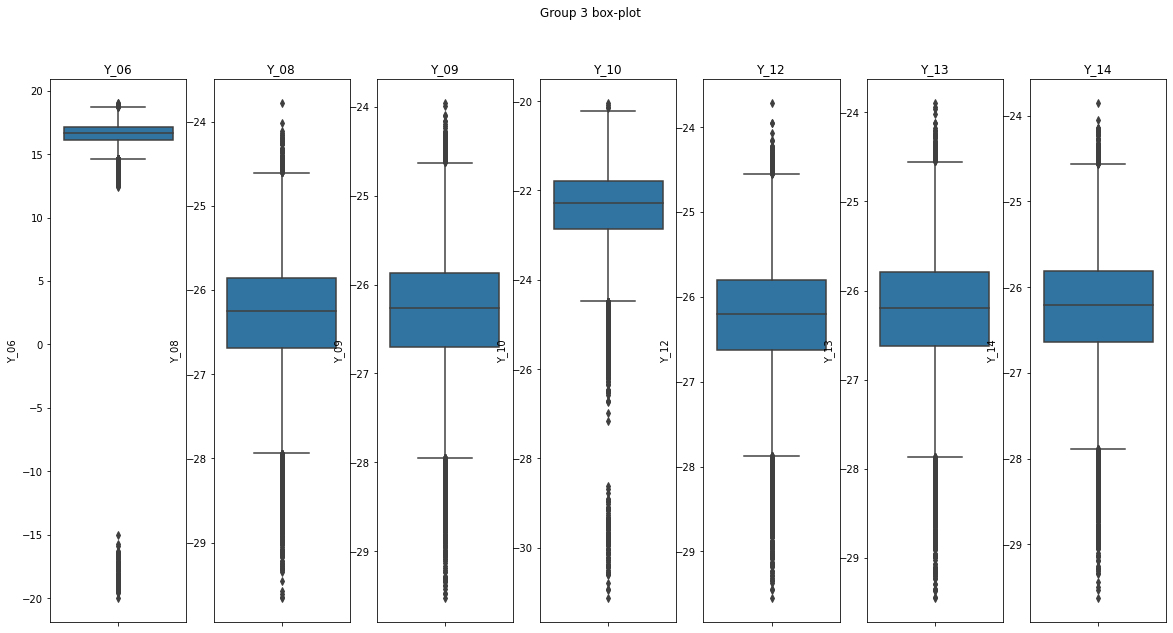

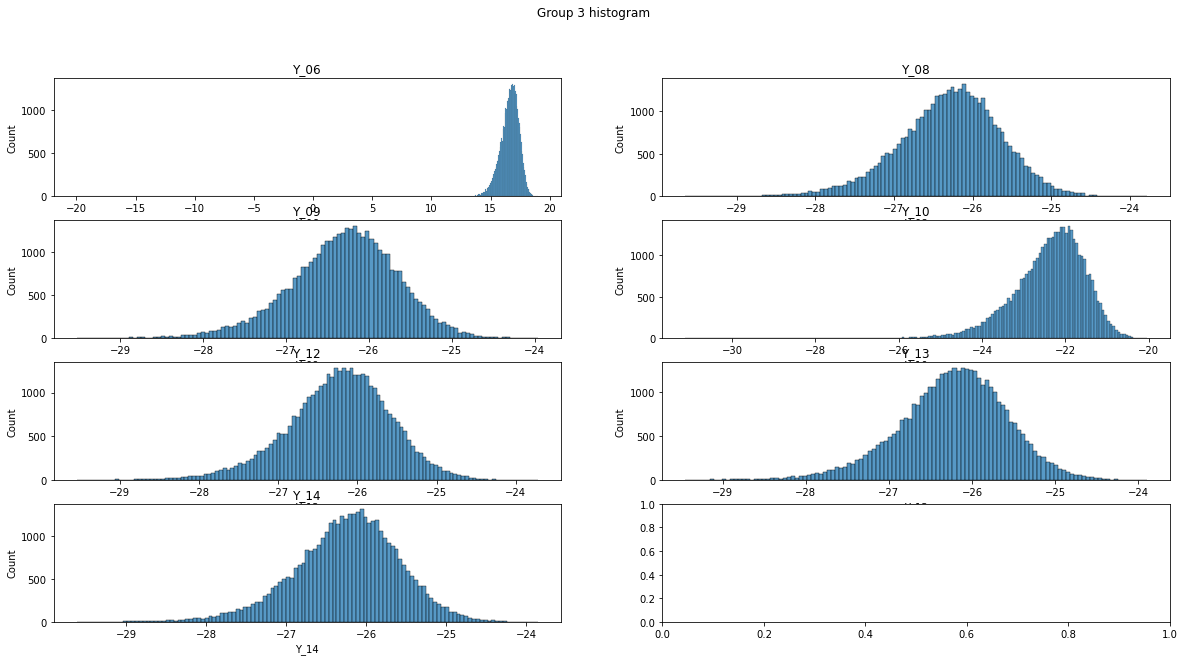

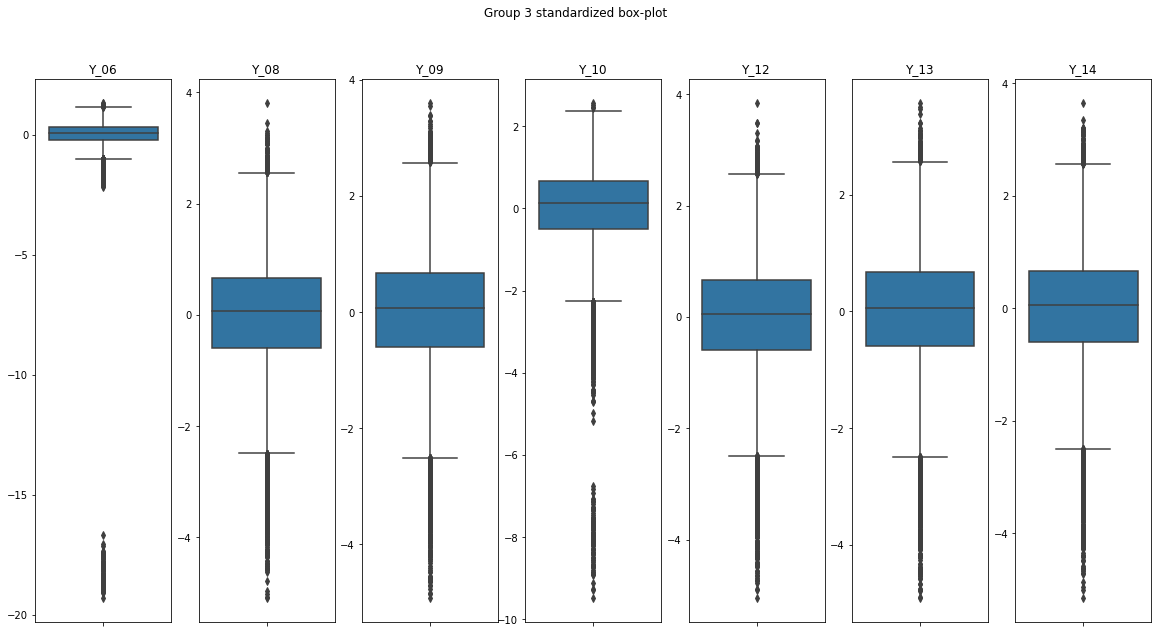

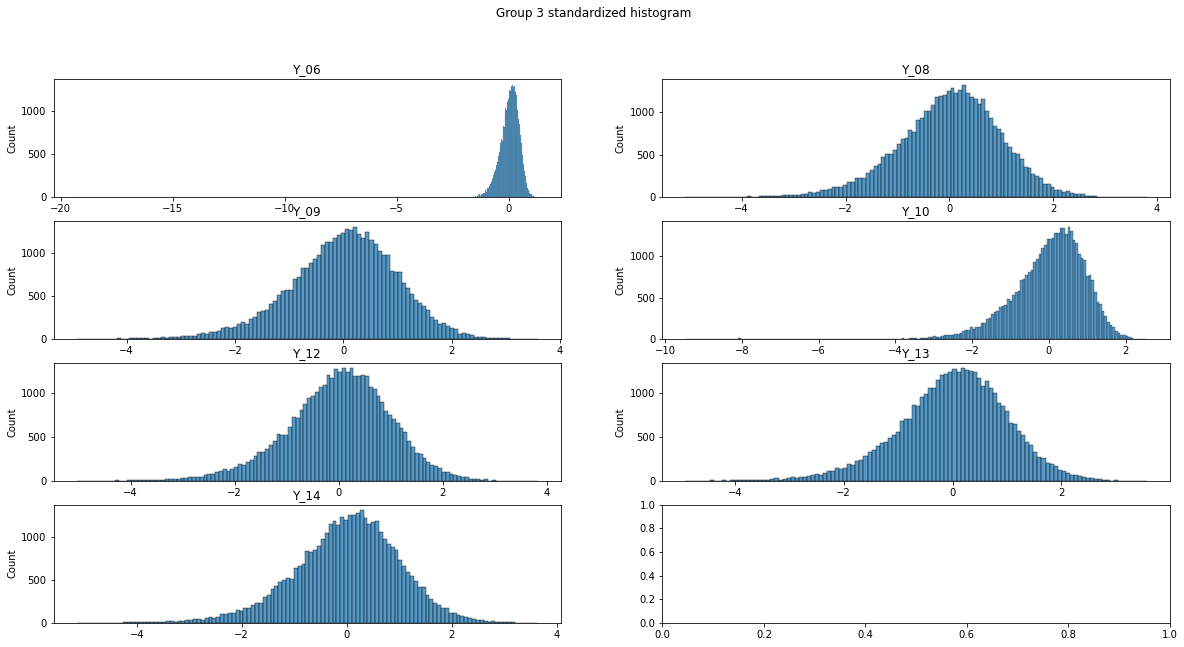

array([[<AxesSubplot:title={'center':'Y_06'}, ylabel='Count'>,
        <AxesSubplot:title={'center':'Y_08'}, ylabel='Count'>],
       [<AxesSubplot:title={'center':'Y_09'}, ylabel='Count'>,
        <AxesSubplot:title={'center':'Y_10'}, ylabel='Count'>],
       [<AxesSubplot:title={'center':'Y_12'}, ylabel='Count'>,
        <AxesSubplot:title={'center':'Y_13'}, ylabel='Count'>],
       [<AxesSubplot:title={'center':'Y_14'}, ylabel='Count'>,
        <AxesSubplot:>]], dtype=object)

In [168]:
# 
box_plot(group_num=3, 
         data=tmp,
         standardized=False)

hist_plot(group_num=3, 
         data=tmp,
         standardized=False)

# standardize
box_plot(group_num=3, 
         data=tmp,
         standardized=True)

hist_plot(group_num=3, 
         data=tmp,
         standardized=True)

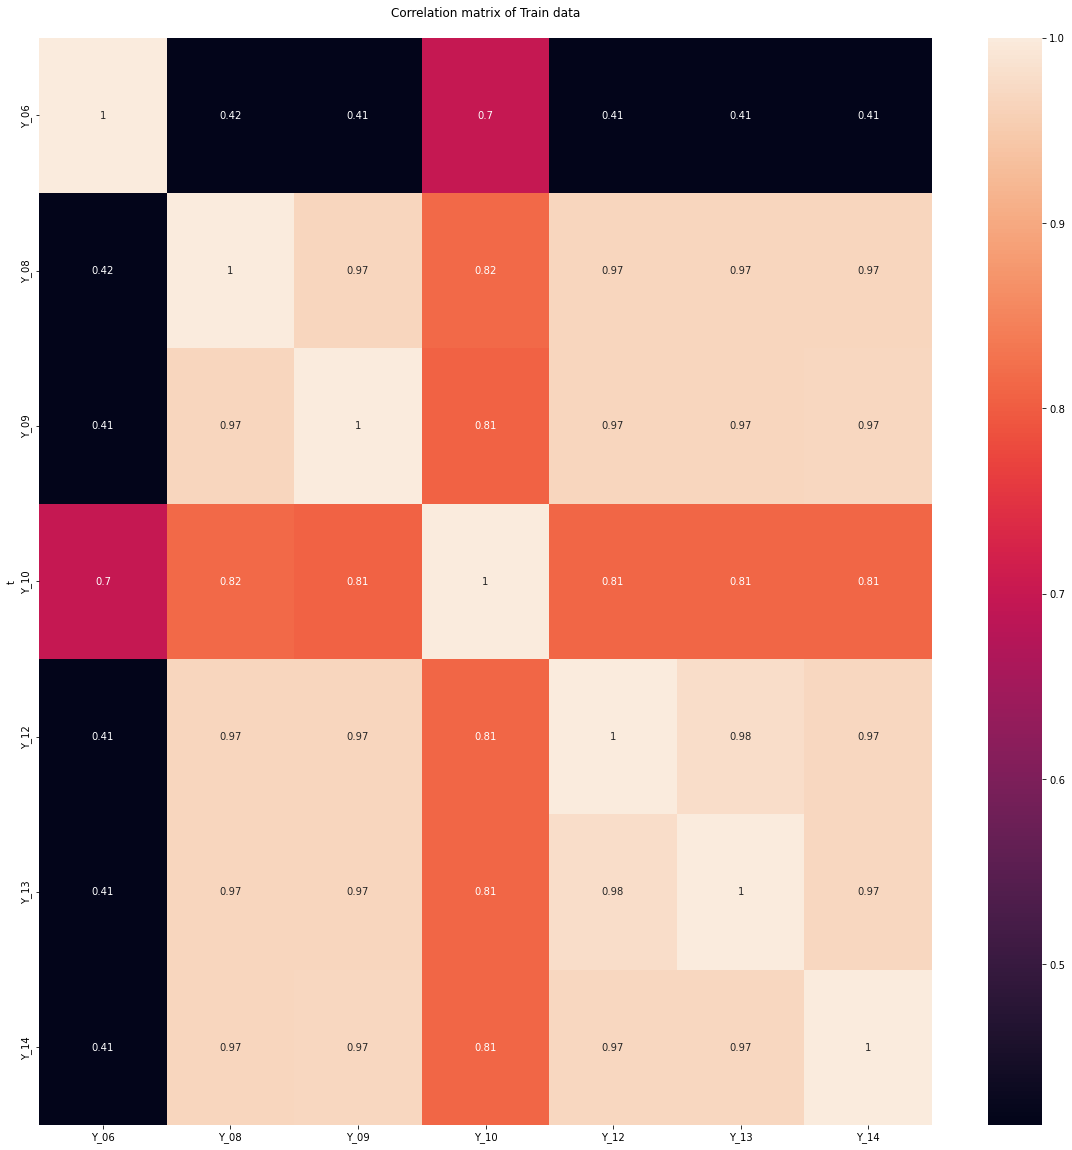

In [32]:
## Correlation Matrix

corr = tmp.corr()

fig, ax = plt.subplots(figsize=(20,20)) 
hm = sns.heatmap(corr, annot = True, ax=ax)
hm.set(xlabel='', ylabel='t', title = "Correlation matrix of Train data\n")
plt.show()

# Statistic Analysis

In [13]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

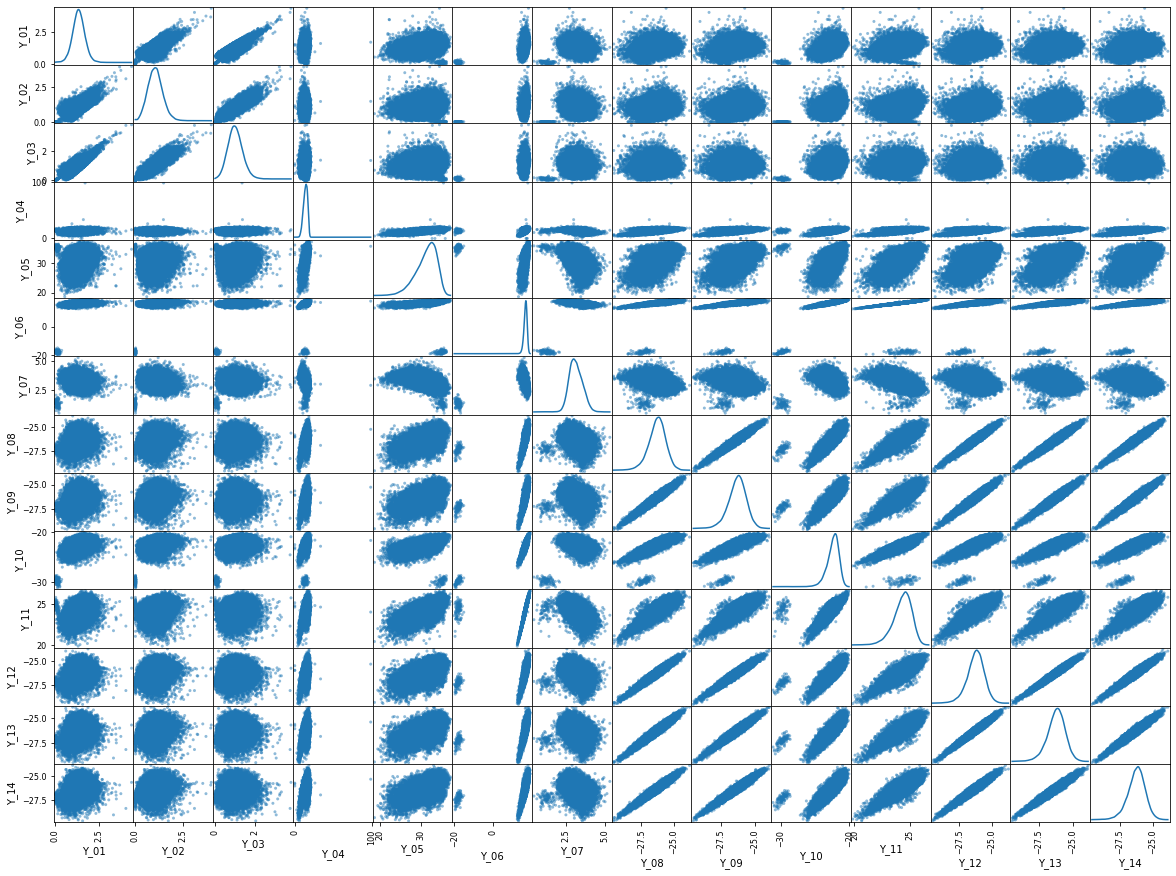

In [14]:
pd.plotting.scatter_matrix(train_y.loc[:, :], diagonal="kde",figsize=(20,15))
plt.show()

In [ ]:

# 정상/불량 클래스로 그룹핑해서 시각화
for i in range(2,14):
    sns.lmplot("V"+str(i), "V"+str(i+1), data, hue="V1", fit_reg=False);

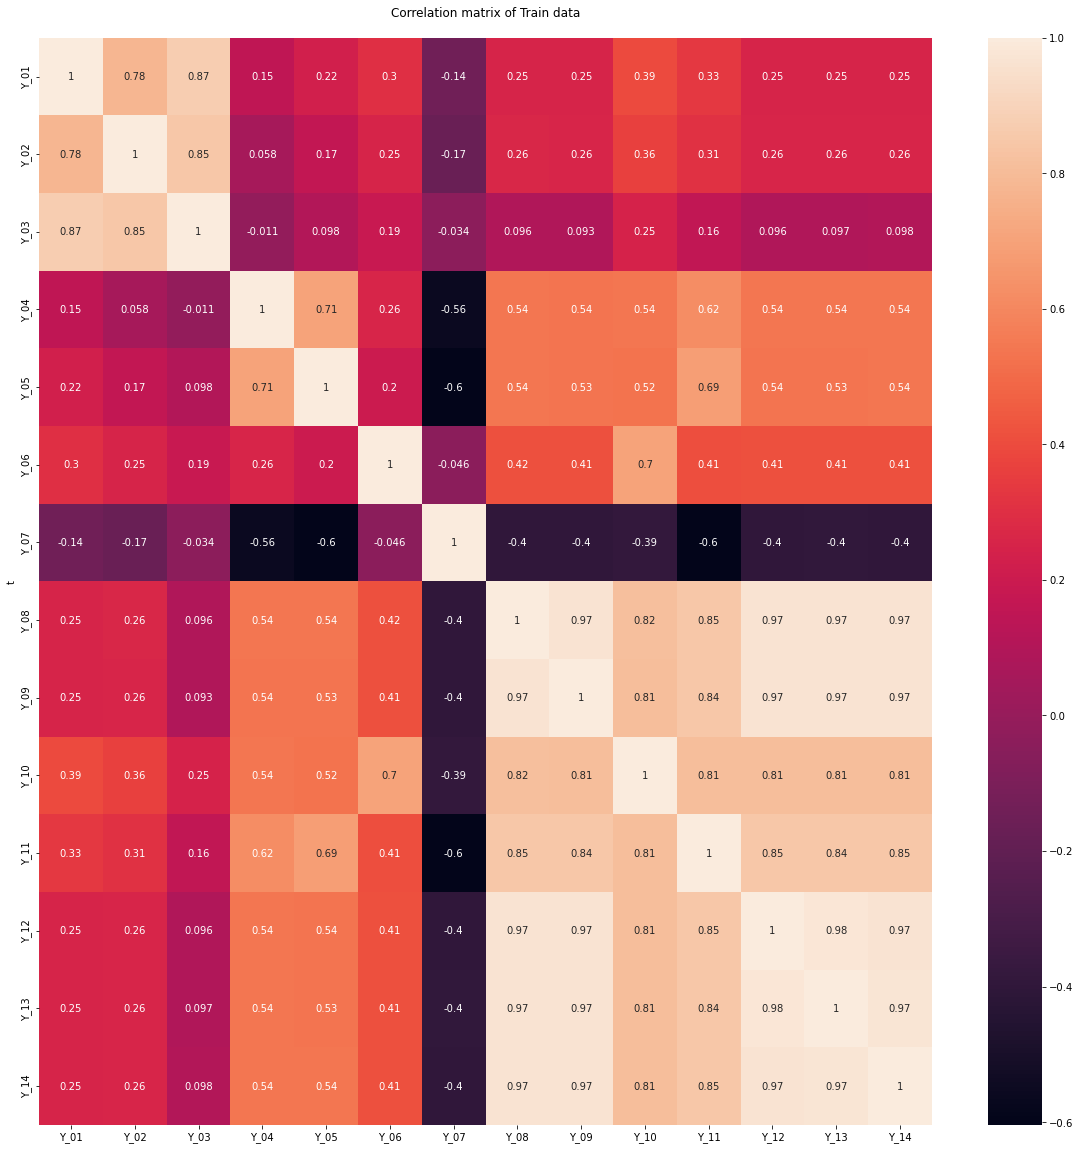

In [215]:
## Correlation Matrix

corr = train_y.corr()

fig, ax = plt.subplots(figsize=(20,20)) 
hm = sns.heatmap(corr, annot = True, ax=ax)
hm.set(xlabel='', ylabel='t', title = "Correlation matrix of Train data\n")
plt.show()

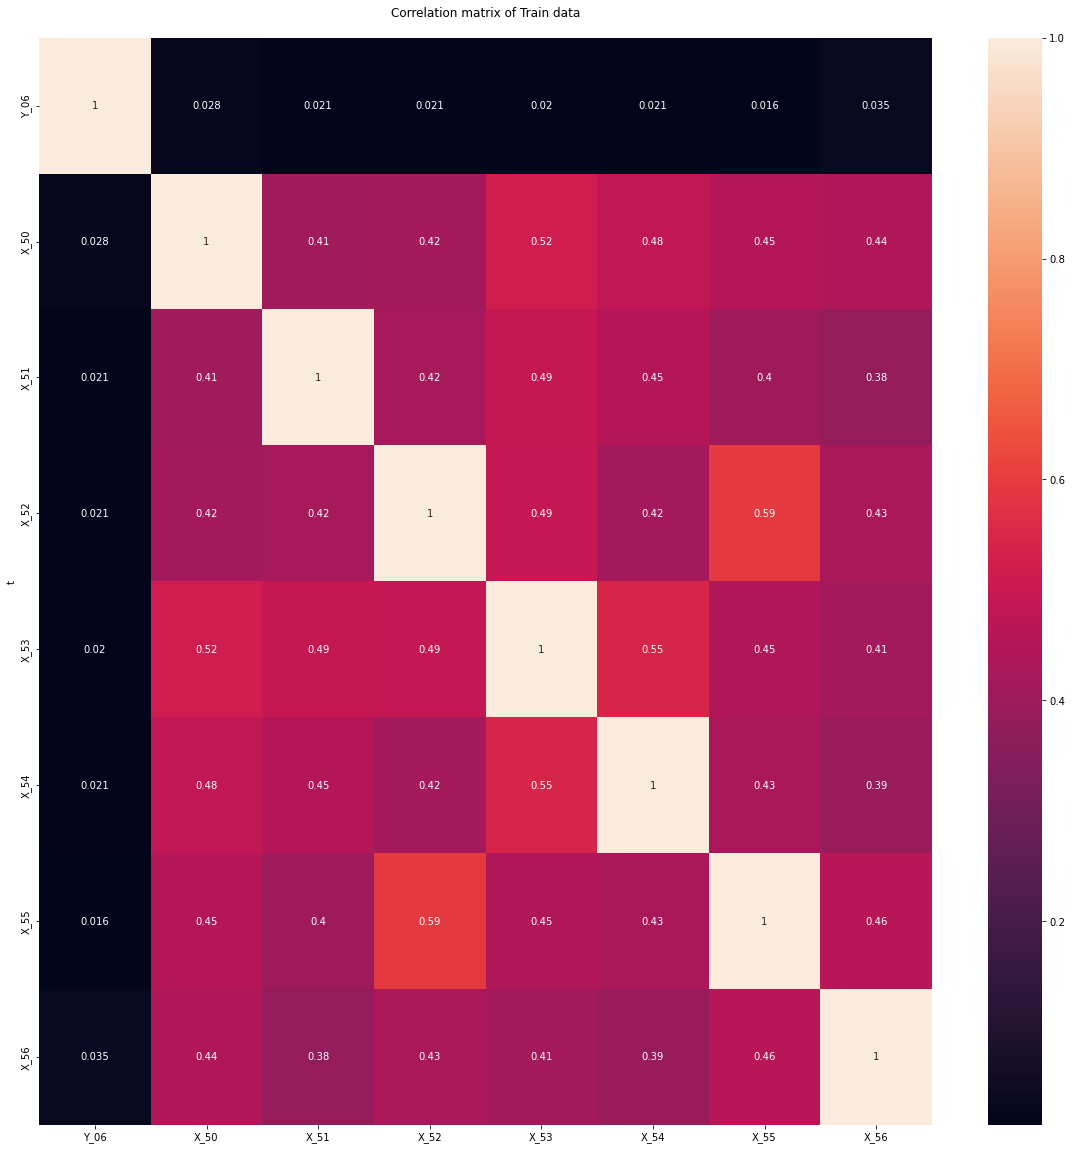

In [188]:
## Correlation Matrix

x_tmp = train_x[x_g16.Feature]
y_tmp = tmp
xy_tmp = pd.concat([y_tmp.iloc[:, 0], x_tmp], axis=1)
corr = xy_tmp.corr()

fig, ax = plt.subplots(figsize=(20,20)) 
hm = sns.heatmap(corr, annot = True, ax=ax)
hm.set(xlabel='', ylabel='t', title = "Correlation matrix of Train data\n")
plt.show()

In [196]:

import  statsmodels.api as sm
x_tmp = train_x[x_g16.Feature]
y_tmp = tmp
xy_tmp = pd.concat([y_tmp.iloc[:, 0], x_tmp], axis=1)

model = sm.OLS(xy_tmp.iloc[:, 0], xy_tmp.iloc[:, 1])
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Y_06   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                          2.650e+06
Date:                Tue, 09 Aug 2022   Prob (F-statistic):                        0.00
Time:                        14:33:12   Log-Likelihood:                         -84025.
No. Observations:               39607   AIC:                                  1.681e+05
Df Residuals:                   39606   BIC:                                  1.681e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X_50           0.1261   7.75e-05   1627.936      0.000       0.126       0.126
==============================================================================
Omnibus:                    68101.401   Durbin-Watson:                   1.255
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         69382415.545
Skew:                         -12.092   Prob(JB):                         0.00
Kurtosis:                     206.612   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [203]:
xy_tmp.iloc[:, 1:3]

,X_50,X_51
0,137.043591,135.359219
1,133.736691,135.979817
2,132.805112,131.055355
3,134.138760,133.239422
4,142.728970,136.620022
...,...,...
39602,129.965741,130.807148
39603,127.633885,120.158764
39604,132.501286,136.893025
39605,128.189679,121.495930


In [206]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

X = xy_tmp.iloc[:, 1:5]
y = xy_tmp.iloc[:, 0]

fld = KFold(n_splits=5, shuffle=True, random_state=42)
for fold, (tr, te) in enumerate(fld.split(X, y)):
    print(f'Fold-{fold} Result')
    train_X, valid_X = X.loc[tr], X.loc[te]
    train_y, valid_y = y[tr], y[te]
    
    model = sm.OLS(train_y, train_X)
    result = model.fit()
    print(result.summary())

    preds = result.predict(valid_X)
    mse = mean_squared_error(valid_y, preds)
    print(f'Valid MSE : {mse:.3f}')
    # break

Fold-0 Result
                                 OLS Regression Results                                
Dep. Variable:                   Y_06   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          5.429e+05
Date:                Tue, 09 Aug 2022   Prob (F-statistic):                        0.00
Time:                        14:42:23   Log-Likelihood:                         -66841.
No. Observations:               31685   AIC:                                  1.337e+05
Df Residuals:                   31681   BIC:                                  1.337e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [214]:
train_x

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56
0,70.544,103.320,67.47,1,101.892,74.983,29.45,62.38,245.71,0.0,...,1,1,9706.03,137.043591,135.359219,147.837968,134.313475,125.605427,136.721425,125.028256
1,69.524,103.321,65.17,1,101.944,72.943,28.73,61.23,233.61,0.0,...,1,1,10423.43,133.736691,135.979817,149.924692,123.630583,127.893337,143.322659,124.877308
2,72.583,103.320,64.07,1,103.153,72.943,28.81,105.77,272.20,0.0,...,1,1,10948.53,132.805112,131.055355,146.814592,128.939070,127.012195,140.395688,122.238232
3,71.563,103.320,67.57,1,101.971,77.022,28.92,115.21,255.36,0.0,...,1,1,15007.03,134.138760,133.239422,139.720132,132.260824,130.723186,147.624829,134.875225
4,69.524,103.320,63.57,1,101.981,70.904,29.68,103.38,241.46,0.0,...,1,1,11051.03,142.728970,136.620022,134.853555,134.760252,125.647793,139.331105,123.272762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39602,66.465,103.320,62.27,1,103.150,66.825,30.20,77.83,298.05,0.0,...,1,1,60630.73,129.965741,130.807148,133.481737,125.273130,121.780933,133.780110,129.029812
39603,66.465,103.321,62.77,1,102.021,66.825,29.21,102.25,270.67,0.0,...,1,1,60763.43,127.633885,120.158764,142.667802,122.465490,122.987209,143.090741,122.811413
39604,68.504,103.320,64.67,1,103.144,68.864,29.96,102.61,198.07,0.0,...,1,1,8813.33,132.501286,136.893025,134.419328,129.115431,130.920147,140.489232,119.166699
39605,66.465,103.320,63.67,1,102.025,67.845,30.30,112.60,275.52,0.0,...,1,1,62222.33,128.189679,121.495930,141.288011,130.141676,125.518825,136.603634,124.525929


In [215]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

X = train_x
y = xy_tmp.iloc[:, 0]

fld = KFold(n_splits=5, shuffle=True, random_state=42)
for fold, (tr, te) in enumerate(fld.split(X, y)):
    print(f'Fold-{fold} Result')
    train_X, valid_X = X.loc[tr], X.loc[te]
    train_y, valid_y = y[tr], y[te]
    
    model = sm.OLS(train_y, train_X)
    result = model.fit()
    print(result.summary())

    preds = result.predict(valid_X)
    mse = mean_squared_error(valid_y, preds)
    print(f'Valid MSE : {mse:.3f}')
    # break

Fold-0 Result
                            OLS Regression Results                            
Dep. Variable:                   Y_06   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     8.871
Date:                Tue, 09 Aug 2022   Prob (F-statistic):           2.18e-66
Time:                        15:00:53   Log-Likelihood:                -65494.
No. Observations:               31685   AIC:                         1.311e+05
Df Residuals:                   31632   BIC:                         1.315e+05
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X_01           0.0009      0.007      

In [220]:
def lg_nrmse(gt, preds):
    # 각 Y Feature별 NRMSE 총합
    # Y_01 ~ Y_08 까지 20% 가중치 부여
    all_nrmse = []
    for idx in range(1,15): # ignore 'ID'
        rmse = mean_squared_error(gt[:,idx], preds[:,idx], squared=False)
        nrmse = rmse/np.mean(np.abs(gt[:,idx]))
        all_nrmse.append(nrmse)
    score = 1.2 * np.sum(all_nrmse[:8]) + 1.0 * np.sum(all_nrmse[8:14])
    return score

In [227]:
from lightgbm import LGBMRegressor
from lightgbm import plot_importance

X = train_x
y = xy_tmp.iloc[:, 0]

mse_list = []

fld = KFold(n_splits=5, shuffle=True, random_state=42)
for fold, (tr, te) in enumerate(fld.split(X, y)):
    
    train_X, valid_X = X.loc[tr], X.loc[te]
    train_y, valid_y = y[tr], y[te]
    
    lgbm_wrapper = LGBMRegressor(n_estimators=500)
    evals = [(valid_X, valid_y)]
    lgbm_wrapper.fit(train_X, train_y, 
                     early_stopping_rounds=100,
                     eval_metric='mean_squared_error',
                     eval_set=evals, 
                     verbose=False)
                    
    preds = lgbm_wrapper.predict(valid_X)
    mse = mean_squared_error(valid_y, preds)
    mse_list.append(mse)
    print(f'Fold-{fold} Result')
    print(f'Valid MSE : {mse:.3f}')
print(f'Average MSE : {np.mean(mse_list):.3f}')

c:\Users\Cau_13\Anaconda3\envs\tf-venv\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Cau_13\Anaconda3\envs\tf-venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fold-0 Result
Valid MSE : 2.609


c:\Users\Cau_13\Anaconda3\envs\tf-venv\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Cau_13\Anaconda3\envs\tf-venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fold-1 Result
Valid MSE : 2.999


c:\Users\Cau_13\Anaconda3\envs\tf-venv\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Cau_13\Anaconda3\envs\tf-venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fold-2 Result
Valid MSE : 3.146


c:\Users\Cau_13\Anaconda3\envs\tf-venv\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Cau_13\Anaconda3\envs\tf-venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fold-3 Result
Valid MSE : 2.963


c:\Users\Cau_13\Anaconda3\envs\tf-venv\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Cau_13\Anaconda3\envs\tf-venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fold-4 Result
Valid MSE : 3.266
Average MSE : 2.996


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

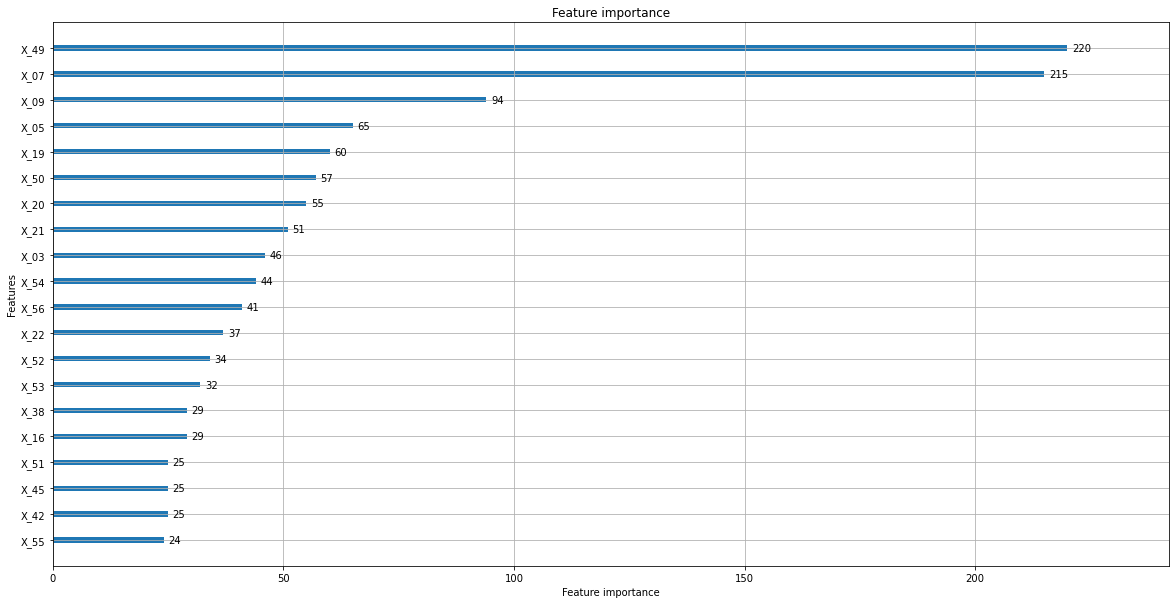

In [229]:
fig, ax = plt.subplots(figsize=(20, 10))
plot_importance(lgbm_wrapper, max_num_features=20, ax=ax)

# Visualization